<html lang="en">

<body>


    
<h1 style="color:#7366FF; font-family: Arial Black; ">Predicting the severity of Droughts Using Weather & Soil Data </h1>
    </br>

<p style="font-weight:bold;"> Droughts, Soil and Weather </p>
<p>The US drought monitor is a measure of drought across the US manually created by experts using a wide range of data.</p> <br><br>
    <div><strong>Content</strong>
<p>This is a classification dataset over six levels of drought, which is no drought (None in the dataset), and five drought levels shown below.
Each entry is a drought level at a specific point in time in a specific US county, accompanied by the last 90 days of 18 meteorological indicators shown in the bottom of this description </p></div> <br>

<div> <strong> Context </strong>
<p>The US drought monitor is a measure of drought across the US manually created by experts using a wide range of data.
This datasets' aim is to help investigate if droughts could be predicted using meteorological and soil data</p><div>
        
<br/>
    <p style="font-weight:bold">Workflow Stages</p>
    <p >This would be the process flow of how we are going to approach the data in the first phase of the assignment </p>
    <li> 1. Importing the Data </li>
    <li> 2. Cleansing & Preparing The Data </li> 
    <li> 3. Basic Data Analysis</li> 
    <li> 4. Comprehensive Data Analysis</li>
    <li> 5. Analyse, Identify Patterns & EDA</li>
    <br>
    
    

    
</body>
    
   
</html>

<br>
<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Understanding The Data</h3>
<br>

<strong> Importing The Libaries & Data <strong>

In [1]:
#EDA
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import norm
import plotly.express as px
from tabulate import tabulate
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('./train_timeseries-5.csv', delimiter=",", low_memory=True) # Importing the Data

In [3]:
df


fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
0        30093  2005-03-15     1.16  79.49  2.85 -3.41   -6.80   -6.77   
1        30093  2005-03-16     0.41  79.10  2.80 -1.82   -7.02   -6.96   
2        30093  2005-03-17     3.00  78.87  2.47 -4.58   -8.54   -8.48   
3        30093  2005-03-18     0.80  78.95  2.46 -4.79   -8.69   -8.63   
4        30093  2005-03-19     1.52  78.80  3.49 -1.14   -4.46   -4.44   
...        ...         ...      ...    ...   ...   ...     ...     ...   
2499995  39007  2014-12-28     3.73  98.63  3.81  1.77   -0.32   -0.31   
2499996  39007  2014-12-29     0.00  99.30  2.58 -1.59   -5.17   -5.12   
2499997  39007  2014-12-30     0.13  99.85  2.05 -3.39   -7.88   -7.76   
2499998  39007  2014-12-31     0.19  99.44  1.65 -5.98  -10.53  -10.31   
2499999  39007  2015-01-01     0.07  98.51  2.00 -3.68   -8.53   -8.39   

         T2M_MAX  T2M_MIN  ...    TS  WS10M  WS10M_MAX  WS10M_MIN  \
0           1.07    -7.37  ... -3.57   2.76       3.79       1.90   
1           2.90    -7.66  ... -2.04   3.86       5.42       2.81   
2          -1.27    -9.65  ... -5.27   4.26       6.47       1.37   
3           1.13   -11.03  ... -5.88   2.06       4.26       0.32   
4           4.92    -7.48  ... -1.37   2.28       3.74       1.04   
...          ...      ...  ...   ...    ...        ...        ...   
2499995     6.13    -2.11  ...  2.01   3.41       4.87       2.54   
2499996     0.62    -3.42  ... -0.56   3.10       3.70       2.17   
2499997    -2.01    -4.46  ... -1.43   4.18       5.68       2.62   
2499998    -4.84    -6.96  ... -3.58   6.55       8.02       5.12   
2499999    -0.59    -6.80  ... -2.25   7.85       8.96       7.10   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
0               1.88   4.64       5.95       3.53         2.42    4.0  
1               2.62   6.97       8.78       4.99         3.78    NaN  
2               5.10   6.70       9.78       2.40         7.38    NaN  
3               3.94   3.16       6.37       0.33         6.04    NaN  
4               2.70   3.99       5.77       1.76         4.00    NaN  
...              ...    ...        ...        ...          ...    ...  
2499995         2.33   5.04       7.13       3.85         3.28    NaN  
2499996         1.53   4.54       5.74       3.03         2.71    NaN  
2499997         3.06   5.67       7.63       3.73         3.91    0.0  
2499998         2.90   8.94      11.17       6.89         4.27    NaN  
2499999         1.85  10.91      12.29       9.75         2.54    NaN  

[2500000 rows x 21 columns]

<br>


<h3 style="color:#7366FF; font-family: Arial Black;">The Essence Of Our Data</h3>
    <p> So what can we expect out of our data ? In order to understand our data, we can look into each feature and characteristic of each variable to try and understand their significance and meaning to the problem.</p>
    <p> To incorporate discipline in our research and analysis, we can create and Excel sheet with the following structure:
    <li>1. <strong>Variable</strong> - Variable Description</li> 
    <li>2. <strong>Type</strong> - What kind of variable is it? Quantitative or Qualitative ?</li> 
    <br>
   <p> 📄 Attach below is the table that shows the above </p>
    <br>

In [3]:
# Personal note to update the table: add score and all attributes that are missing from the table
Quantitative ="Quantitative" 

#create data
data = [["WS10M_MIN", 'Minimum Wind Speed at 10 Meters (m/s)',Quantitative],["QV2M", ' Specific Humidity at 2 Meters (g/kg)',Quantitative],["T2M_RANGE", 'Temperature Range at 2 Meters (C)',Quantitative],["WS10M", 'Wind Speed at 10 Meters (m/s)',Quantitative],["T2M", ' Temperature at 2 Meters (C)',Quantitative],['WS50M_MIN','Minimum Wind Speed at 50 Meters (m/s)',Quantitative],['T2M_MAX','Maximum Temperature at 2 Meters (C)',Quantitative],['WS50M',' Wind Speed at 50 Meters (m/s)',Quantitative],['TS',' Earth Skin Temperature (C)',Quantitative],['WS50M_RANGE','Wind Speed Range at 50 Meters (m/s)',Quantitative],['WS50M_MAX','Maximum Wind Speed at 50 Meters (m/s)',Quantitative],['WS10M_MAX','Maximum Wind Speed at 10 Meters (m/s)',Quantitative],['WS10M_RANGE','Wind Speed Range at 10 Meters (m/s)',Quantitative],['PS','Surface Pressure (kPa)',Quantitative],['T2MDEW','Dew/Frost Point at 2 Meters (C)',Quantitative],['T2M_MIN',' Minimum Temperature at 2 Meters (C)',Quantitative],['T2MWET','Wet Bulb Temperature at 2 Meters (C)',Quantitative],['PRECTOT','Precipitation (mm day-1)',Quantitative]]

#define header names
col_names = ["Indicator", "Description",'Type']
  
#display table
print(tabulate(data, headers=col_names,tablefmt="fancy_grid"))

╒═════════════╤═══════════════════════════════════════╤══════════════╕
│ Indicator   │ Description                           │ Type         │
╞═════════════╪═══════════════════════════════════════╪══════════════╡
│ WS10M_MIN   │ Minimum Wind Speed at 10 Meters (m/s) │ Quantitative │
├─────────────┼───────────────────────────────────────┼──────────────┤
│ QV2M        │ Specific Humidity at 2 Meters (g/kg)  │ Quantitative │
├─────────────┼───────────────────────────────────────┼──────────────┤
│ T2M_RANGE   │ Temperature Range at 2 Meters (C)     │ Quantitative │
├─────────────┼───────────────────────────────────────┼──────────────┤
│ WS10M       │ Wind Speed at 10 Meters (m/s)         │ Quantitative │
├─────────────┼───────────────────────────────────────┼──────────────┤
│ T2M         │ Temperature at 2 Meters (C)           │ Quantitative │
├─────────────┼───────────────────────────────────────┼──────────────┤
│ WS50M_MIN   │ Minimum Wind Speed at 50 Meters (m/s) │ Quantitative │
├─────

<br>

<h3 style="color:#7366FF; font-family: Arial Black;">Preliminary Data Exploration</h3>

<p> To get a general feel of our data we will perform the following below </p><br>

In [4]:
df.shape # Finding the number of rows in the data 

(2500000, 21)

In [5]:
df.isnull().sum() # Finding out the Null Values

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          2142914
dtype: int64

In [6]:
df.duplicated().sum() # Finding out if there are any duplicated rows 

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 400.5+ MB


In [8]:
df.describe() 

fips       PRECTOT            PS          QV2M           T2M  \
count  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06   
mean   3.488245e+04  2.279975e+00  9.486947e+01  6.735571e+00  1.092143e+01   
std    2.694521e+03  5.569961e+00  5.932585e+00  4.279642e+00  1.102085e+01   
min    3.009300e+04  0.000000e+00  7.275000e+01  1.200000e-01 -3.734000e+01   
25%    3.118100e+04  0.000000e+00  9.289000e+01  3.190000e+00  2.350000e+00   
50%    3.603500e+04  1.500000e-01  9.623000e+01  5.570000e+00  1.179000e+01   
75%    3.711300e+04  1.770000e+00  9.925000e+01  9.780000e+00  2.025000e+01   
max    3.900700e+04  2.345900e+02  1.040400e+02  2.235000e+01  3.639000e+01   

             T2MDEW        T2MWET       T2M_MAX       T2M_MIN     T2M_RANGE  \
count  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06   
mean   4.383695e+00  4.438461e+00  1.686720e+01  5.471605e+00  1.139559e+01   
std    1.016173e+01  1.008561e+01  1.173661e+01  1.050906e+01  4.120601e+00   
min   -3.770000e+01 -3.746000e+01 -3.220000e+01 -4.596000e+01  6.000000e-02   
25%   -3.530000e+00 -3.460000e+00  8.050000e+00 -2.330000e+00  8.400000e+00   
50%    4.370000e+00  4.380000e+00  1.829000e+01  5.800000e+00  1.133000e+01   
75%    1.284000e+01  1.284000e+01  2.639000e+01  1.421000e+01  1.430000e+01   
max    2.668000e+01  2.668000e+01  4.554000e+01  2.909000e+01  2.994000e+01   

                 TS         WS10M     WS10M_MAX     WS10M_MIN   WS10M_RANGE  \
count  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06   
mean   1.109563e+01  3.876220e+00  5.721632e+00  2.010839e+00  3.710791e+00   
std    1.126355e+01  1.948205e+00  2.782360e+00  1.407160e+00  2.154375e+00   
min   -3.685000e+01  3.800000e-01  7.100000e-01  0.000000e+00  1.900000e-01   
25%    2.180000e+00  2.380000e+00  3.530000e+00  9.900000e-01  2.060000e+00   
50%    1.194000e+01  3.510000e+00  5.270000e+00  1.730000e+00  3.250000e+00   
75%    2.056000e+01  4.990000e+00  7.390000e+00  2.710000e+00  4.880000e+00   
max    3.861000e+01  2.146000e+01  2.861000e+01  1.482000e+01  1.907000e+01   

              WS50M     WS50M_MAX     WS50M_MIN   WS50M_RANGE          score  
count  2.500000e+06  2.500000e+06  2.500000e+06  2.500000e+06  357086.000000  
mean   5.866673e+00  8.338291e+00  3.223695e+00  5.114595e+00       0.904280  
std    2.420696e+00  3.036490e+00  2.189005e+00  2.407582e+00       1.258847  
min    4.900000e-01  7.700000e-01  0.000000e+00  4.100000e-01       0.000000  
25%    4.060000e+00  6.050000e+00  1.480000e+00  3.340000e+00       0.000000  
50%    5.480000e+00  7.920000e+00  2.860000e+00  4.670000e+00       0.005800  
75%    7.300000e+00  1.012000e+01  4.550000e+00  6.430000e+00       1.515600  
max    2.615000e+01  3.440000e+01  1.924000e+01  2.477000e+01       5.000000

In [9]:
df.tail(21)

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
2499979  39007  2014-12-12     0.21  98.89  3.49  0.26   -1.33   -1.32   
2499980  39007  2014-12-13     0.07  98.78  3.87  1.05   -0.02   -0.02   
2499981  39007  2014-12-14     0.25  98.56  4.91  4.37    3.34    3.34   
2499982  39007  2014-12-15     0.33  98.51  5.30  5.65    4.39    4.39   
2499983  39007  2014-12-16     6.40  97.73  5.44  5.47    4.63    4.63   
2499984  39007  2014-12-17     2.48  98.51  3.50  1.22   -1.55   -1.52   
2499985  39007  2014-12-18     0.63  98.91  3.04 -0.72   -3.13   -3.11   
2499986  39007  2014-12-19     0.30  99.14  2.80 -1.03   -4.17   -4.13   
2499987  39007  2014-12-20     0.03  99.31  2.73 -0.88   -4.45   -4.40   
2499988  39007  2014-12-21     0.04  99.36  2.79 -0.57   -4.21   -4.16   
2499989  39007  2014-12-22     0.07  98.65  3.48  0.45   -1.57   -1.55   
2499990  39007  2014-12-23     1.46  97.95  4.99  4.14    3.34    3.34   
2499991  39007  2014-12-24     3.21  96.89  6.26  7.26    6.42    6.42   
2499992  39007  2014-12-25     1.75  98.12  3.93  2.81    0.16    0.17   
2499993  39007  2014-12-26     0.00  99.00  4.11  2.86    0.83    0.84   
2499994  39007  2014-12-27     2.47  98.72  5.13  6.13    3.90    3.91   
2499995  39007  2014-12-28     3.73  98.63  3.81  1.77   -0.32   -0.31   
2499996  39007  2014-12-29     0.00  99.30  2.58 -1.59   -5.17   -5.12   
2499997  39007  2014-12-30     0.13  99.85  2.05 -3.39   -7.88   -7.76   
2499998  39007  2014-12-31     0.19  99.44  1.65 -5.98  -10.53  -10.31   
2499999  39007  2015-01-01     0.07  98.51  2.00 -3.68   -8.53   -8.39   

         T2M_MAX  T2M_MIN  ...    TS  WS10M  WS10M_MAX  WS10M_MIN  \
2499979     1.61    -0.66  ...  1.30   3.98       5.26       2.44   
2499980     3.27    -0.56  ...  1.81   3.79       4.66       2.65   
2499981     5.31     3.65  ...  4.47   3.58       5.20       1.53   
2499982     9.78     3.79  ...  5.21   2.00       3.73       0.59   
2499983     8.22     3.67  ...  5.27   4.14       5.44       3.16   
2499984     5.13    -1.55  ...  2.01   6.51       7.49       5.58   
2499985     0.64    -1.59  ...  0.55   4.07       5.52       2.90   
2499986     0.74    -2.02  ...  0.27   3.01       3.72       2.01   
2499987     1.03    -1.96  ...  0.44   1.51       1.86       0.76   
2499988     1.61    -2.03  ...  0.43   1.66       3.10       0.74   
2499989     4.37    -2.81  ...  1.11   3.33       4.42       2.11   
2499990     7.98     1.25  ...  3.88   3.85       4.80       2.54   
2499991    10.06     4.07  ...  6.40   4.99       9.85       3.68   
2499992     4.27     0.13  ...  2.84   6.46       8.82       4.03   
2499993     7.57    -0.99  ...  2.84   3.82       4.51       3.26   
2499994    10.60     2.10  ...  5.48   4.18       5.68       2.96   
2499995     6.13    -2.11  ...  2.01   3.41       4.87       2.54   
2499996     0.62    -3.42  ... -0.56   3.10       3.70       2.17   
2499997    -2.01    -4.46  ... -1.43   4.18       5.68       2.62   
2499998    -4.84    -6.96  ... -3.58   6.55       8.02       5.12   
2499999    -0.59    -6.80  ... -2.25   7.85       8.96       7.10   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
2499979         2.82   5.46       7.37       3.52         3.84    NaN  
2499980         2.01   5.30       6.56       3.79         2.78    NaN  
2499981         3.66   5.66       7.54       3.20         4.33    NaN  
2499982         3.14   3.36       6.58       0.86         5.71    NaN  
2499983         2.28   6.39       8.22       4.36         3.86    0.0  
2499984         1.91   8.99      10.25       7.63         2.63    NaN  
2499985         2.62   5.55       7.54       4.02         3.52    NaN  
2499986         1.70   4.38       5.12       3.21         1.91    NaN  
2499987         1.11   2.23       3.08       0.84         2.24    NaN  
2499988         2.36   2.53       4.94       0.91         4.04    NaN  
2499989         2.31   5.02       6.53       3.62         2.91    NaN 

In [10]:
df.head(21) # printing out the first 5 values

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  T2M_MAX  \
0   30093  2005-03-15     1.16  79.49  2.85 -3.41   -6.80   -6.77     1.07   
1   30093  2005-03-16     0.41  79.10  2.80 -1.82   -7.02   -6.96     2.90   
2   30093  2005-03-17     3.00  78.87  2.47 -4.58   -8.54   -8.48    -1.27   
3   30093  2005-03-18     0.80  78.95  2.46 -4.79   -8.69   -8.63     1.13   
4   30093  2005-03-19     1.52  78.80  3.49 -1.14   -4.46   -4.44     4.92   
5   30093  2005-03-20     3.13  78.92  3.93 -0.68   -2.76   -2.75     3.44   
6   30093  2005-03-21     0.48  79.54  3.12 -1.39   -5.65   -5.62     3.70   
7   30093  2005-03-22     2.49  79.09  3.43 -2.03   -4.50   -4.48     2.07   
8   30093  2005-03-23     4.58  78.87  2.10 -8.07  -10.52  -10.45    -4.60   
9   30093  2005-03-24     1.79  79.51  1.93 -8.38  -11.21  -11.14    -3.28   
10  30093  2005-03-25     0.96  79.75  2.35 -6.50   -9.08   -9.05    -0.41   
11  30093  2005-03-26     0.42  79.85  2.56 -4.11   -8.29   -8.25     3.61   
12  30093  2005-03-27     0.84  79.09  4.07  1.51   -2.36   -2.34     7.67   
13  30093  2005-03-28     4.04  78.38  3.73  0.15   -3.67   -3.65     4.72   
14  30093  2005-03-29     2.09  78.62  2.66 -2.73   -7.63   -7.57     1.59   
15  30093  2005-03-30     1.77  79.71  2.31 -4.47   -9.11   -9.03    -1.10   
16  30093  2005-03-31     0.72  80.71  2.22 -3.76   -9.51   -9.40     3.83   
17  30093  2005-04-01     0.31  80.12  2.92  1.23   -6.47   -6.40     9.43   
18  30093  2005-04-02     0.28  79.61  3.42  2.60   -4.44   -4.40     9.28   
19  30093  2005-04-03     0.48  78.90  3.91  2.35   -2.82   -2.80     7.55   
20  30093  2005-04-04     3.82  79.19  3.49 -0.38   -4.28   -4.26     4.45   

    T2M_MIN  ...    TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
0     -7.37  ... -3.57   2.76       3.79       1.90         1.88   4.64   
1     -7.66  ... -2.04   3.86       5.42       2.81         2.62   6.97   
2     -9.65  ... -5.27   4.26       6.47       1.37         5.10   6.70   
3    -11.03  ... -5.88   2.06       4.26       0.32         3.94   3.16   
4     -7.48  ... -1.37   2.28       3.74       1.04         2.70   3.99   
5     -4.05  ... -0.95   1.92       2.94       1.23         1.71   3.44   
6     -6.57  ... -2.07   1.93       3.00       0.41         2.59   3.20   
7     -5.26  ... -2.22   2.39       4.66       0.76         3.90   3.85   
8    -10.81  ... -7.66   4.65       5.55       2.47         3.08   6.32   
9    -11.61  ... -8.58   2.46       4.16       1.05         3.11   3.47   
10   -11.80  ... -7.21   1.73       2.54       1.40         1.14   2.77   
11   -14.00  ... -4.42   4.23       5.34       2.38         2.96   6.67   
12    -3.21  ...  1.45   5.33       6.94       3.37         3.57   8.70   
13    -4.74  ...  0.13   3.68       5.03       2.51         2.52   6.17   
14    -5.69  ... -2.62   3.60       5.33       2.47         2.87   5.83   
15    -8.35  ... -4.28   4.38       5.63       2.71         2.92   6.86   
16   -10.43  ... -3.67   2.74       3.78       1.97         1.81   4.52   
17    -6.20  ...  1.22   4.43       6.36       3.22         3.15   7.45   
18    -3.65  ...  1.99   2.64       4.49       1.30         3.19   4.31   
19    -2.69  ...  1.70   3.04       5.50       1.65         3.84   5.12   
20    -3.52  ... -0.41   2.68       4.28       1.68         2.60   4.22   

    WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
0        5.95       3.53         2.42    4.0  
1        8.78       4.99         3.78    NaN  
2        9.78       2.40         7.38    NaN  
3        6.37       0.33         6.04    NaN  
4        5.77       1.76         4.00    NaN  
5        4.52       2.32         2.19    NaN  
6        4.59       0.68         3.91    NaN  
7        6.80       1.31         5.49    4.0  
8        7.22       4.04         3.18    NaN  
9        6.14       0.90         5.24    NaN  
10       4.45       1.97         2.47    NaN  
11       8.54       3.93         4.62    NaN  
12      10.48       6.78  

<br>

<br>

-----------------------------------------------

<br>

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Data Cleaning</h3>
<br>
<p><strong>Questions to run through when dealing with missing data:</strong>
    <li>1. How prevalent is the missing data ? </li>
    <li>2. Is missing data random or does it have a pattern ?</li>
    <p>
    
The answer to these questions is important as it may determine the accuracy of our visualisation and prediction model later in the assignment. Without considering these questions, one might have a bias dataset which may hide an inconvenient truth or  one might mishandle the data which may cause downstream problems later on</p>
    </p><br>

<h3><strong> Finding The Missing Vales </strong> 

In [11]:
# Finding the percentage of missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6) # 6 chosen since we only have 6 columns with missing data

Total   Percent
score        2142914  0.857166
TS                 0  0.000000
WS50M_RANGE        0  0.000000
WS50M_MIN          0  0.000000
WS50M_MAX          0  0.000000
WS50M              0  0.000000

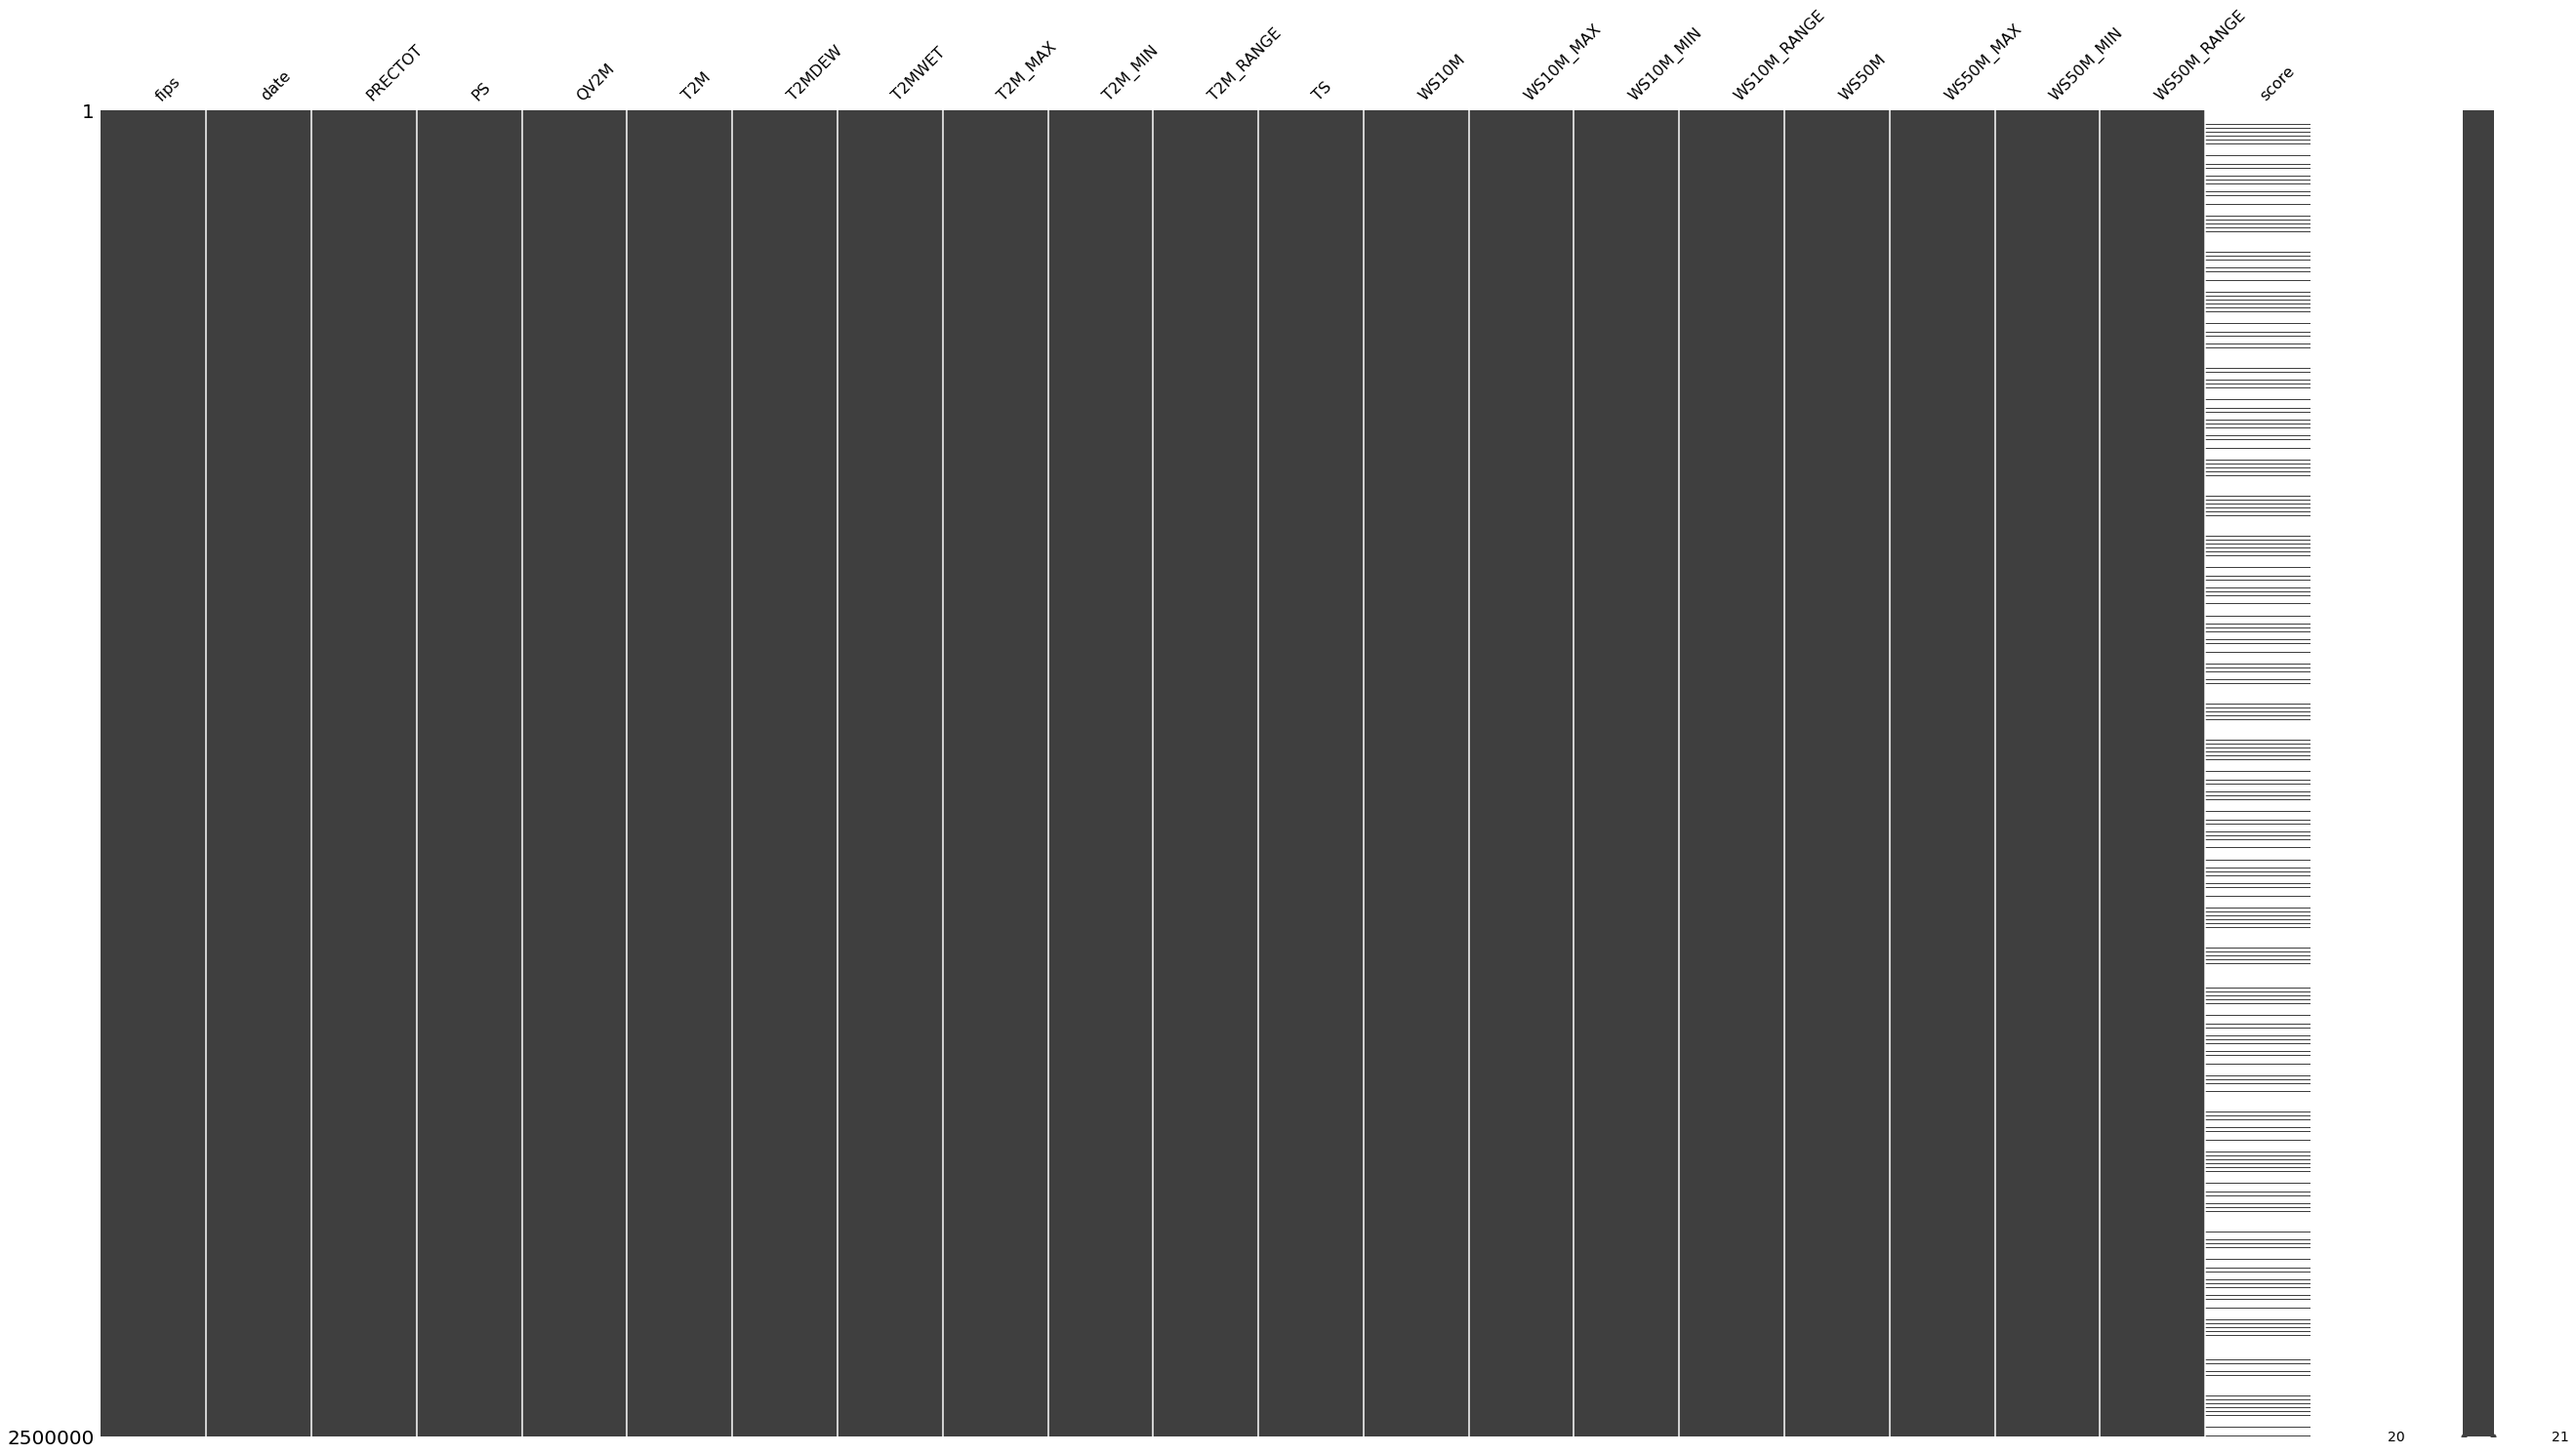

In [12]:
# Plotting a graph where it shows the missingness of the data. Allows us to spot patterns in missingness if there is one 
# If this graph is not shown when this notebook opens, my aplogies, running it might take a while 
msno.matrix(df,figsize=(45,25))     
plt.show()                        

<br><strong> Missingness Percentage of each variable </strong>
<p> The data for score seems to have over 85% of the missing data. This is a huge amount of missing data and should be investigated further the reason (if any) for the huge amount of missing data. To help with our investigation the MSNO library will be used to detect patterns on the missingness of the data.From the data we can see that the data for all other columns except score has no missing values, whilst score has a huge amount of missing data. 
Scores missing data however is interesting as we can deduce a pattern out of it. From the relatively spaced intervals we can determine that there is a pattern. </p>
<br>
    
<strong> The Pattern | MNAR </strong>
<p> The exact reason as to the missingness patten could not be developed upon just viewing the MSNO matrix. From the data we can observe that the dataset is MNAR. MNAR means that the probability of being missing varies for reasons that are unknown to us. To find the reason we have to ascertain a relationship between the missing variable and the probability of missing ( Viernes, 2021 ).  To uncover the reason we must take a step back to Preliminary Data Exploration and view the first 21 values and last 21 values, we can see that every score that is not null is about 7 space apart . From the time space we can deduce that these 7 spacing are due to the score only taken once every 7 days.  The pattern will only make sense when we look at the time space between the 7 variables. <p> <br>
    
  
<strong> Deduction & Handling technique </strong>
<p> We can now deduce that the scores missingness is only taken once every 7 days or once every week thus our data is categorised as MNAR ( Missing  Not At Random ). we will remove the data as we are only interested in the score (target variable).   </p> 



In [13]:
df=df.dropna() # dropping all NAN values

In [14]:
df.shape

(357086, 21)

<br>

<h3><strong> Identifying Outliers </strong>

In [15]:
df.describe() # Checking the minimum and maximum values for extreme outliers 

fips        PRECTOT             PS           QV2M  \
count  357086.000000  357086.000000  357086.000000  357086.000000   
mean    34882.450852       2.306944      94.862372       6.776133   
std      2694.528266       5.404287       5.928865       4.296007   
min     30093.000000       0.000000      73.150000       0.200000   
25%     31181.000000       0.000000      92.870000       3.230000   
50%     36035.000000       0.160000      96.230000       5.680000   
75%     37113.000000       1.860000      99.240000       9.790000   
max     39007.000000     110.790000     103.720000      21.900000   

                 T2M         T2MDEW         T2MWET        T2M_MAX  \
count  357086.000000  357086.000000  357086.000000  357086.000000   
mean       11.030271       4.467330       4.521657      16.995983   
std        11.061319      10.187536      10.112059      11.791765   
min       -30.920000     -32.550000     -31.510000     -27.060000   
25%         2.500000      -3.440000      -3.380000       8.180000   
50%        11.950000       4.640000       4.650000      18.480000   
75%        20.290000      12.840000      12.840000      26.500000   
max        35.900000      25.960000      25.960000      45.070000   

             T2M_MIN      T2M_RANGE             TS          WS10M  \
count  357086.000000  357086.000000  357086.000000  357086.000000   
mean        5.561252      11.434732      11.192256       3.850502   
std        10.543000       4.157544      11.301117       1.916933   
min       -38.210000       0.310000     -32.200000       0.380000   
25%        -2.190000       8.400000       2.350000       2.380000   
50%         6.010000      11.370000      12.090000       3.500000   
75%        14.250000      14.380000      20.590000       4.950000   
max        28.540000      28.450000      38.440000      17.170000   

           WS10M_MAX      WS10M_MIN    WS10M_RANGE          WS50M  \
count  357086.000000  357086.000000  357086.000000  357086.000000   
mean        5.694799       1.991710       3.703097       5.841171   
std         2.738553       1.389436       2.127372       2.380917   
min         0.850000       0.000000       0.310000       0.660000   
25%         3.540000       0.980000       2.070000       4.060000   
50%         5.270000       1.720000       3.250000       5.470000   
75%         7.360000       2.680000       4.880000       7.260000   
max        21.180000      13.650000      18.310000      21.570000   

           WS50M_MAX      WS50M_MIN    WS50M_RANGE          score  
count  357086.000000  357086.000000  357086.000000  357086.000000  
mean        8.326772       3.187328       5.139447       0.904280  
std         2.985479       2.163599       2.391338       1.258847  
min         1.350000       0.000000       0.580000       0.000000  
25%         6.070000       1.470000       3.370000       0.000000  
50%         7.940000       2.820000       4.700000       0.005800  
75%        10.100000       4.500000       6.480000       1.515600  
max        27.150000      17.290000      23.210000       5.000000

In [16]:
df.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

<Figure size 1440x2880 with 0 Axes>

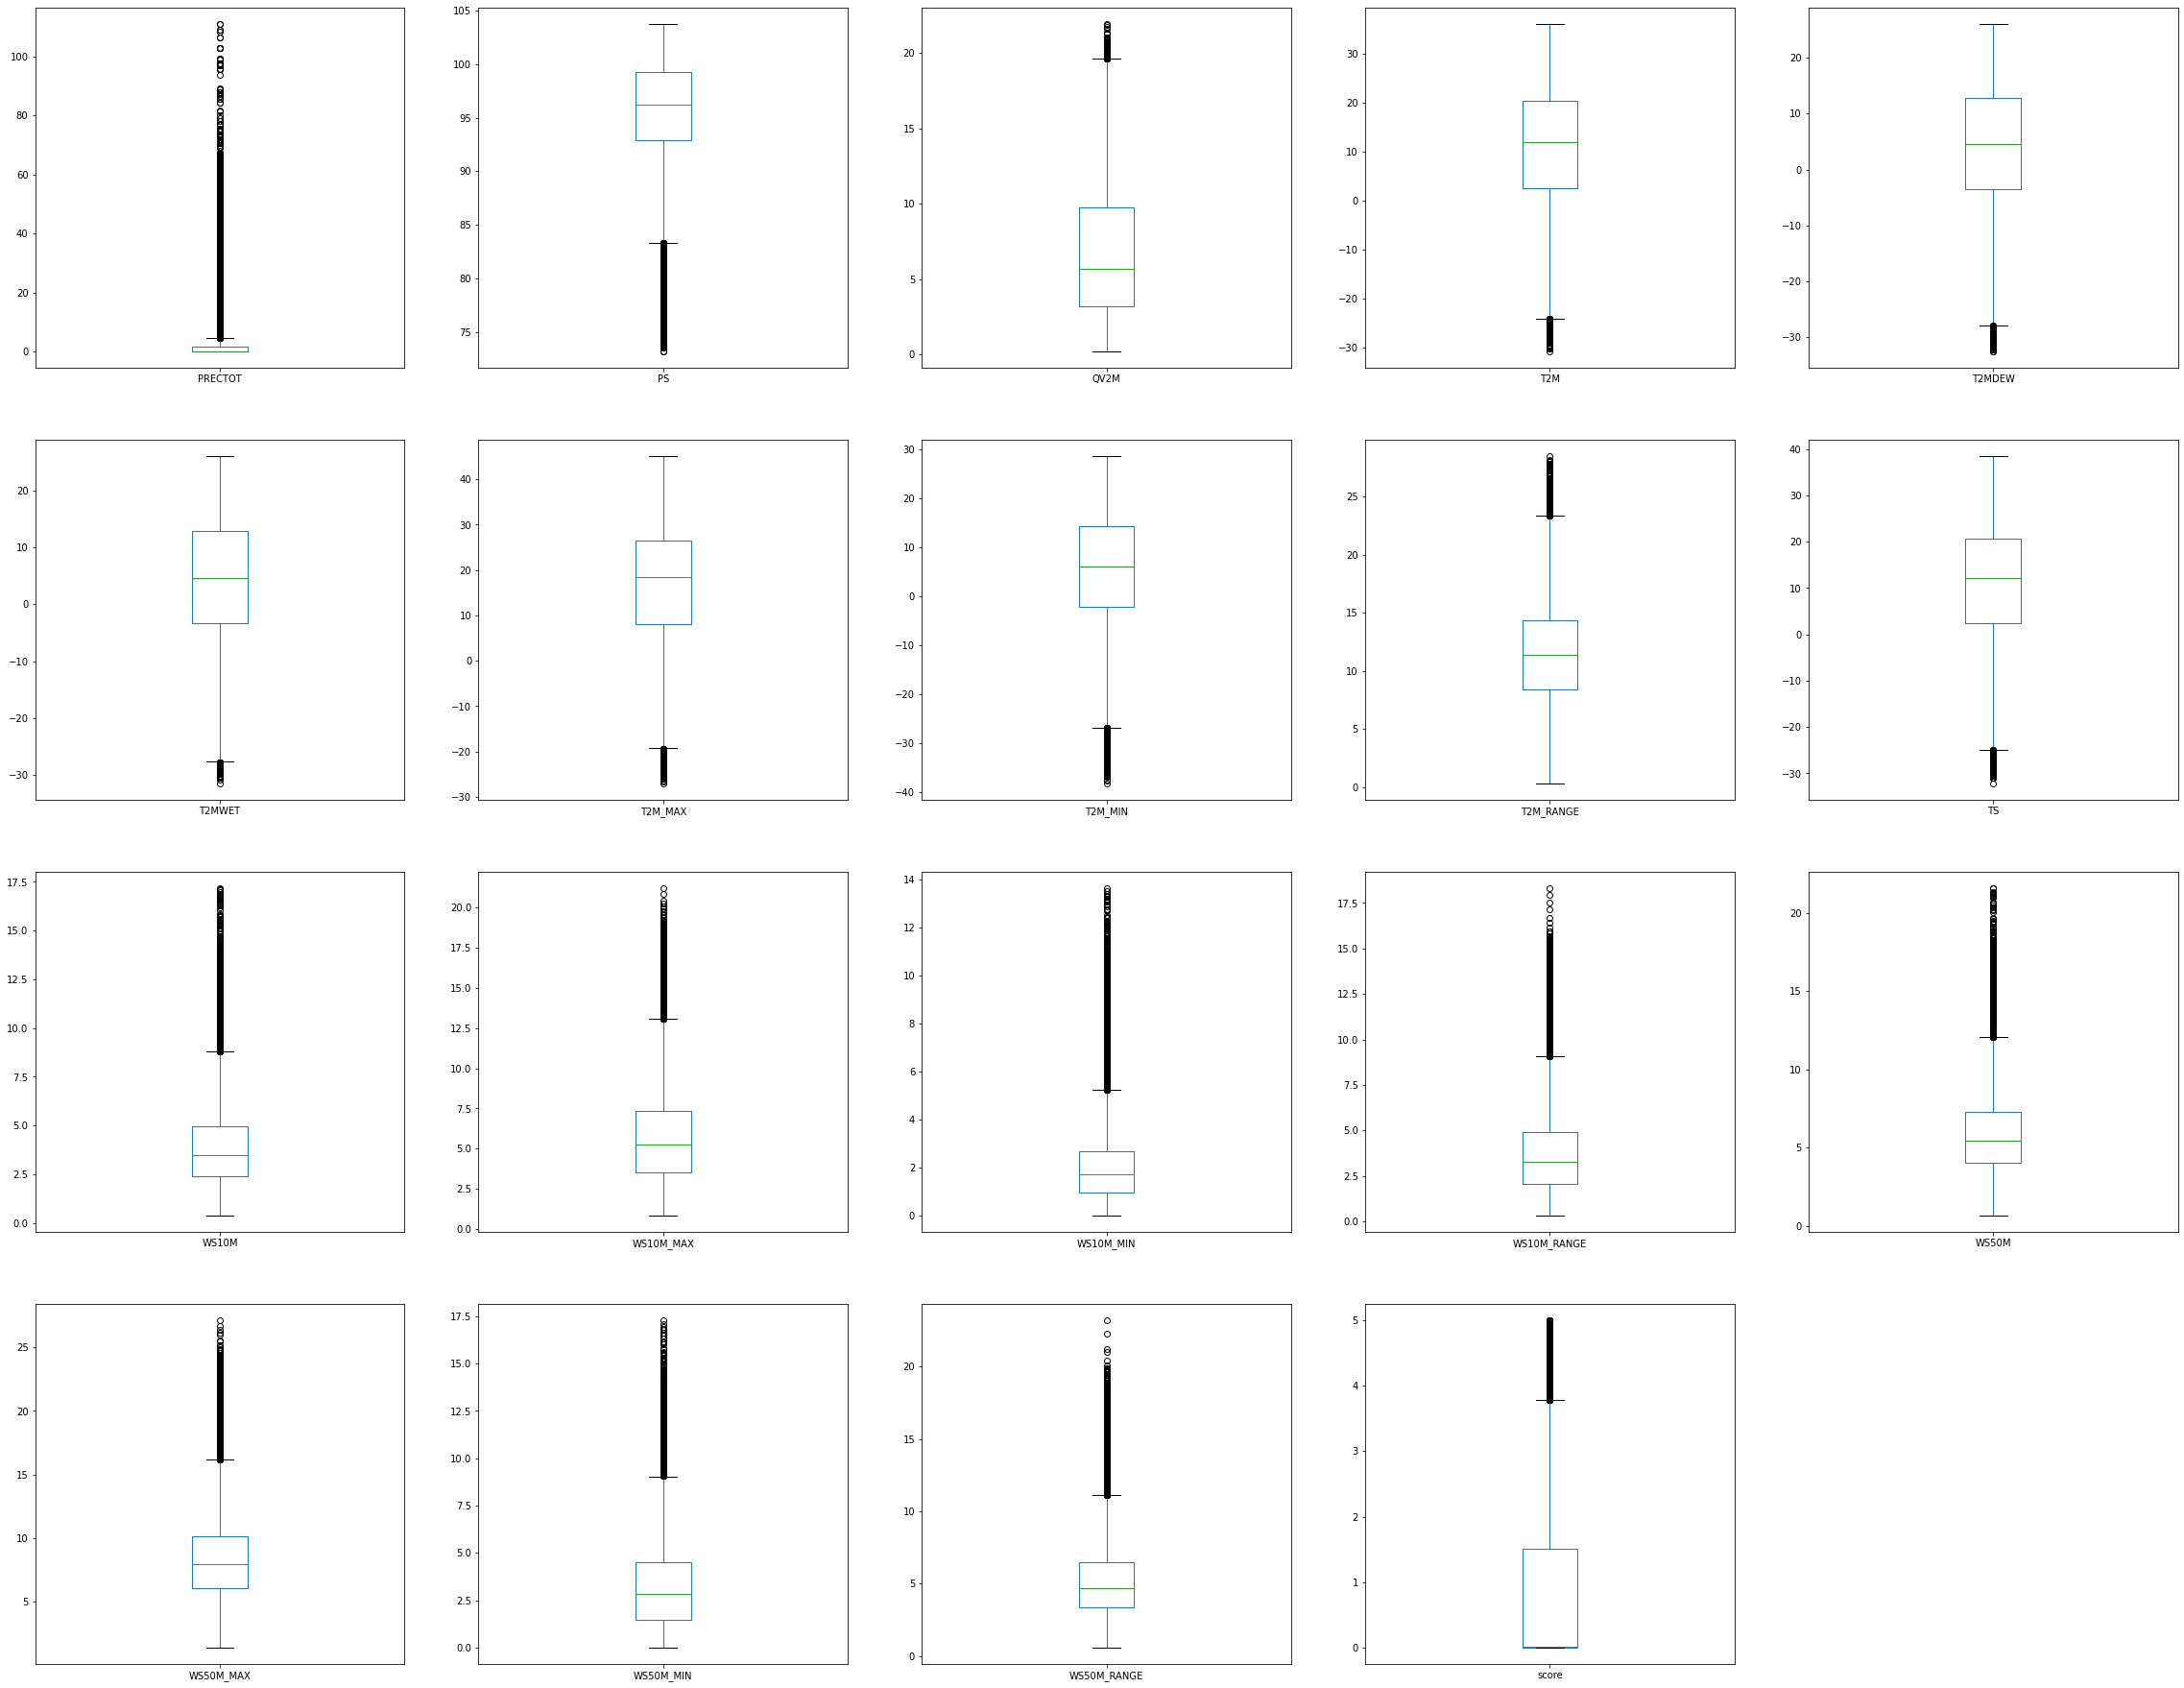

In [17]:
plt.figure(figsize=(20,40)) # date & fips left out 

Numeric_columns =['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']
df[Numeric_columns].plot(kind='box',subplots=True,sharex=False, sharey=False,layout=(5,5),figsize=(40,40))
plt.show()

<br>

<h3><strong> Handling Outliers </strong>

In [14]:
Numeric_columns =['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']

#removing the outliers
def outliers(data1,columns):
        Q1 = data1[columns].quantile(0.25)
        Q3 = data1[columns].quantile(0.75)
        IQR= Q3-Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
     
        ls = data1.index[(data1[columns]< lower_bound) | (data1[columns]>upper_bound)]
     # Using IQR to remove the outliers, data outside the upperbound would be remove 
        return ls


def remove(data1,ls):
    ls=sorted(set(ls))
    data1 = data1.drop(ls,inplace=True)
    return data1

In [15]:
index_list=[]

for columns in Numeric_columns:
    index_list.extend(outliers(df,columns))
                
remove(df,index_list)

In [16]:
df.shape

(262367, 21)

<br>

<h3><strong>Date, Time & Score Handling For Easier Exploration and Deeper Insights  </strong>

In [17]:
#The codes below will add addtion columns such as year month date and day, this will alllow us to have more insights towards our data in
#terms of time and occurence 

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [18]:
df =df.drop('date',axis=1)

In [19]:
# we round off the scores for easier representation and interpretability
Score_A_TS =df.copy() # needed for analysis later
df['score'] = df['score'].round().astype(int)

<br>

<h3><strong> Merging Both Soil & Weather Dataset </h3>

In [ ]:
 # merging both data on severity of droughts and soil data togehter

In [20]:
soil_data = pd.read_csv('./soil_data.csv', delimiter=",", low_memory=True) # Importing the Data 

In [21]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [22]:
soil_data.isnull().sum()

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64

In [23]:
soil_data.describe()

fips          lat          lon    elevation       slope1  \
count   3109.000000  3109.000000  3109.000000  3109.000000  3109.000000   
mean   30678.538437    38.280052   -91.659790   427.624638     0.054973   
std    14986.018730     4.838634    11.485291   500.158880     0.089873   
min     1001.000000    25.601043  -124.211407    -1.000000     0.000000   
25%    19045.000000    34.686818   -98.046842   132.000000     0.008300   
50%    29213.000000    38.328061   -90.181170   272.000000     0.028300   
75%    46009.000000    41.703590   -83.373303   483.000000     0.068500   
max    56045.000000    48.842653   -67.609354  3561.000000     0.974000   

           slope2       slope3       slope4       slope5       slope6  ...  \
count  3109.00000  3109.000000  3109.000000  3109.000000  3109.000000  ...   
mean      0.29775     0.319991     0.155878     0.053409     0.065323  ...   
std       0.21595     0.167727     0.128400     0.073107     0.125526  ...   
min       0.00000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.10510     0.185800     0.040800     0.000500     0.000000  ...   
50%       0.27100     0.347100     0.127500     0.012200     0.000700  ...   
75%       0.47750     0.459300     0.255200     0.090300     0.054100  ...   
max       0.75990     0.696900     0.571700     0.330000     0.606800  ...   

       CULTRF_LAND  CULTIR_LAND    CULT_LAND          SQ1          SQ2  \
count  3109.000000  3109.000000  3109.000000  3109.000000  3109.000000   
mean     28.494804     3.504682    31.999486     1.830492     1.553554   
std      31.839502    10.290893    33.099657     1.192219     1.021382   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.143526     0.045909     1.602227     1.000000     1.000000   
50%      14.043937     0.276606    18.811279     1.000000     1.000000   
75%      51.737080     1.370315    60.637421     3.000000     2.000000   
max      97.029572    99.956841    99.956841     7.000000     7.000000   

               SQ3         SQ4          SQ5          SQ6          SQ7  
count  3109.000000  3109.00000  3109.000000  3109.000000  3109.000000  
mean      1.282084     1.35735     1.146993     1.135092     1.284979  
std       1.002508     1.03011     0.922308     0.914502     1.017465  
min       0.000000     0.00000     0.000000     0.000000     0.000000  
25%       1.000000     1.00000     1.000000     1.000000     1.000000  
50%       1.000000     1.00000     1.000000     1.000000     1.000000  
75%       1.000000     1.00000     1.000000     1.000000     1.000000  
max       7.000000     7.00000     7.000000     7.000000     7.000000  

[8 rows x 32 columns]

In [24]:


soil_data = pd.read_csv('./soil_data.csv', delimiter=",", low_memory=True) # Importing the Data 

df=pd.merge(df,soil_data)

dropvalues = [['elevation', 'slope1',
       'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8',
       'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND',
       'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND',
       'CULTIR_LAND', 'CULT_LAND']]

for i in dropvalues:
    df.drop(i,axis=1,inplace=True) # only focusing on soil quality hence the removal
    

In [25]:
df

fips  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  \
0       30095     0.31  86.17  2.99 -0.34   -5.52   -5.45     6.05    -5.24   
1       30095     0.84  85.98  2.62 -3.16   -6.99   -6.93     2.08    -7.59   
2       30095     0.77  86.21  2.61 -0.94   -7.10   -7.00     4.44    -6.44   
3       30095     0.14  86.20  3.31  5.15   -3.83   -3.76    12.65     1.43   
4       30095     2.08  85.79  2.71 -1.36   -6.53   -6.46     3.02    -4.72   
...       ...      ...    ...   ...   ...     ...     ...      ...      ...   
262362  39007     0.57  98.46  3.25  1.69   -2.37   -2.33     4.02    -1.49   
262363  39007     0.42  99.52  3.08 -0.45   -3.25   -3.21     2.27    -3.91   
262364  39007     0.52  98.77  4.11  2.36    0.84    0.85     5.59    -0.64   
262365  39007     1.46  97.95  4.99  4.14    3.34    3.34     7.98     1.25   
262366  39007     0.13  99.85  2.05 -3.39   -7.88   -7.76    -2.01    -4.46   

        T2M_RANGE  ...  day        lat         lon  SQ1  SQ2  SQ3  SQ4  SQ5  \
0           11.29  ...   18  45.663496 -109.391752    1    1    1    1    1   
1            9.66  ...   25  45.663496 -109.391752    1    1    1    1    1   
2           10.88  ...    1  45.663496 -109.391752    1    1    1    1    1   
3           11.22  ...    8  45.663496 -109.391752    1    1    1    1    1   
4            7.74  ...   15  45.663496 -109.391752    1    1    1    1    1   
...           ...  ...  ...        ...         ...  ...  ...  ...  ...  ...   
262362       5.51  ...   25  41.906644  -80.745641    1    1    1    2    1   
262363       6.18  ...    2  41.906644  -80.745641    1    1    1    2    1   
262364       6.23  ...    9  41.906644  -80.745641    1    1    1    2    1   
262365       6.72  ...   23  41.906644  -80.745641    1    1    1    2    1   
262366       2.45  ...   30  41.906644  -80.745641    1    1    1    2    1   

        SQ6  SQ7  
0         1    1  
1         1    1  
2         1    1  
3         1    1  
4         1    1  
...     ...  ...  
262362    1    1  
262363    1    1  
262364    1    1  
262365    1    1  
262366    1    1  

[262367 rows x 32 columns]

In [27]:
df.isnull().sum()

fips           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
year           0
month          0
day            0
lat            0
lon            0
SQ1            0
SQ2            0
SQ3            0
SQ4            0
SQ5            0
SQ6            0
SQ7            0
dtype: int64

In [26]:
df.shape

(262367, 33)

----------------------------------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Data Analysis</h3>
<br>

<div style="height:200px; overflow:hidden; text-align:center;">
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/434px-Relationship_between_mean_and_median_under_different_skewness.png' ></div>


<h3> <strong> Skewness </strong><br>

<strong> What is skewness and Why are we tryinig to fix it ? </strong>
<p>Linear models or Regression models work on the assumption that the distribution of the independent variables and the target variables are similar (Sharma,2020). Therefore knowing that skewness exist is crucial in the developement of better linear models. 
    
Additionally, with skewness we are also face with under representation of certain aspects of the dataset. </p>
    
<br>
<strong> How are we dealing with it? </strong>
<p> We will start by identfying columns with high skewness. To do so we will leverage on what we have learnt from the EDA above and single out columns that might prove to have high skewness. </p> <br>

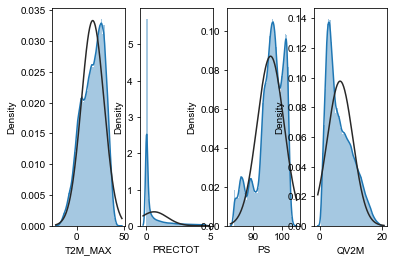

In [27]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(1,4)

sns.distplot(df['T2M_MAX'],fit=norm,ax=ax1)
sns.distplot(df['PRECTOT'],fit=norm,ax=ax2)
sns.distplot(df['PS'],fit=norm,ax=ax3)
sns.distplot(df['QV2M'],fit=norm,ax=ax4)

sns.set(rc={'figure.figsize':(40,15)})

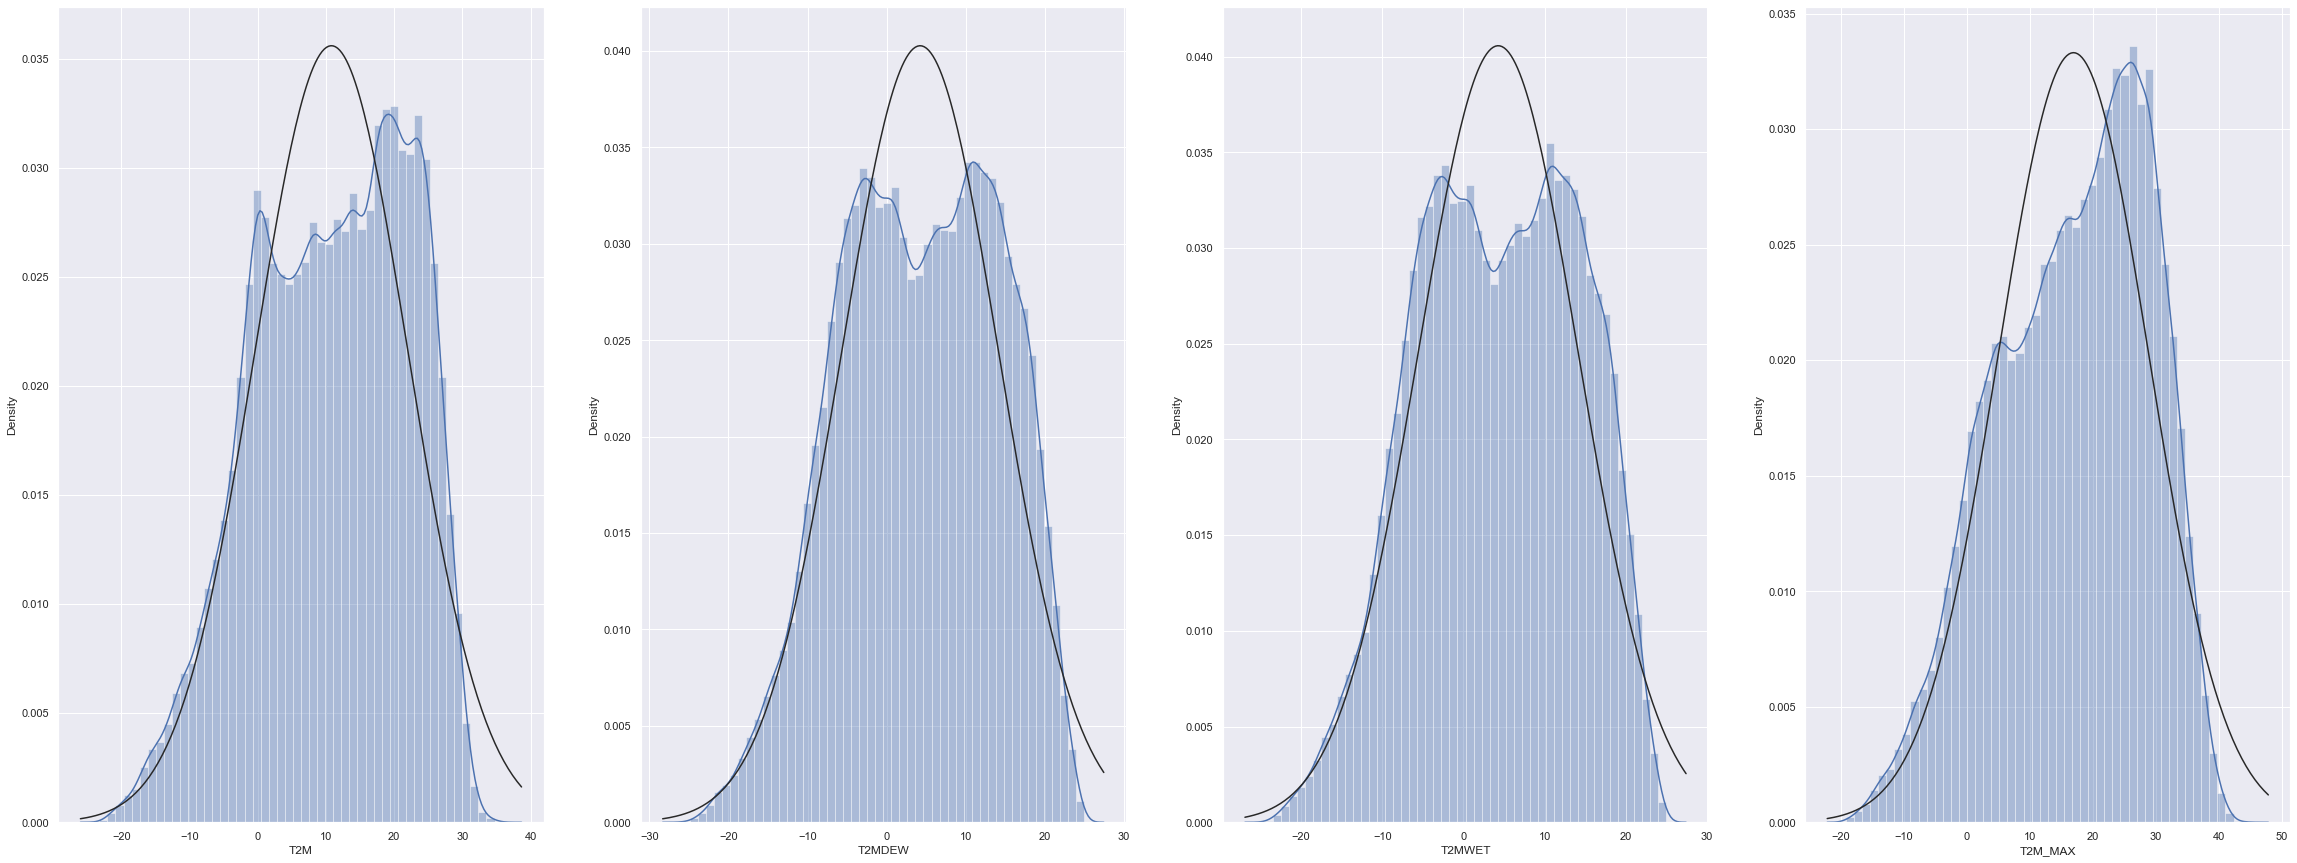

In [28]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(1,4)

sns.distplot(df['T2M'],fit=norm,ax=ax1)
sns.distplot(df['T2MDEW'],fit=norm,ax=ax2)
sns.distplot(df['T2MWET'],fit=norm,ax=ax3)
sns.distplot(df['T2M_MAX'],fit=norm,ax=ax4)

sns.set(rc={'figure.figsize':(40,15)})

<br>

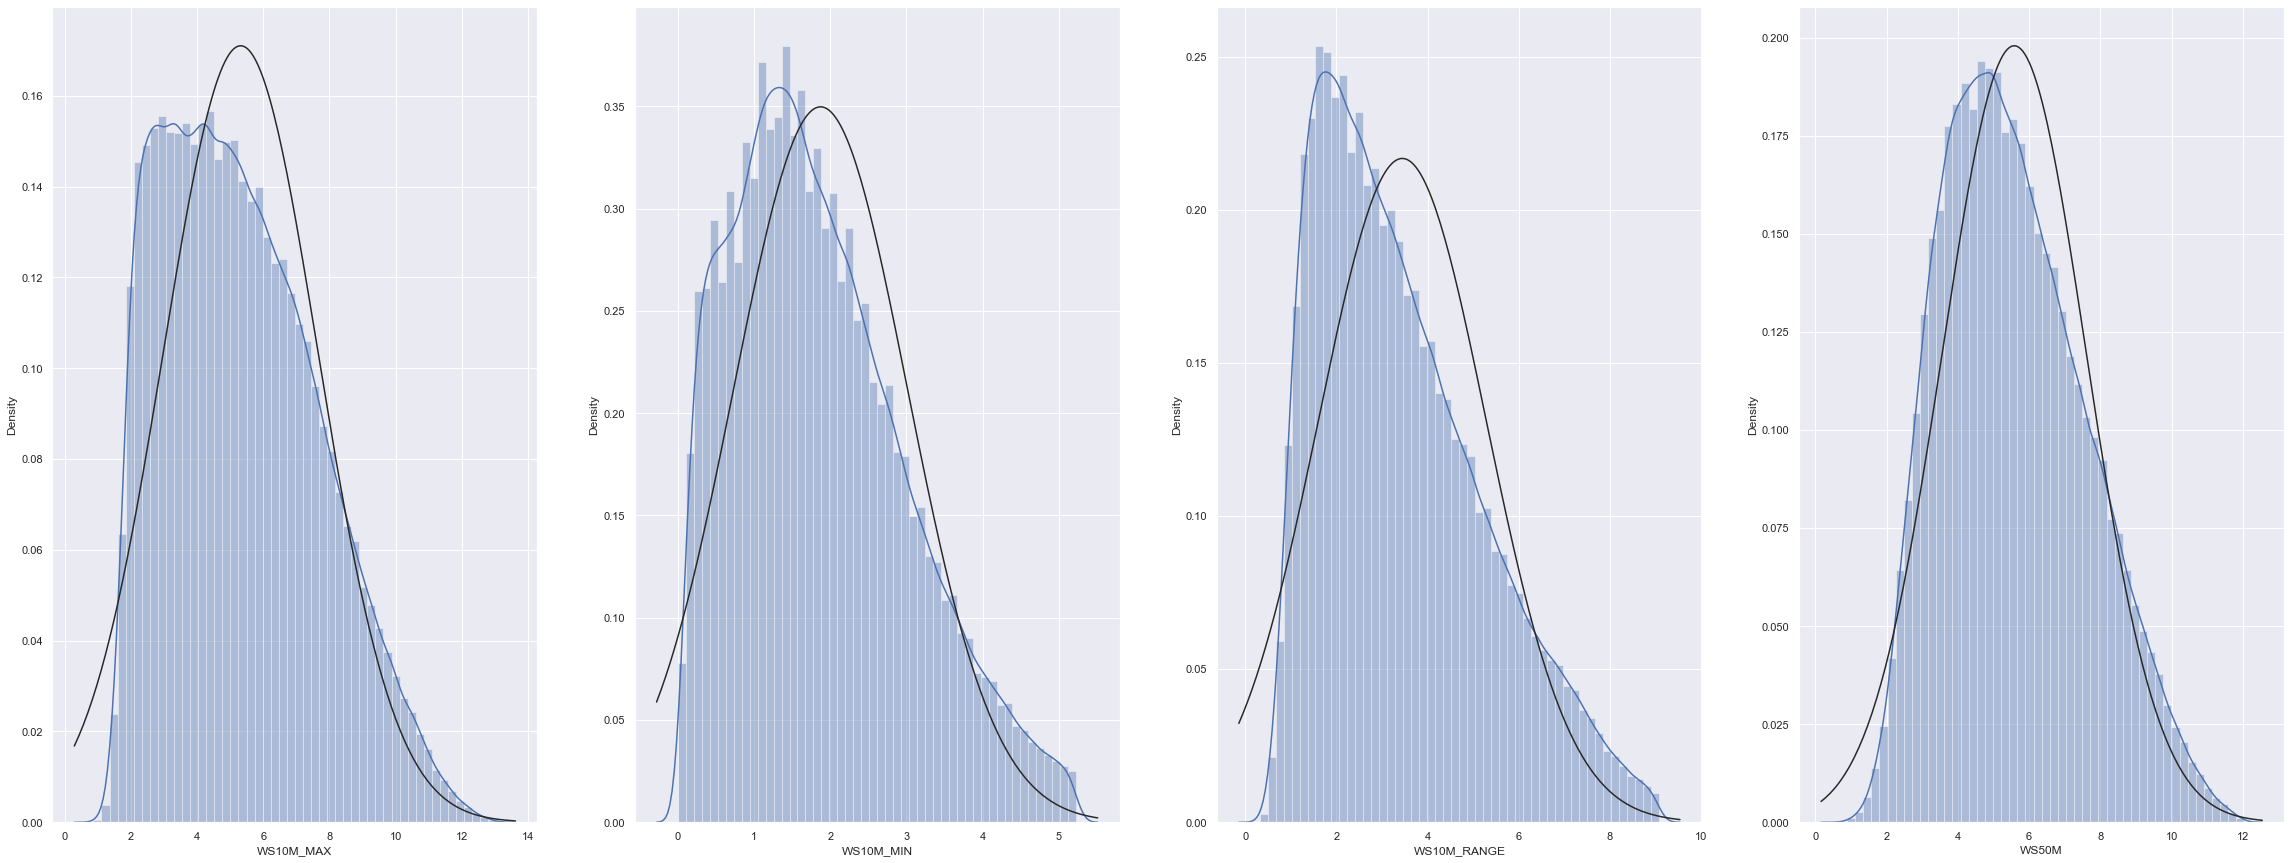

In [29]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(1,4)

sns.distplot(df['WS10M_MAX'],fit=norm,ax=ax1)
sns.distplot(df['WS10M_MIN'],fit=norm,ax=ax2)
sns.distplot(df['WS10M_RANGE'],fit=norm,ax=ax3)
sns.distplot(df['WS50M'],fit=norm,ax=ax4)

sns.set(rc={'figure.figsize':(40,15)})

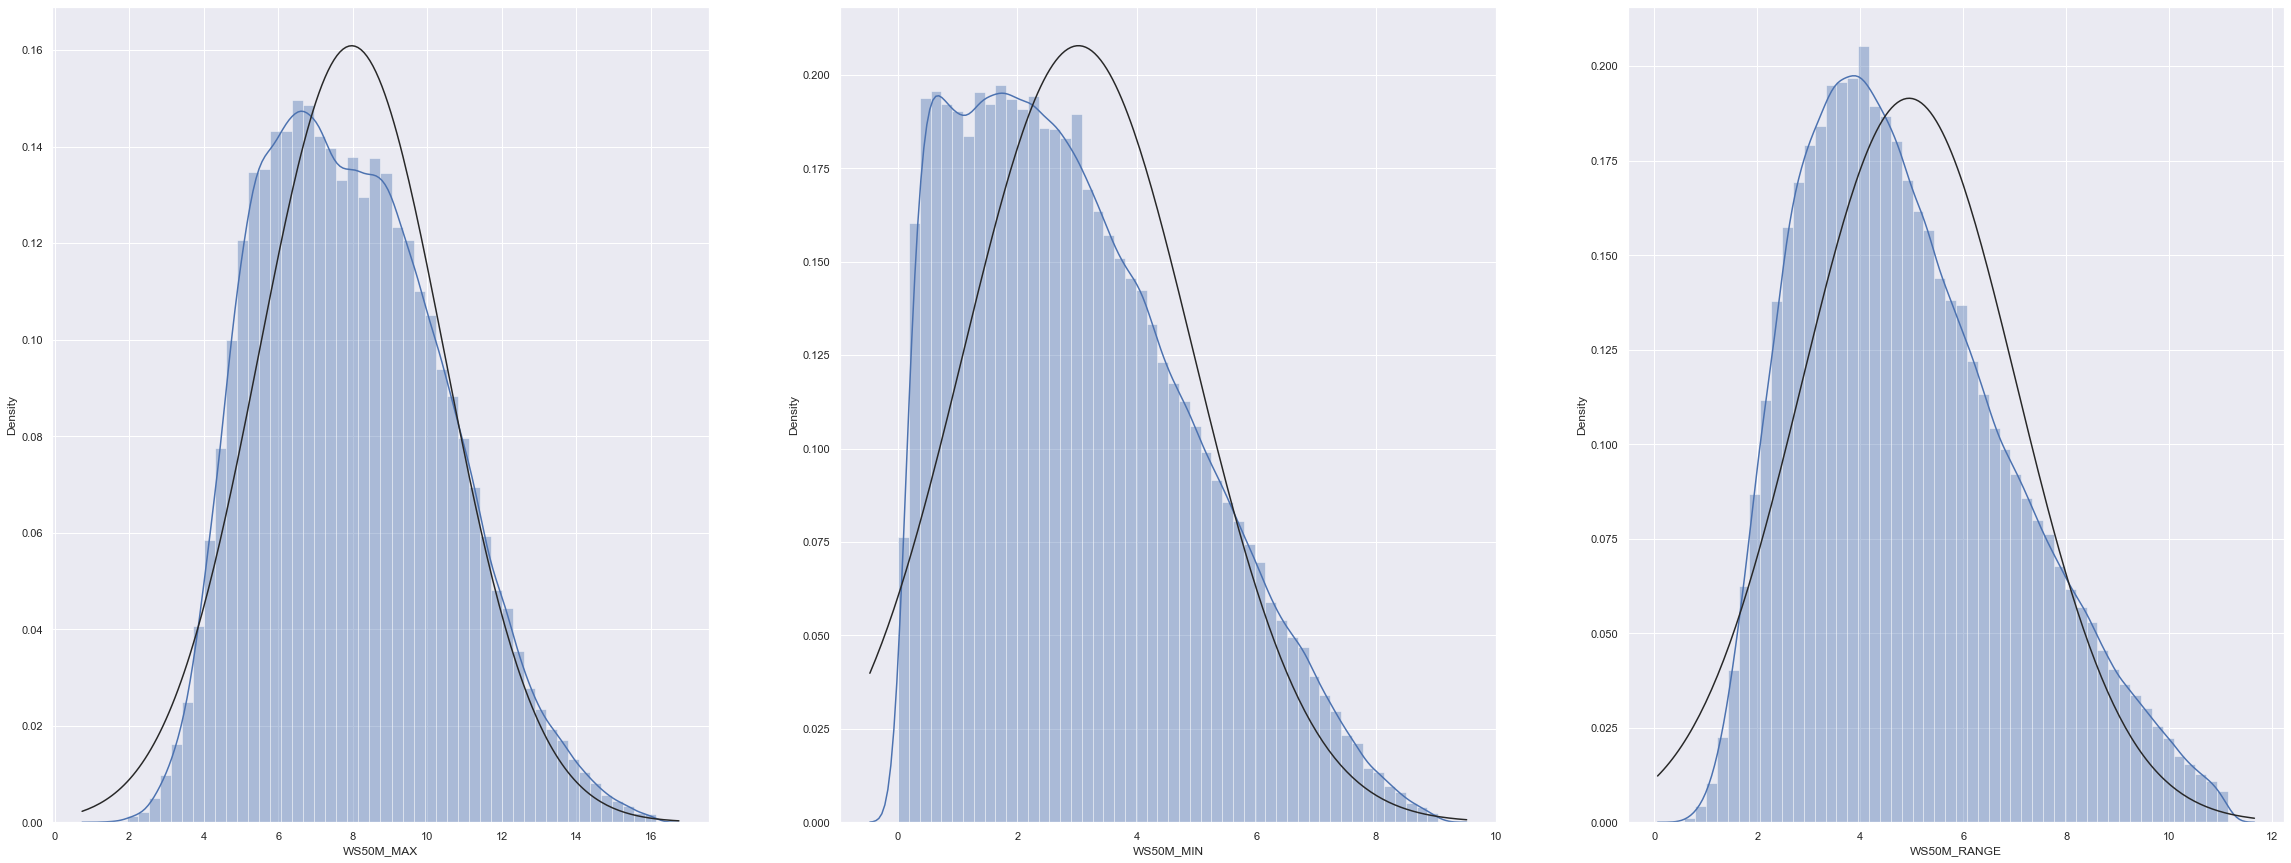

In [30]:
f, (ax1, ax2,ax3) = plt.subplots(1,3)

sns.distplot(df['WS50M_MAX'],fit=norm,ax=ax1)
sns.distplot(df['WS50M_MIN'],fit=norm,ax=ax2)
sns.distplot(df['WS50M_RANGE'],fit=norm,ax=ax3)


sns.set(rc={'figure.figsize':(40,15)})

<br>

<strong> Observations </strong>
<p> The data above shows the skewness of the varaibles. As we can see the data is mostly skewed to the right, representing a positive skew. </p>

<br>

<h3><strong>Univariate Analysis</strong> <br>

<strong> Distribution of Score </strong> 

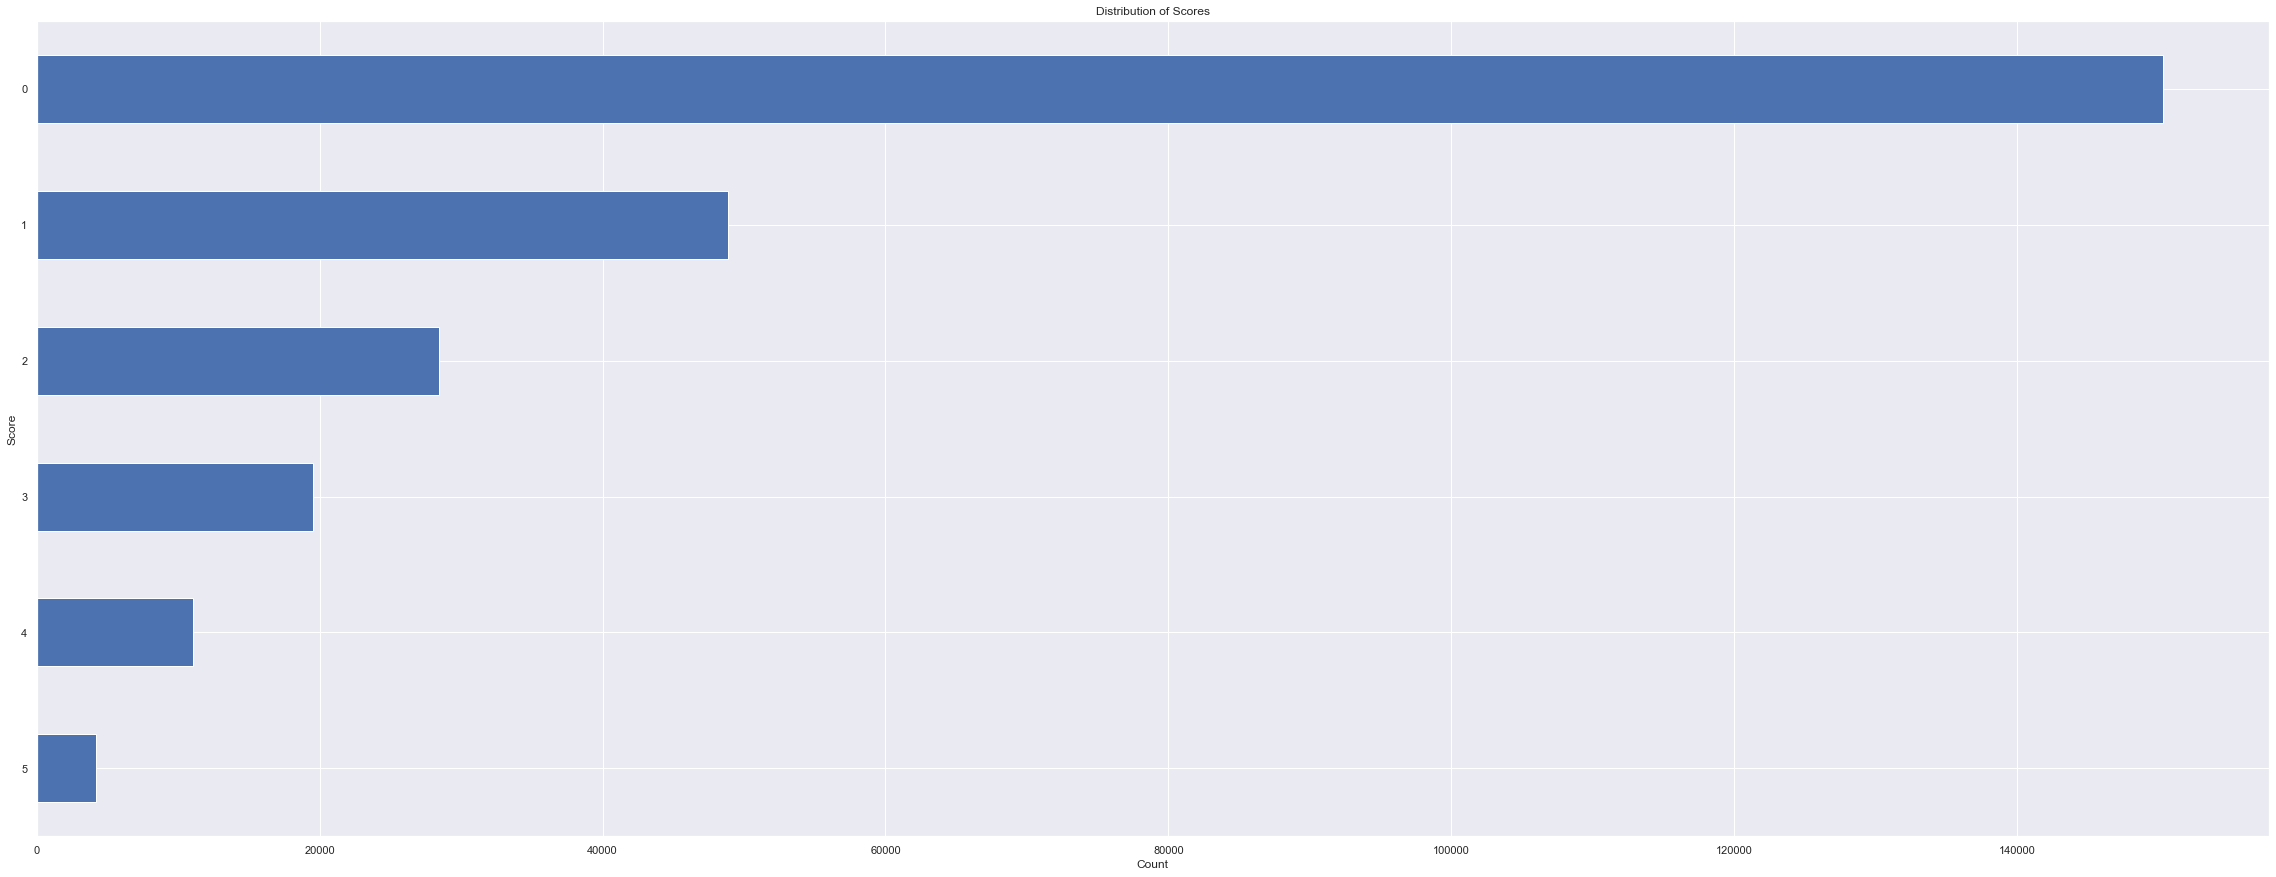

In [31]:
plt.title("Distribution of Scores")
df['score'].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Score")
plt.show()

The score seems to be highly skewed.

<br>

<strong> Distribution of Year </strong> 

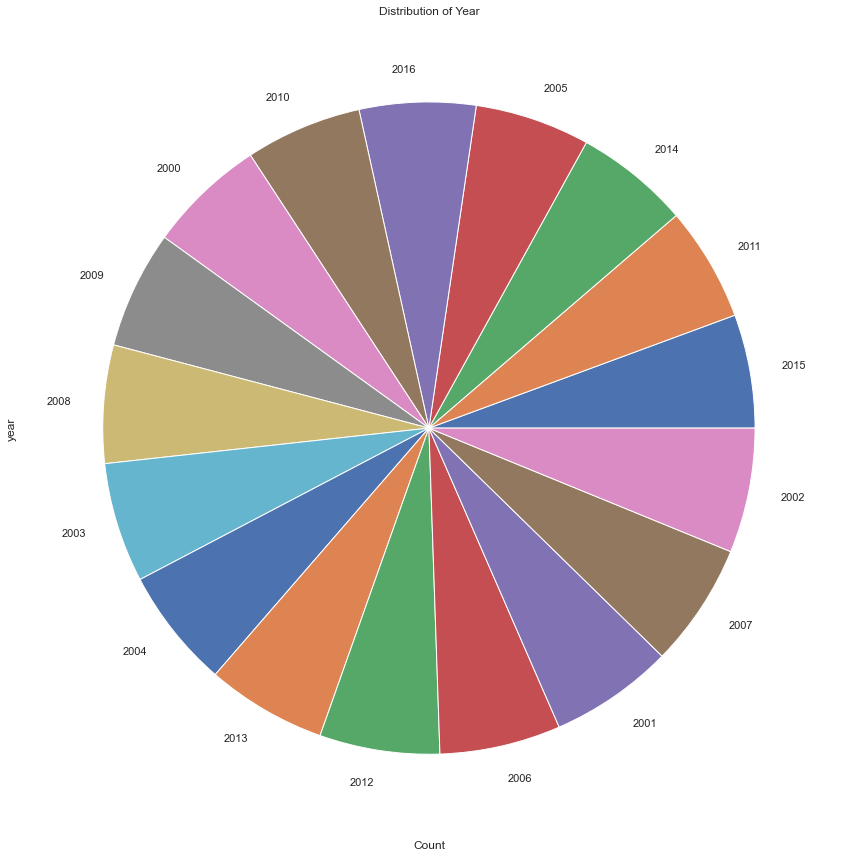

In [32]:
plt.title("Distribution of Year")
df['year'].value_counts().sort_values().plot(kind="pie")
plt.xlabel("Count")
plt.show()

There is an even representation of data across the years

<br>

<strong> Distribution of Month </strong> 

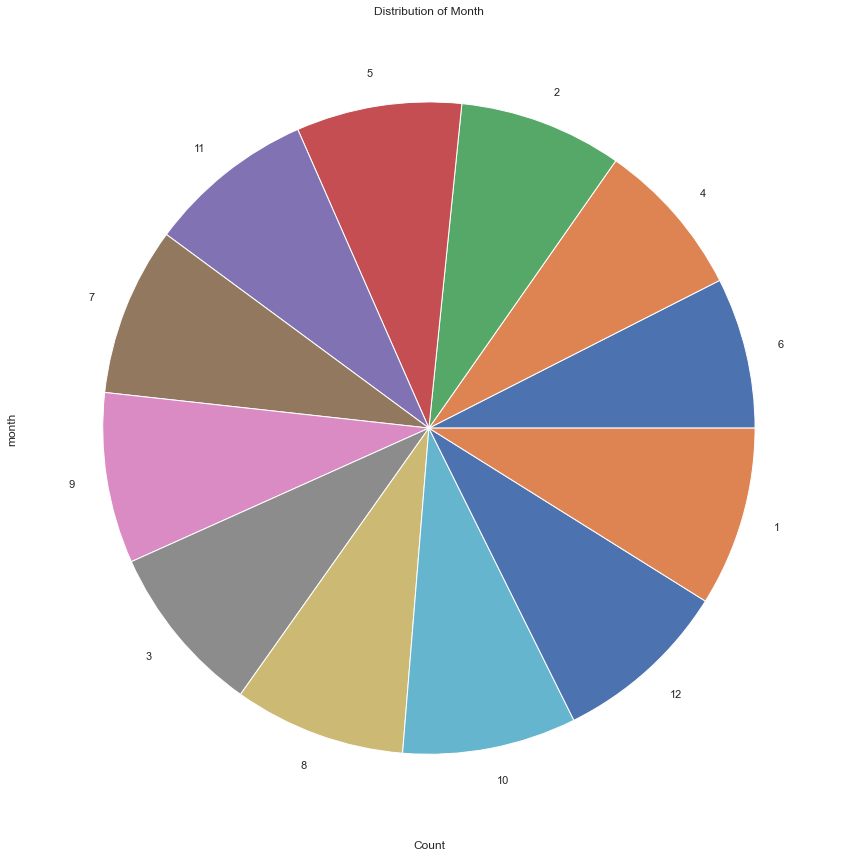

In [33]:
plt.title("Distribution of Month")
df['month'].value_counts().sort_values().plot(kind="pie")
plt.xlabel("Count")
plt.show()

There is an even representation of data across the months. .

<br>

<h3><strong>Bivariate Analysis</strong>

<br>

<strong>1. Analysis Of The Number Of Drought Across The Years & Months </strong>

In [30]:
def myfunc(x):
        if x == 0  :
            return "No Drought"
        elif x == 1  :
            return "Abnormally Dry"
        elif x == 2:
            return "Moderate Drought"
        elif x == 3:
            return "Severe Drought"
        elif x == 4:
            return "Extreme Drought"
        else:
            return "Exceptional Drought" 
   




df=df.assign(Severity=lambda x:df["score"].apply(myfunc))



<br>

<strong> Year </strong>

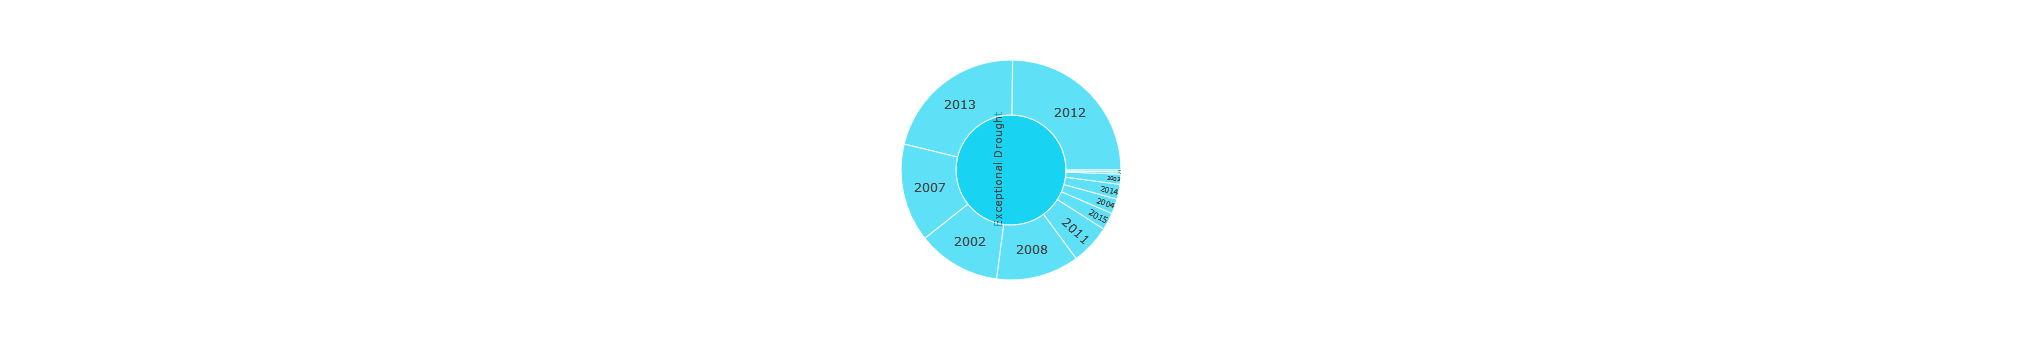

In [35]:
fig = px.sunburst(df, path=['Severity','year'], 
                  color_continuous_scale='RdBu')
fig.show()

The graph above shows the number of Drought or abnormal dryness over the years. It can be observed that most years there is usually no drought; about 60 % of the data shows that. Whilst most year experience no drought some years exprienced Moderate drought to Exceptional droughts. When clicking on the Sunburst Chart we can further analyse which year is the dryess year. When clicking on the Exceptional Drought, we can see that 2012 is the dryest year, followed by 2011 ad 2007. From here we can see a general trend that as the years increase the number of exceptional droughts also increases. We will explore that further later using a line chart which shows the progression of both years and Exceptional Drought. Other than exceptional droughts we can take a look at extreme droughts. The year which experience the most number of extreme droughts is the year 2000, followed by 2012 and 2002. This data further signifies the pattern that we may be seeing. As we go on and continue observing the data 2000, 2012 2007 and 2012 are often seen as the top contributers. All years experience Abnormally dry seasons. As we can deduce it seems that the number of abnormally dry seasons and moderate drought is consistent across all years. Thus it seems that dry seasons are not uncommon and usually happen every year but extreme droughts only happen on certain years.  

<br> 

<strong> Month </strong>

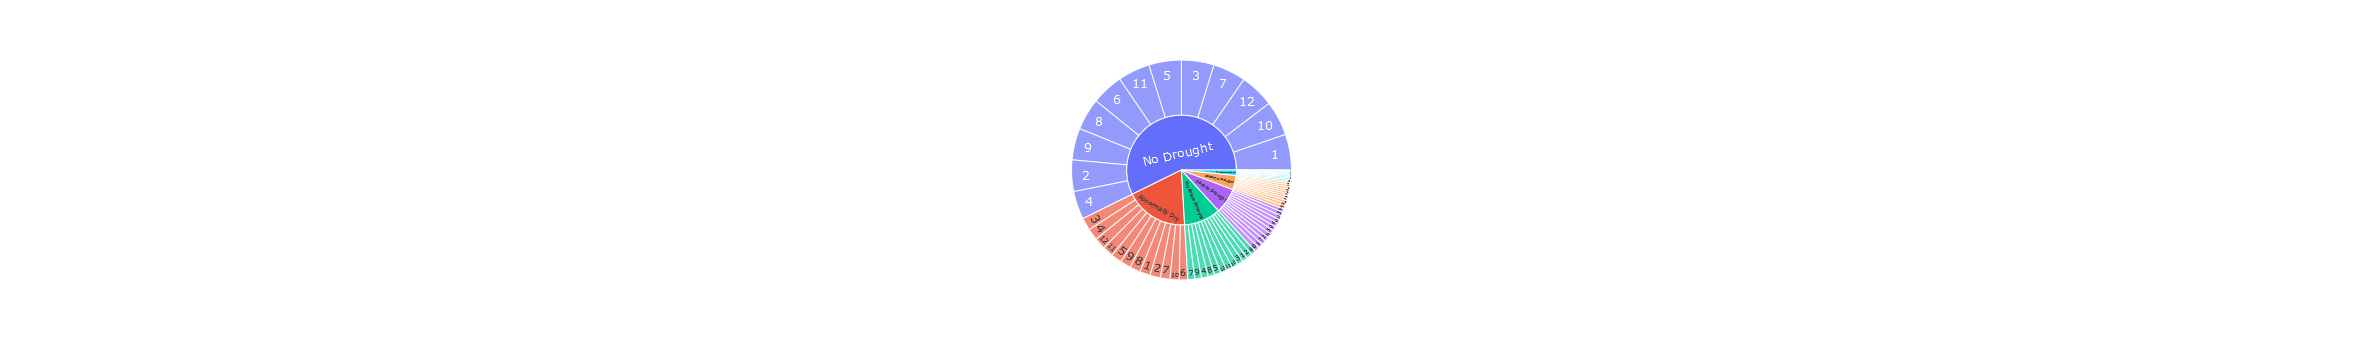

In [36]:
fig = px.sunburst(df, path=['Severity','month'])
fig.show()

The graph above show the number of types of drought over the months. It can be observed that most months the distribution of each type of drought is consistent and evenly distributed.This is prevalent for all drought types except for extreme drought where we saw the the month 8 ,10, 9 and 7 saw the highest number of extreme droughts. From our observation the months with extreme dryness would be tied to month 8 ,9, 10 and 7 whilst the dryest years would be tied to 2012,2007 and 2011. Exceptional Droughts are also a rare occurence taking about only a few percent when comapred to whole dataset. We have uncovered the number of counts of each type of drought for each year and month and observed a possible pattern. Now we will confirm that pattern using using time and count of occurences 

<br>

<strong> Analysing the Trend </strong>

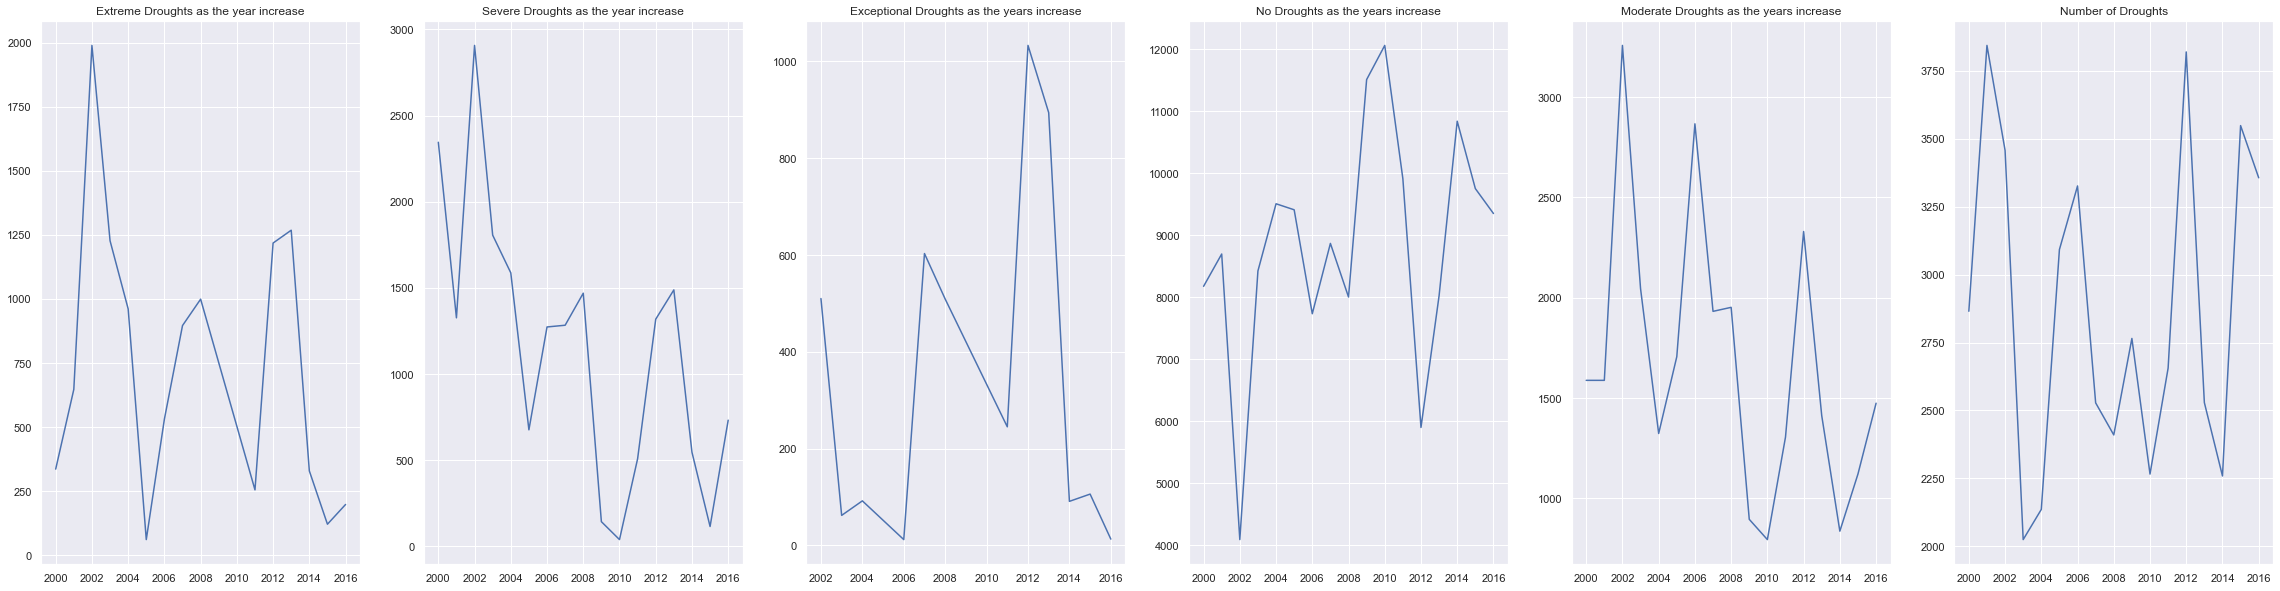

In [39]:
f, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6)
ED=df[df['Severity']=='Extreme Drought']
ED['year'].value_counts().sort_index().plot(kind="line",title="Extreme Droughts as the year increase",ax=ax1)
SD=df[df['Severity']=='Severe Drought']
SD['year'].value_counts().sort_index().plot(kind="line",title="Severe Droughts as the year increase",ax=ax2)
EED=df[df['Severity']=='Exceptional Drought']
EED['year'].value_counts().sort_index().plot(kind="line",title="Exceptional Droughts as the years increase",ax=ax3)
ND=df[df['Severity']=='No Drought']
ND['year'].value_counts(sort=False).plot(kind="line",title="No Droughts as the years increase",ax=ax4)
MD=df[df['Severity']=='Moderate Drought']
MD['year'].value_counts(sort=False).sort_index().plot(kind="line",title="Moderate Droughts as the years increase",ax=ax5)
AD=df[df['Severity']=='Abnormally Dry']
AD['year'].value_counts().sort_index().plot(kind="line",title="Abnormally Dry years as the years increase",ax=ax6)
plt.title('Number of Droughts')
sns.set(rc={'figure.figsize':(40,10)})

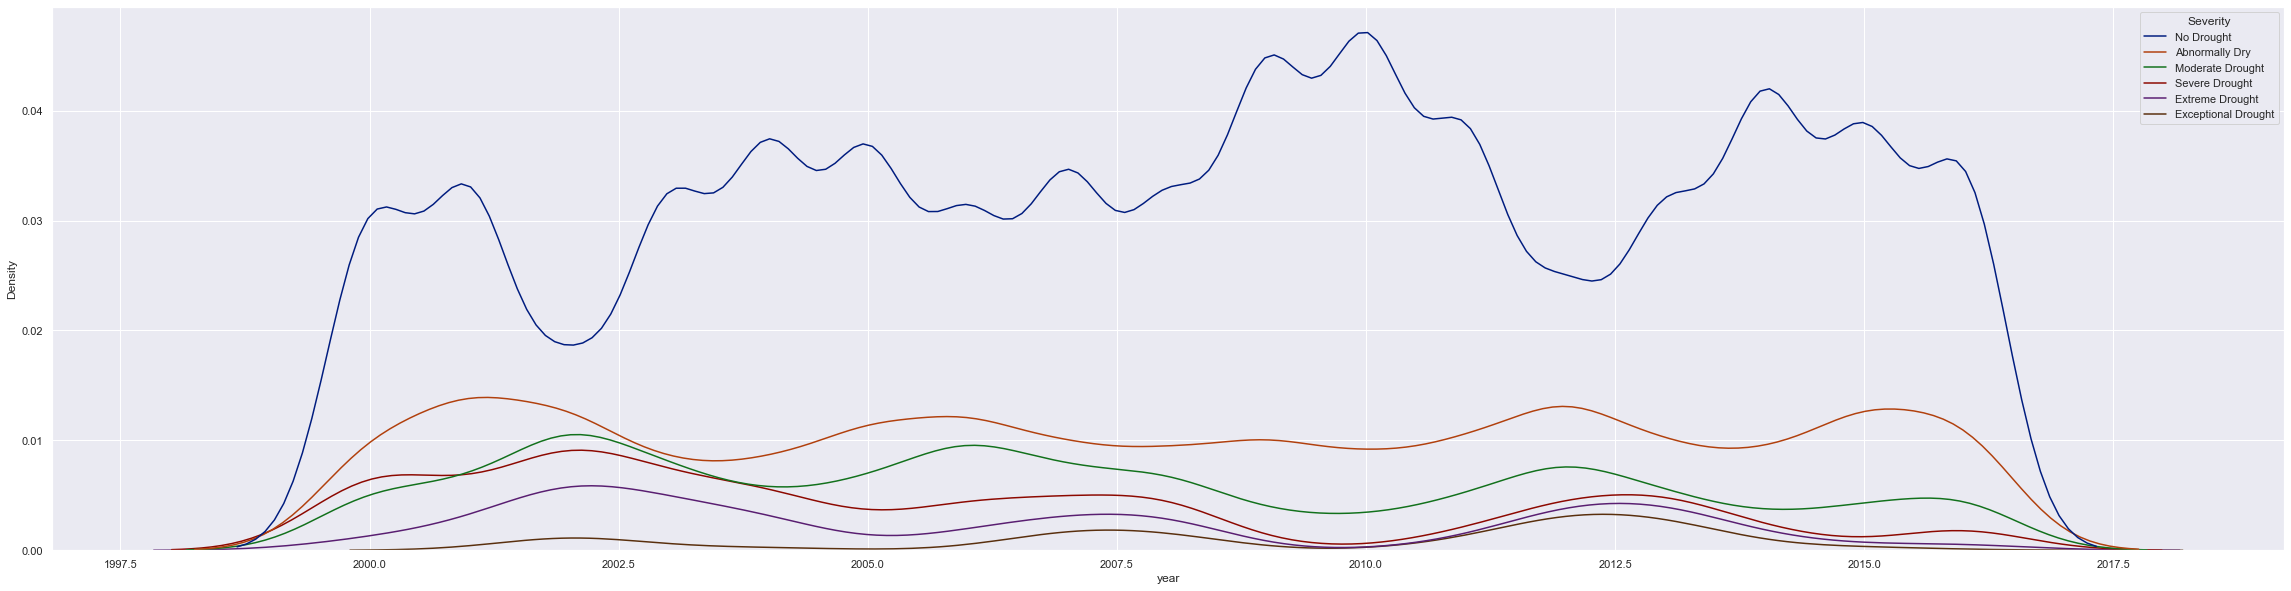

In [38]:
EEDSDMDED=df.copy()
sns.kdeplot(x='year',hue='Severity',data=EEDSDMDED, palette="dark")
plt.show()

The graph above shows the density/number of occurences of each type of drought over time. The graph showed erratic behaviour with no clear relationships between year and severity of droughts. Instead what we could interprete is that the year 2000 ,2007 and 2012 saw a high number of high level droughts droughts. These years also experienced harsher droughts as compared to other years like 2004 or 2010 which saw a relatively low number of Severe, Exceptional and Moderate Droughts. The years where there are low number of No Droughts could be seen having a pattern. It seems that between every 2 - 3 years there are 2 points where there is a low number of No Droughts. Every 2 - 3 years interval we could also observed that there is at least a point where there is a high number of high level droughts 

<br>

-----------------------------------

<br>

<strong>2. Dew and Precipitation In Different Type of Droughts</strong> 

<p>The Graphs below are to explore the relationship between the different types of droughts and the Precipitation and Dewness during those Droughts

<br>

<strong>I. Precipitation</strong>

Rainfall/Precipitaion can also determine how fast a crop will grow from seed, including when it will be ready for harvesting. A good balance of rain and proper irrigation can lead to faster-growing plants, which can cut down on germination time and the length between seeding and harvest.

In [40]:
# Splitting the dataset into their different category with regards to severity. 
# This allows us to view the different conditions the different droughts consist of 

Exceptional_Droughts = df[df['Severity']=='Exceptional Drought']
Extreme_Droughts = df[df['Severity']=='Extreme Drought']
Severe_Droughts = df[df['Severity']=='Severe Drought']
Abnormal_Droughts = df[df['Severity']=='Abnormally Dry']
No_Droughts = df[df['Severity']=='No Drought']



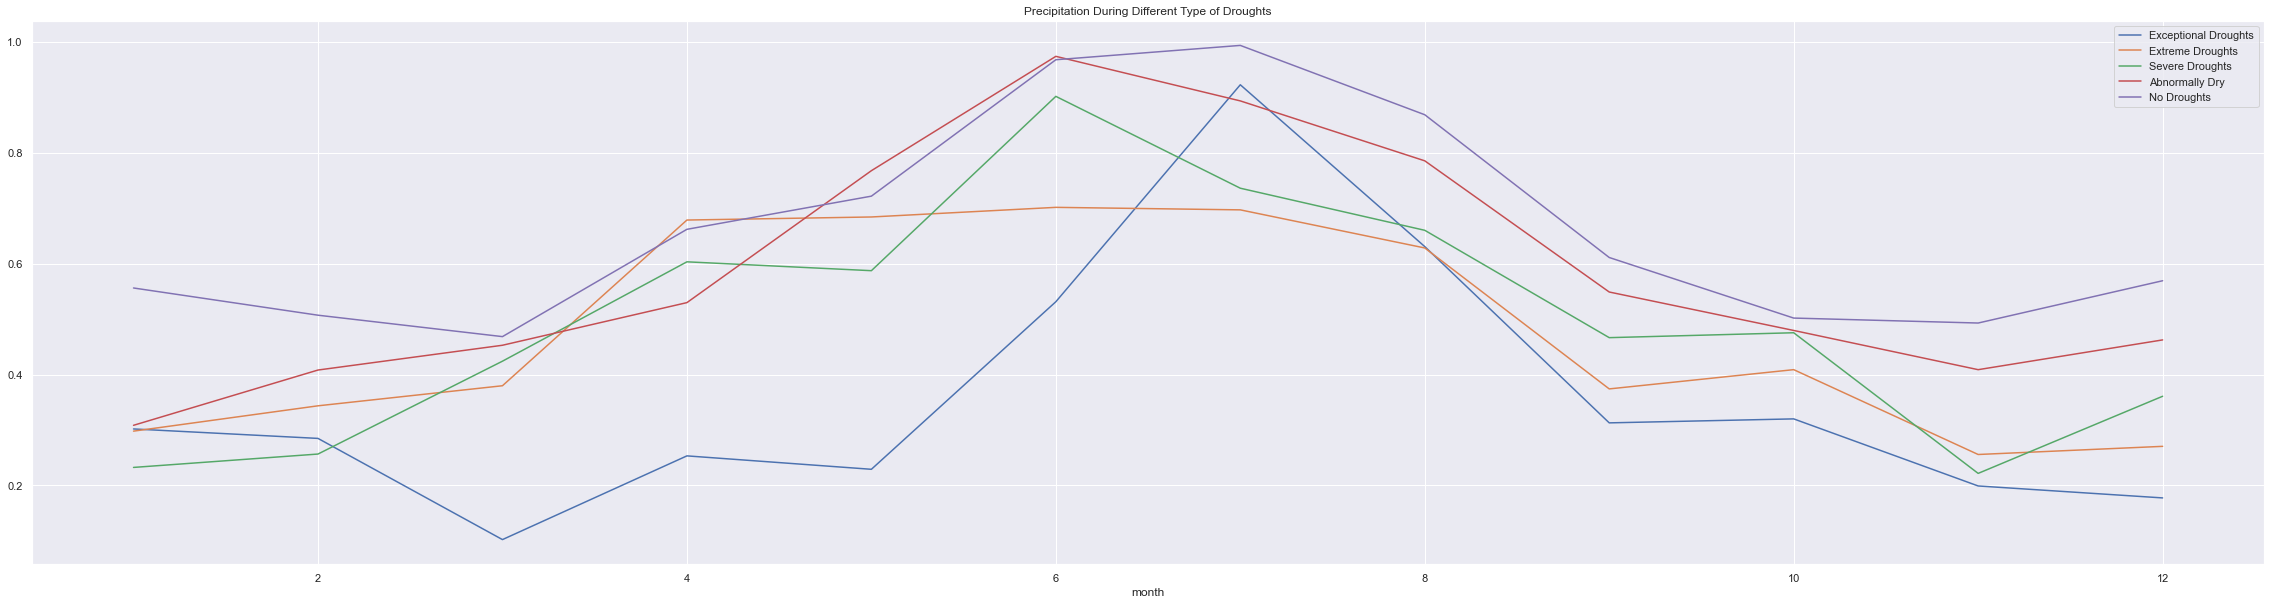

In [41]:
Exceptional_Droughts['PRECTOT'].groupby(df['month']).mean().plot(kind="line",title="Precipitation During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['PRECTOT'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['PRECTOT'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['PRECTOT'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['PRECTOT'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong>II. Dew</strong>

Dew is those water droplets clinging to blades of grass after dawn. It forms because of differences in air temperature between day and night. Air contains lots of different gases, including water vapor. Warmer air can hold more water vapor.

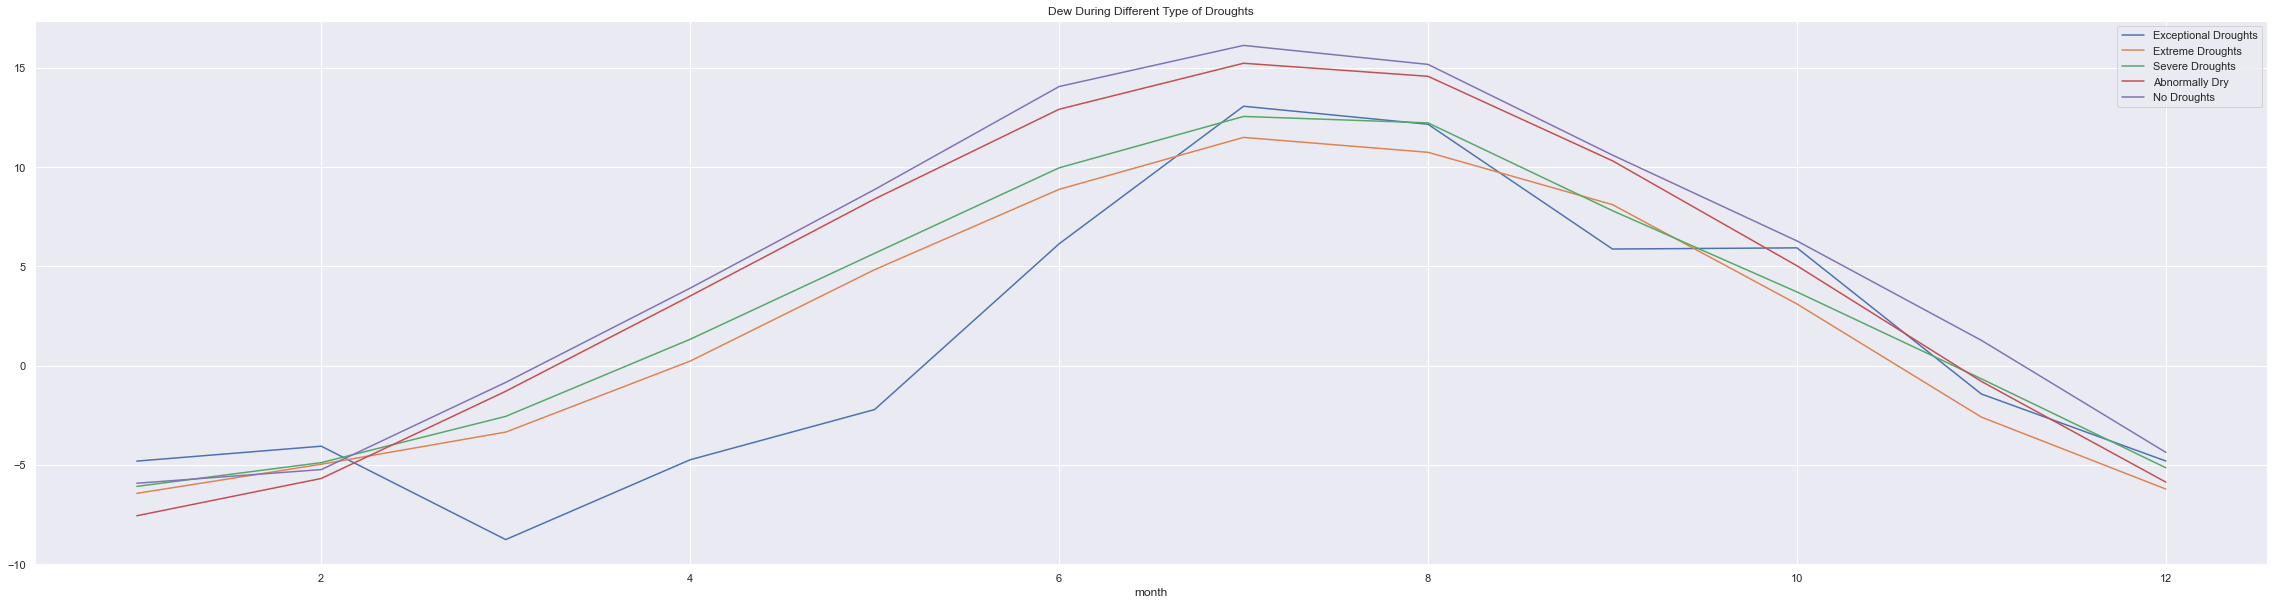

In [42]:
Exceptional_Droughts['T2MDEW'].groupby(df['month']).mean().plot(kind="line",title="Dew During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['T2MDEW'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['T2MDEW'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['T2MDEW'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['T2MDEW'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong>III. Earth Skin Temperature & Temperature At 2 Meters </strong>

Skin temperature (Ts) is the physical temperature of the Earth's surface

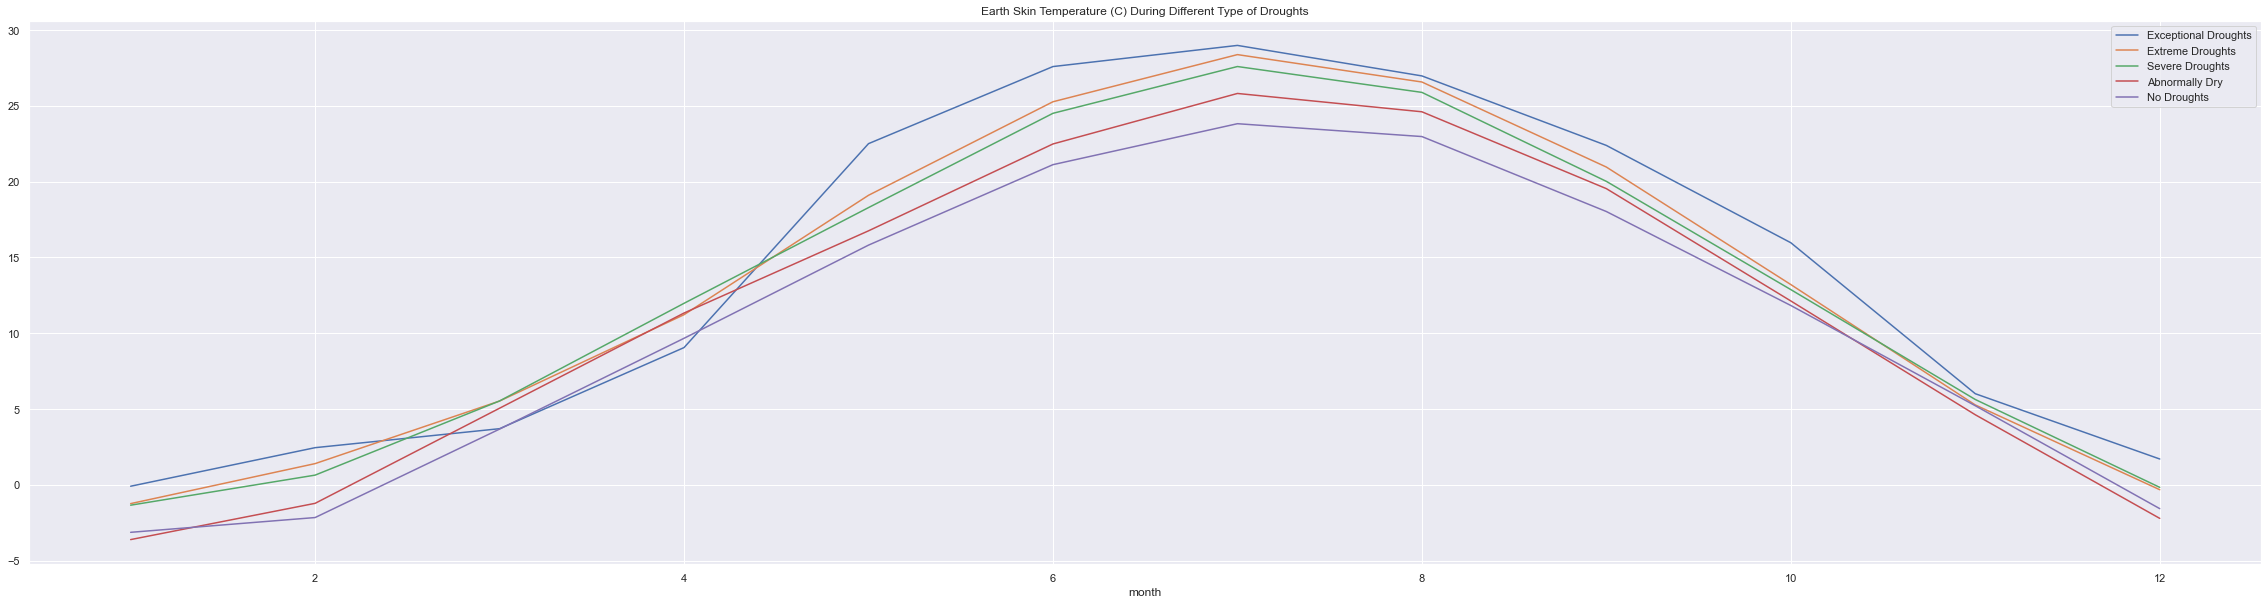

In [43]:
Exceptional_Droughts['TS'].groupby(df['month']).mean().plot(kind="line",title="Earth Skin Temperature (C) During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['TS'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['TS'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['TS'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['TS'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

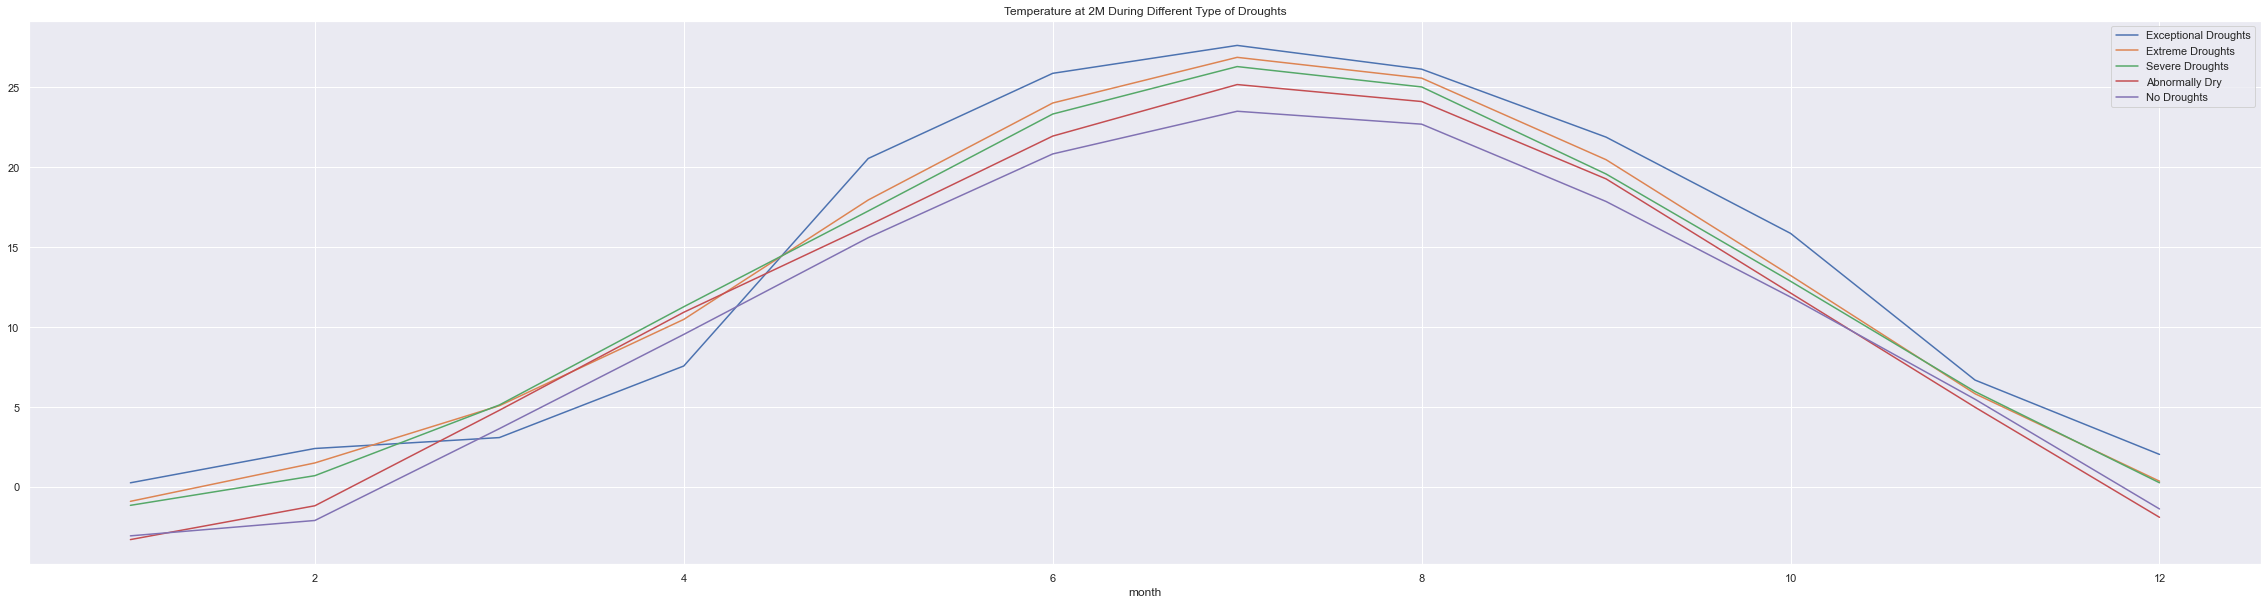

In [44]:
Exceptional_Droughts['T2M'].groupby(df['month']).mean().plot(kind="line",title="Temperature at 2M During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['T2M'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['T2M'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['T2M'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['T2M'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong>IV. Humidity</strong>

Humidity is the concentration of water vapour present in the air.

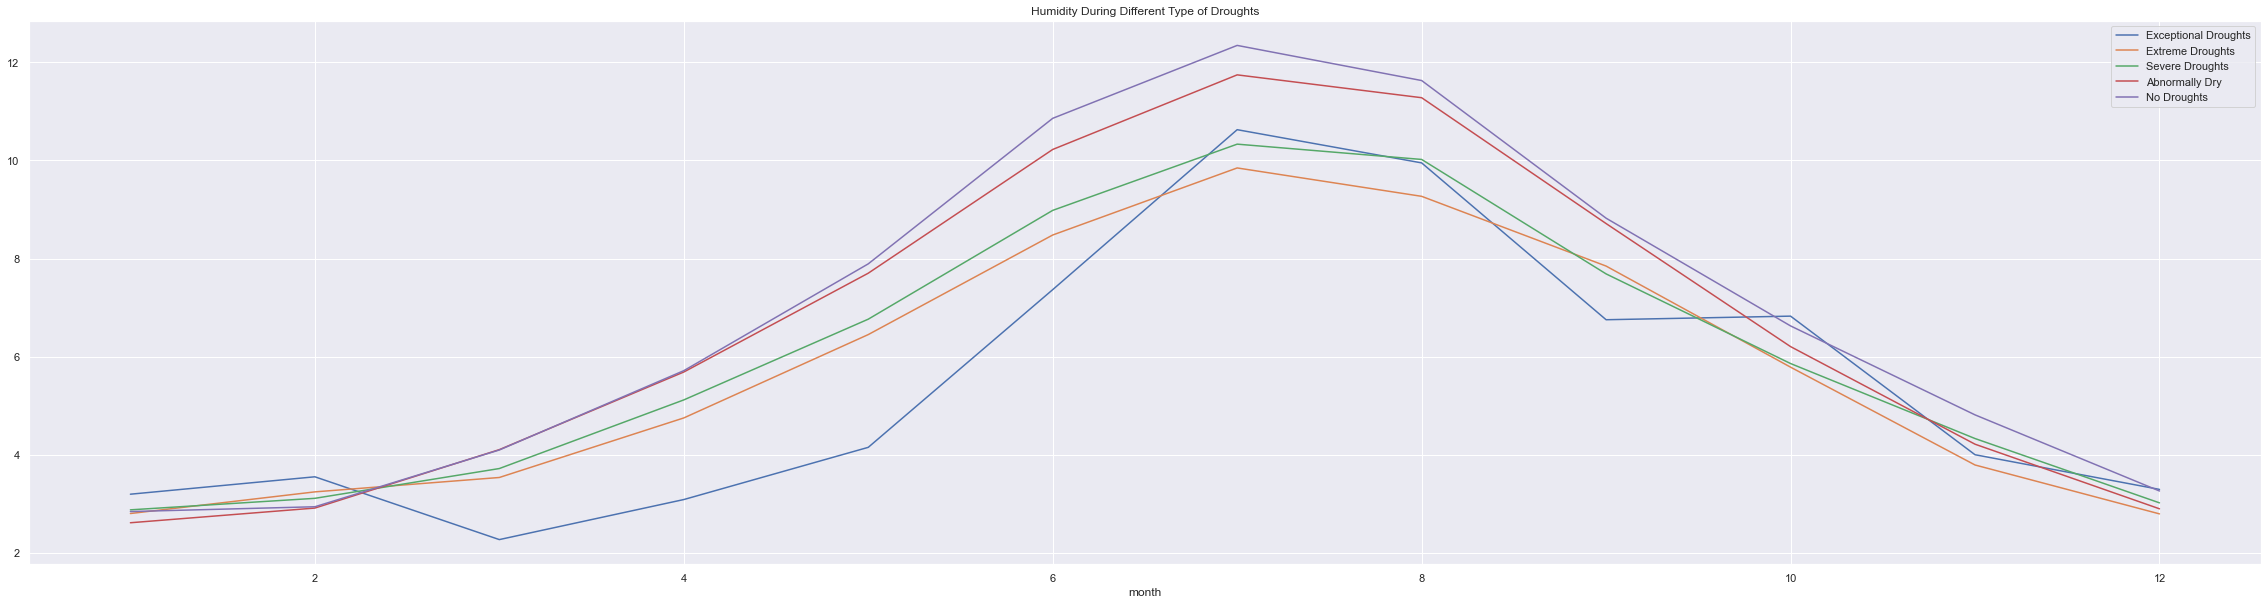

In [46]:
Exceptional_Droughts['QV2M'].groupby(df['month']).mean().plot(kind="line",title="Humidity During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['QV2M'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['QV2M'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['QV2M'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['QV2M'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong>V. Wet Bulb Temperature</strong>

The wet-bulb temperature is the lowest temperature which may be achieved by evaporative cooling of a water-wetted, ventilated surface. In general it means how fast the water evaporates relative to humidity levels. 

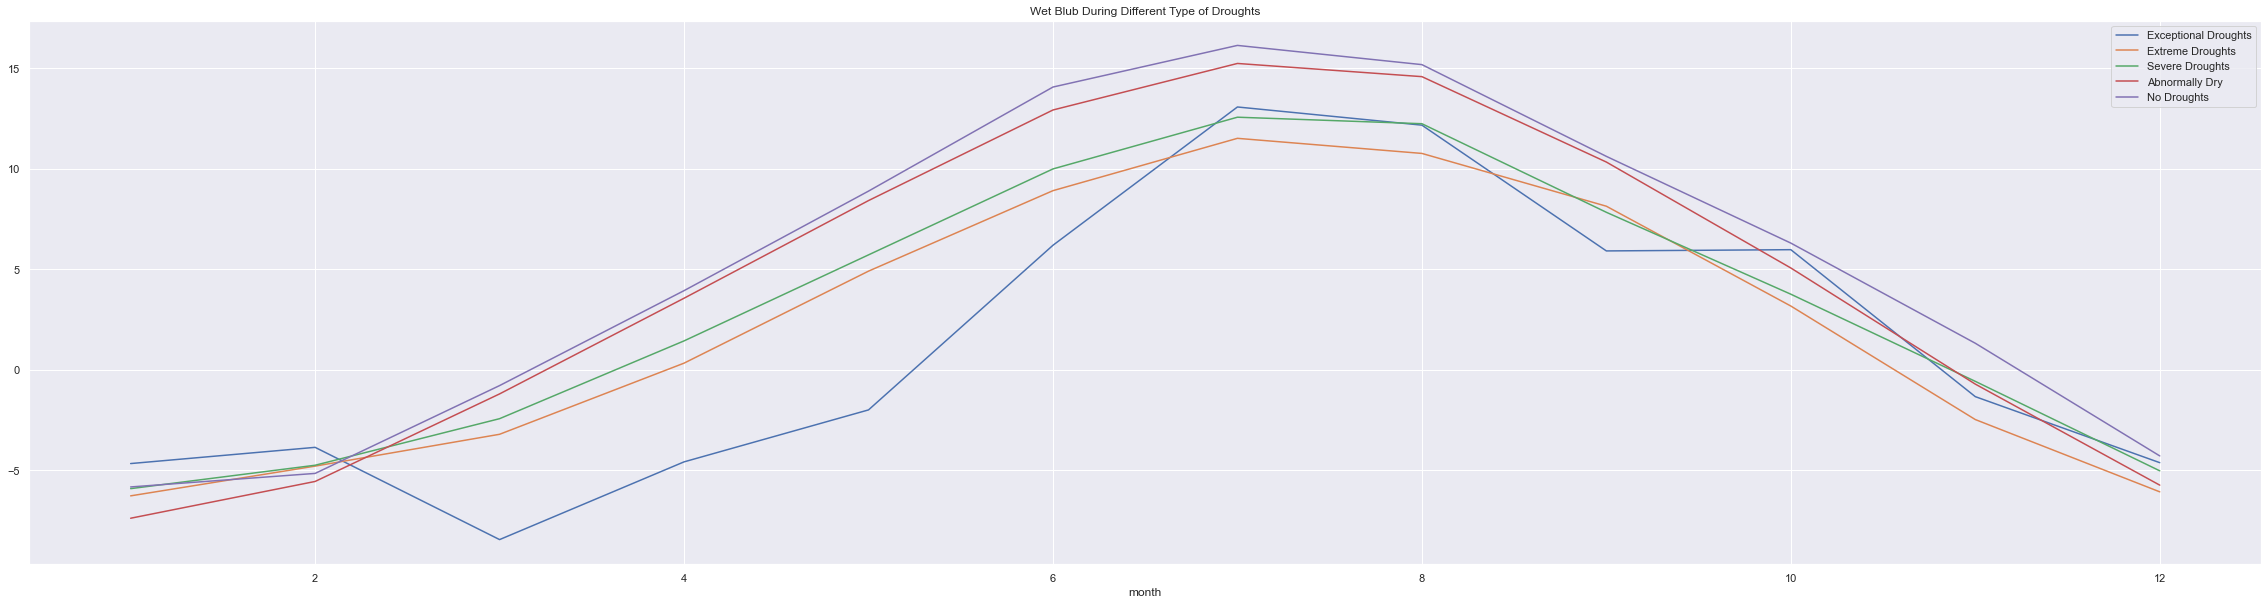

In [47]:
Exceptional_Droughts['T2MWET'].groupby(df['month']).mean().plot(kind="line",title="Wet Blub During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['T2MWET'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['T2MWET'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['T2MWET'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['T2MWET'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong>VI. Wind Speed</strong>

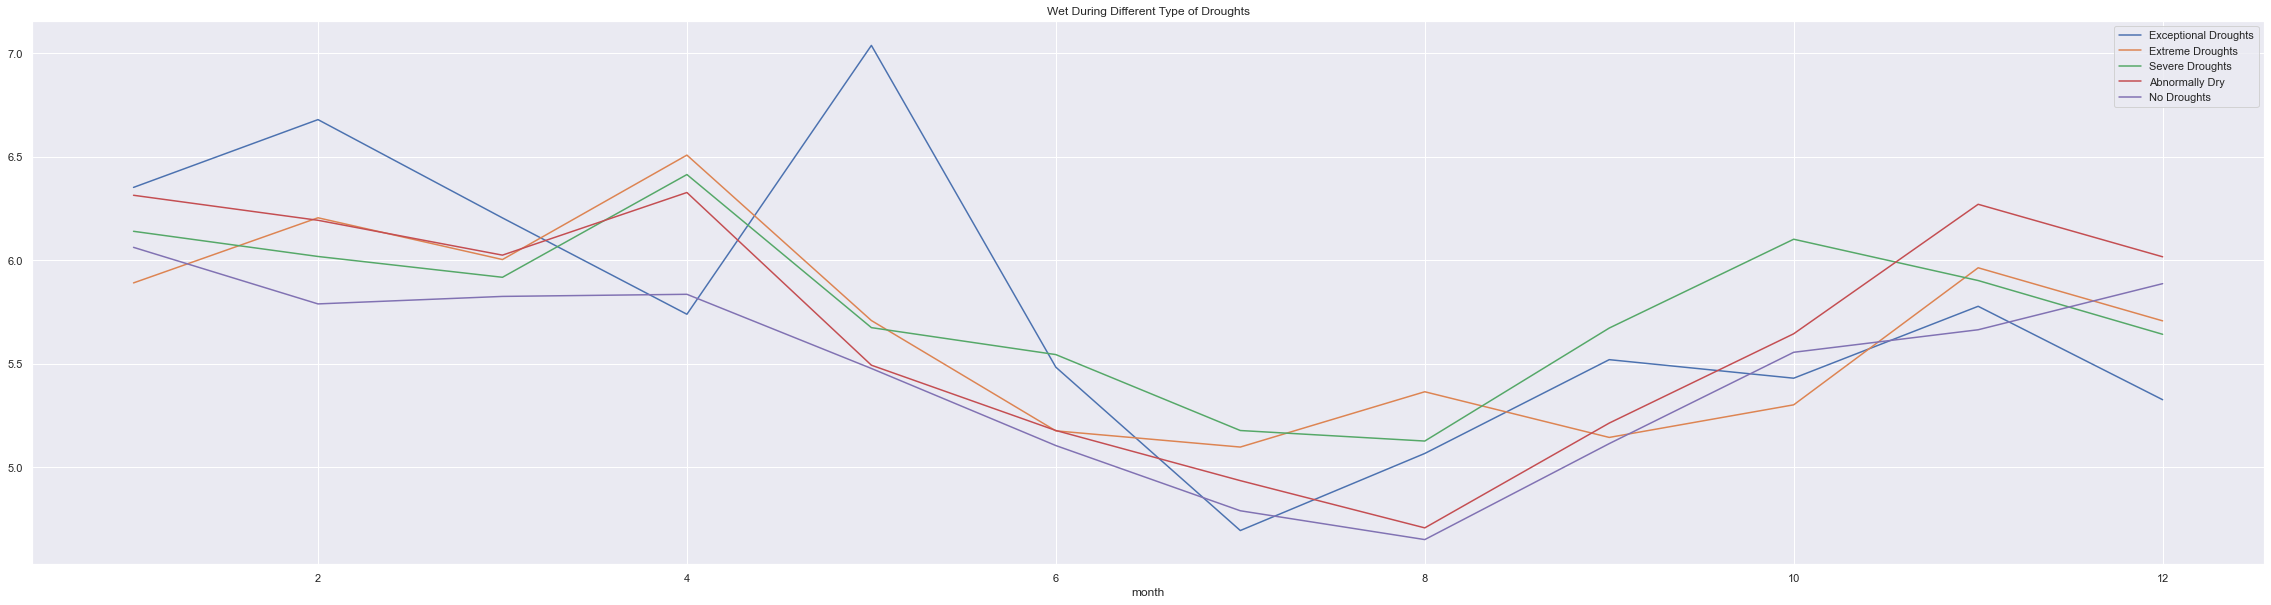

In [48]:
# 50m
Exceptional_Droughts['WS50M'].groupby(df['month']).mean().plot(kind="line",title="Wet During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['WS50M'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['WS50M'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['WS50M'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['WS50M'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

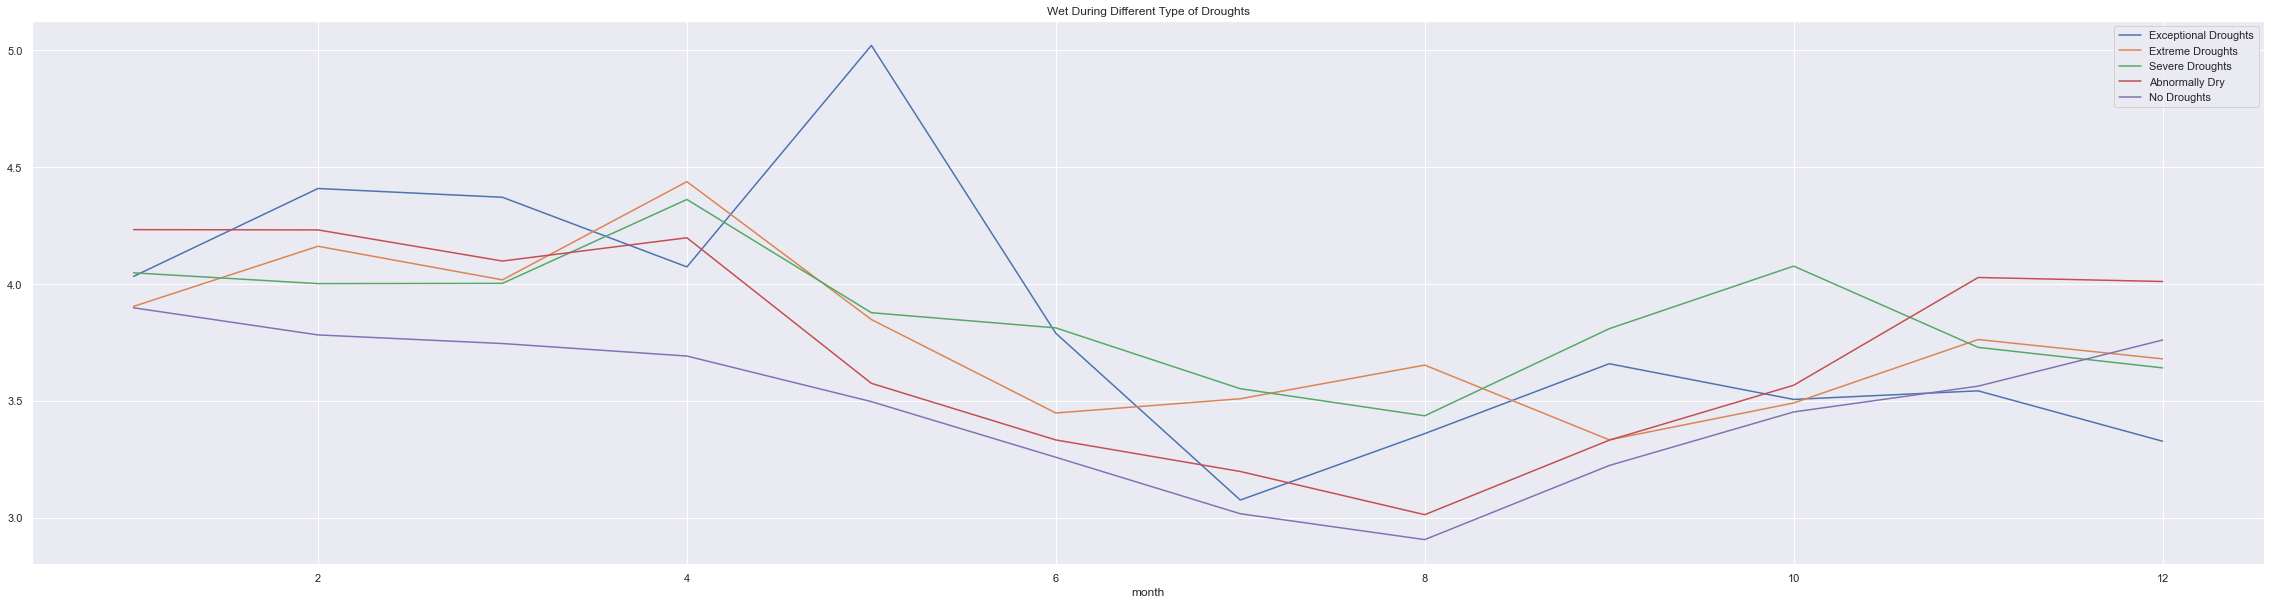

In [49]:
#10m
Exceptional_Droughts['WS10M'].groupby(df['month']).mean().plot(kind="line",title="Wet During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['WS10M'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['WS10M'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['WS10M'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['WS10M'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong>VII. Temperature Range</strong>

Temperature Range between the months.

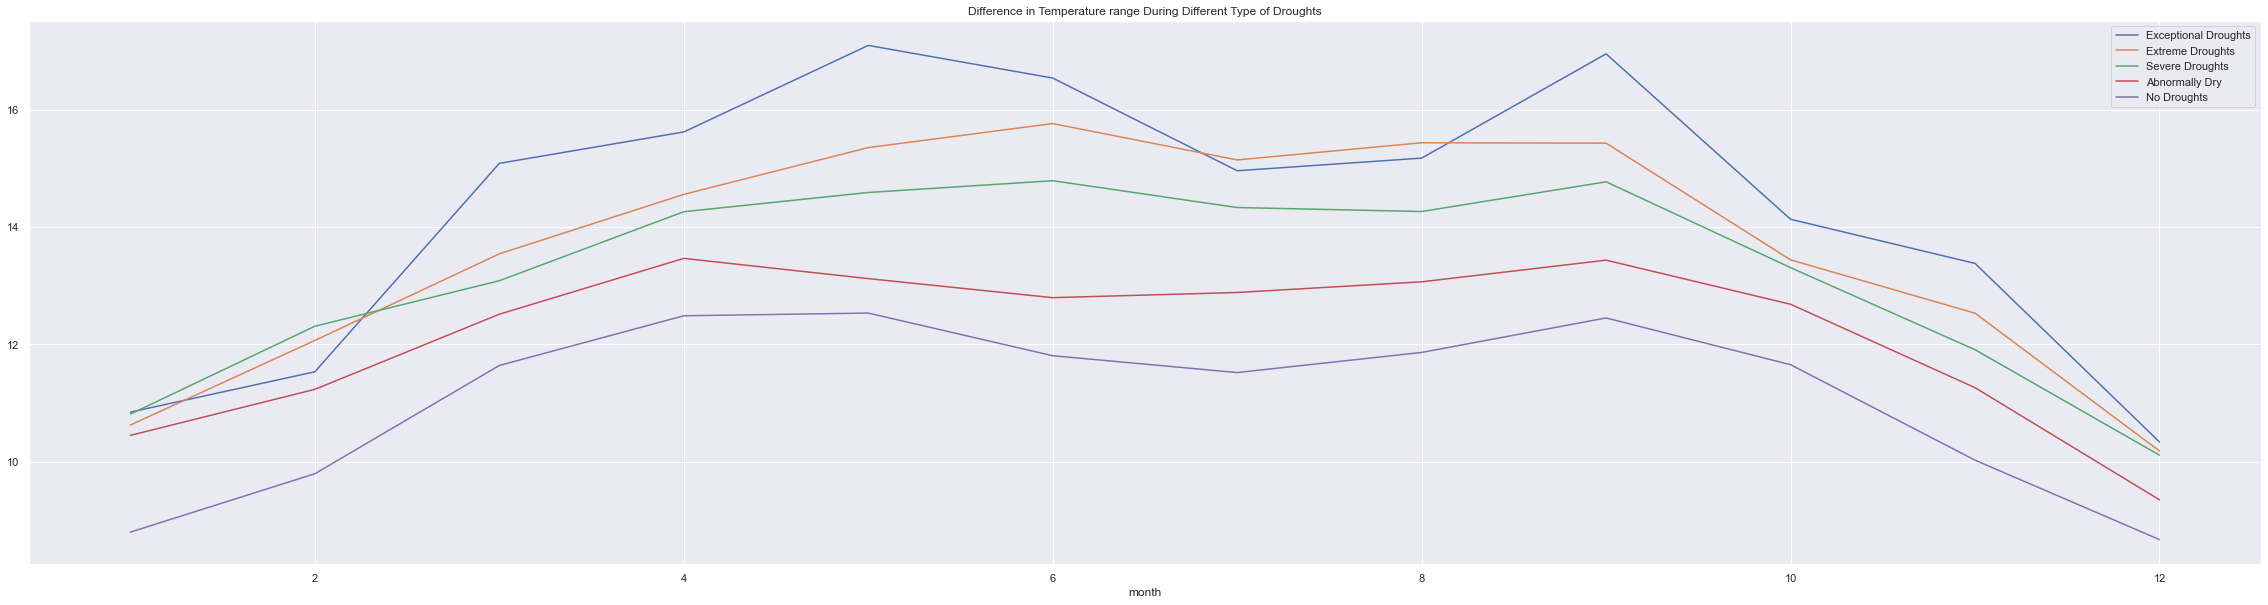

In [50]:
Exceptional_Droughts['T2M_RANGE'].groupby(df['month']).mean().plot(kind="line",title="Difference in Temperature range During Different Type of Droughts",label='Exceptional Droughts')
Extreme_Droughts['T2M_RANGE'].groupby(df['month']).mean().plot(kind="line",label='Extreme Droughts')
Severe_Droughts['T2M_RANGE'].groupby(df['month']).mean().plot(kind="line",label='Severe Droughts')
Abnormal_Droughts['T2M_RANGE'].groupby(df['month']).mean().plot(kind="line",label='Abnormally Dry')
No_Droughts['T2M_RANGE'].groupby(df['month']).mean().plot(kind="line",label='No Droughts')
plt.legend()
plt.show()

<br>

<strong> Purpose of the graphs </strong>
<p>The graph above shows the difference between the variables during different types of droughts. These graphs above aim to tell the relationship between certain variables and the effect it has on the severity of droughts through the analysis of their mean value.Why is month chosen instead of years and days is because of their representation potential. Choosing years might under represent some details while choosing days might introduce more complexity and intricacy which might cause tunnel vision.</p><br>

<strong>The Notables </strong>
<p>The notable graphs are Precipitation, Temperature Range and Earth Skin Temperature. Throught subjective analysis and through some research we can deduce that these three play a huge role in the severity of droughts. From the first graph precipitation we can observe that Exceptional Droughts have the lowest amount of Precipitation at 0.33-0.35 while during the times when there are No Droughts we can see that mean Precipitation is the highest at around 0.42 - 0.43 at its highest. From the second graph which is Earth Skin Temperature (EST)  we can observe that Exceptional Drought has the highest temperature on record all year long. EST was seen to have peaked at the 7 month, July at around 32 Degrees Celcius. While EST was high during Exceptional Droughts, the opposite could be said for EST on No Drought, the temperature all year round was consistently lower than all months with Droughts. The highest temperature recorded for No Drought was around 24.5 degrees. As observed the temperature range between both extremes are about 7.5 degrees which is quite significant in agriculture, regarding the growth of crops. Lastly, we have our Temperange Range. The Temperature range between the different severity of droughts is significant. From the graph we can see that No Droughts recorded the lowest difference in temperature all year round while Exceptional Droughts recorded the highest temperature difference all year round.  The highest temperature difference when comparign No Drought and Exceptional Drought is at around 3 degress celcius as the highest recorded for No Drought is around 12.5 degrees while the highest for Exceptional Drought was around 15.5 degrees. Dew , Humditiy showed similar results. The difference in humidity levels and dewness were similar across all different types of droughts.</p>
<br>

<strong> Wind Speed </strong>
<p>Wind speed is a surprising insight as it breaks the assumption of mine that windspeed does not play a part in Droughts. Apparently, For months that experince Exceptional Droughts we can see that during the months of 2 - 5 there is exceptionally high wind speeds at 10m and 50m, after which a sharp drop in windspeed is observed starting from month 6.</p>

<br>

------------------------------------

<br>

<strong> 3. Analysis of Humidity, Temperature & Severity of Droughts </strong>

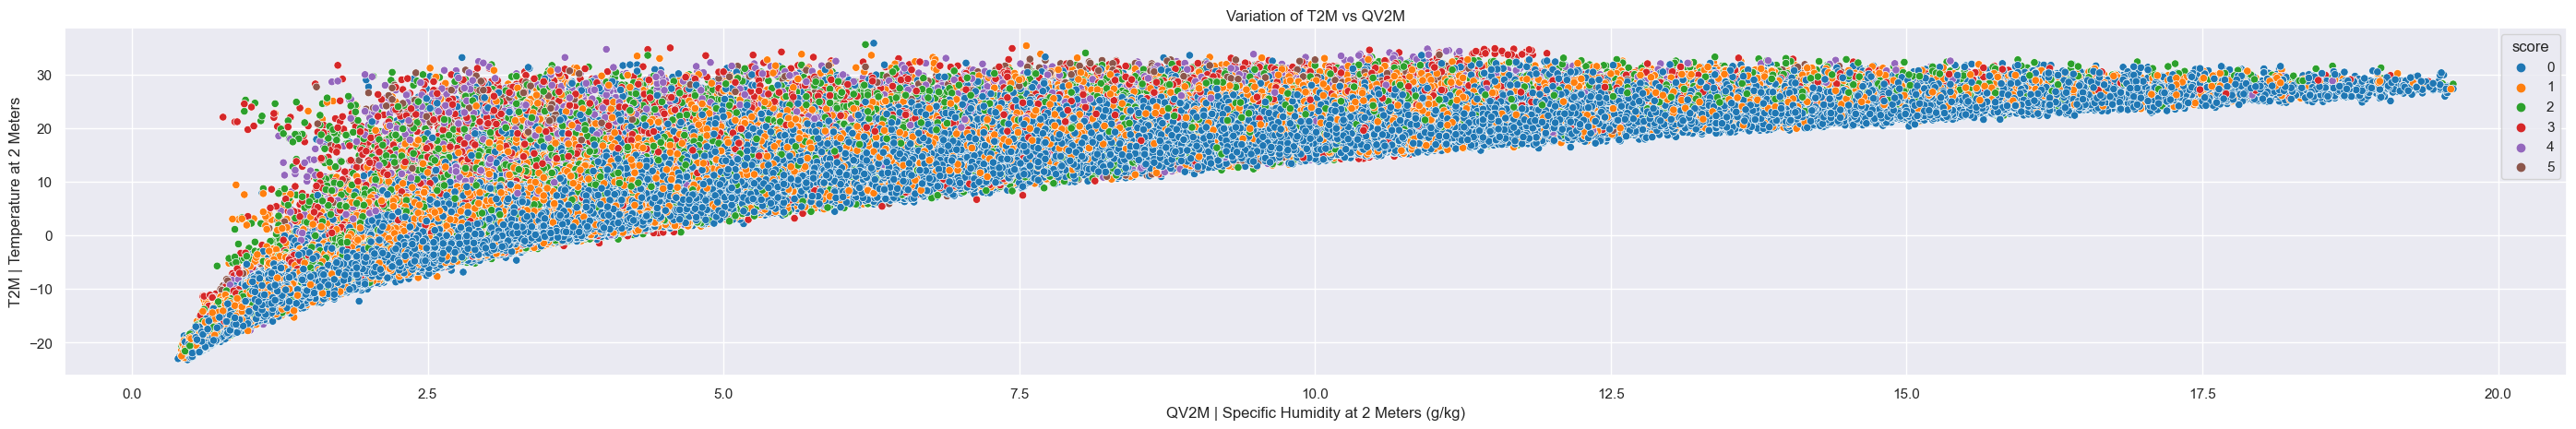

In [51]:
plt.figure(figsize=(35,5), dpi=100)
sns.scatterplot(data=df,x='QV2M',y='T2M',hue='score', palette='tab10', alpha=1)
plt.xlabel('QV2M | Specific Humidity at 2 Meters (g/kg)')
plt.ylabel('T2M | Temperature at 2 Meters')
plt.title('Variation of T2M vs QV2M')
plt.show()

<br> 

----------------------

<br>

<strong> 4. Analysis of Soil Data & Severity Of Droughts</strong>

In [52]:
data = [['SQ1', "Nutrient Availability",'Soil texture, soil organic carbon, soil pH, total exchangeable bases'],['SQ2','Nutrient Retention Capacity','Soil Organic carbon, Soil texture, base saturation, cation exchange capacity of soil and of clay fraction'],['SQ3','Rooting Conditions',' Soil textures, bulk density, coarse fragments, vertic soil properties and soil phases affecting root penetration and soil depth and soil volume'],['SQ4','Oxygen availability In Roots','Soil drainage and soil phases affecting soil drainage'],['SQ5','Excess Salts','Soil salinity, soil sodicity and soil phases influencing salt conditions'],['SQ6','Toxicity','Calcium carbonate and gypsum'],['SQ7','Workability','Soil texture, effective soil depth/volume, and soil phases constraining soil management (soil depth, rock outcrop, stoniness, gravel/concretions and hardpans)']]

#define header names
col_names = ["Indicator", "Description","Explanation" ]
  
#display table
print(tabulate(data, headers=col_names,tablefmt="fancy_grid"))



╒═════════════╤══════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Indicator   │ Description                  │ Explanation                                                                                                                                                    │
╞═════════════╪══════════════════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ SQ1         │ Nutrient Availability        │ Soil texture, soil organic carbon, soil pH, total exchangeable bases                                                                                           │
├─────────────┼──────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<p> Note that the classes used in the Soil Quality evaluation are:</p>

  <li> 1: No or slight limitations </li>

 <li>2: Moderate limitations </li>

 <li>3: Sever limitations</li>

 <li>4: Very severe limitations</li>

 <li> <s>5: Mainly non-soil</li>

 <li><s>6: Permafrost area</li>

 <li><s>7: Water bodies </li><br>

<p>Remember that classes are qualitative not quantitative. Only classes 1 to 4 are corresponding to an assessment of soil limitations for plant growth. Class 1 is generally rated between 80 and 100% of the growth potential, class 2 between 60 and 80%, class 3 between 40 and 60%, and class 4 less than 40% (FAO, n.d.). As such we will remove all values that are irrelevant to soil quality. For more indepth-explanation please visit:<a> https://www.fao.org/soils-portal/data-hub/soil-maps-and-databases/harmonized-world-soil-database-v12/en/ </a> </p>

In [28]:
# Removing all values irrelevant to our research 

df.drop(df.loc[df['SQ1']==0].index, inplace=True)
df.drop(df.loc[df['SQ1']==5].index, inplace=True)
df.drop(df.loc[df['SQ1']==6].index, inplace=True)
df.drop(df.loc[df['SQ1']==7].index, inplace=True)

df.drop(df.loc[df['SQ2']==0].index, inplace=True)
df.drop(df.loc[df['SQ2']==5].index, inplace=True)
df.drop(df.loc[df['SQ2']==6].index, inplace=True)
df.drop(df.loc[df['SQ2']==7].index, inplace=True)

df.drop(df.loc[df['SQ3']==0].index, inplace=True)
df.drop(df.loc[df['SQ3']==5].index, inplace=True)
df.drop(df.loc[df['SQ3']==6].index, inplace=True)
df.drop(df.loc[df['SQ3']==7].index, inplace=True)

df.drop(df.loc[df['SQ4']==0].index, inplace=True)
df.drop(df.loc[df['SQ4']==5].index, inplace=True)
df.drop(df.loc[df['SQ4']==6].index, inplace=True)
df.drop(df.loc[df['SQ4']==7].index, inplace=True)

df.drop(df.loc[df['SQ5']==0].index, inplace=True)
df.drop(df.loc[df['SQ5']==5].index, inplace=True)
df.drop(df.loc[df['SQ5']==6].index, inplace=True)
df.drop(df.loc[df['SQ5']==7].index, inplace=True)

df.drop(df.loc[df['SQ6']==0].index, inplace=True)
df.drop(df.loc[df['SQ6']==5].index, inplace=True)
df.drop(df.loc[df['SQ6']==6].index, inplace=True)
df.drop(df.loc[df['SQ6']==7].index, inplace=True)

df.drop(df.loc[df['SQ7']==0].index, inplace=True)
df.drop(df.loc[df['SQ7']==5].index, inplace=True)
df.drop(df.loc[df['SQ7']==6].index, inplace=True)
df.drop(df.loc[df['SQ7']==7].index, inplace=True)



In [32]:
def myfunc(x):
        if x == 1  :
            return "No or slight limitations"
        elif x == 2:
            return "Moderate limitations "
        elif x == 3:
            return "Severe limitations"
        else:
            return "Very severe limitations"


SQ=df.copy()
SQ=SQ.assign(SQ1_Level=lambda x:SQ['SQ1'].apply(myfunc))
SQ=SQ.assign(SQ2_Level=lambda x:SQ['SQ2'].apply(myfunc))
SQ=SQ.assign(SQ3_Level=lambda x:SQ['SQ3'].apply(myfunc))
SQ=SQ.assign(SQ4_Level=lambda x:SQ['SQ4'].apply(myfunc))
SQ=SQ.assign(SQ5_Level=lambda x:SQ['SQ5'].apply(myfunc))
SQ=SQ.assign(SQ6_Level=lambda x:SQ['SQ6'].apply(myfunc))
SQ=SQ.assign(SQ7_Level=lambda x:SQ['SQ7'].apply(myfunc))

In [33]:
Exceptional_Droughts = df[df['Severity']=='Exceptional Drought']
Extreme_Droughts = df[df['Severity']=='Extreme Drought']
Severe_Droughts = df[df['Severity']=='Severe Drought']
Abnormal_Droughts = df[df['Severity']=='Abnormally Dry']
No_Droughts = df[df['Severity']=='No Drought']

In [ ]:
yu = ['SQ1','SQ2','SQ3','SQ4','SQ5','SQ6','SQ7']


f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7)

Exceptional_Droughts['SQ1'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Nutrient Availability",ax= ax1)
Exceptional_Droughts['SQ2'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Nutrient Retention Capacity",ax= ax2)
Exceptional_Droughts['SQ3'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Rooting Conditions",ax= ax3)
Exceptional_Droughts['SQ4'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Oxygen Available To Roots",ax= ax4)
Exceptional_Droughts['SQ5'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Excess Salts",ax= ax5)
Exceptional_Droughts['SQ6'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Toxicity",ax= ax6)
Exceptional_Droughts['SQ7'].value_counts().sort_index().plot(kind='pie',title="Exceptional Droughts | Workability",ax= ax7)
plt.show()

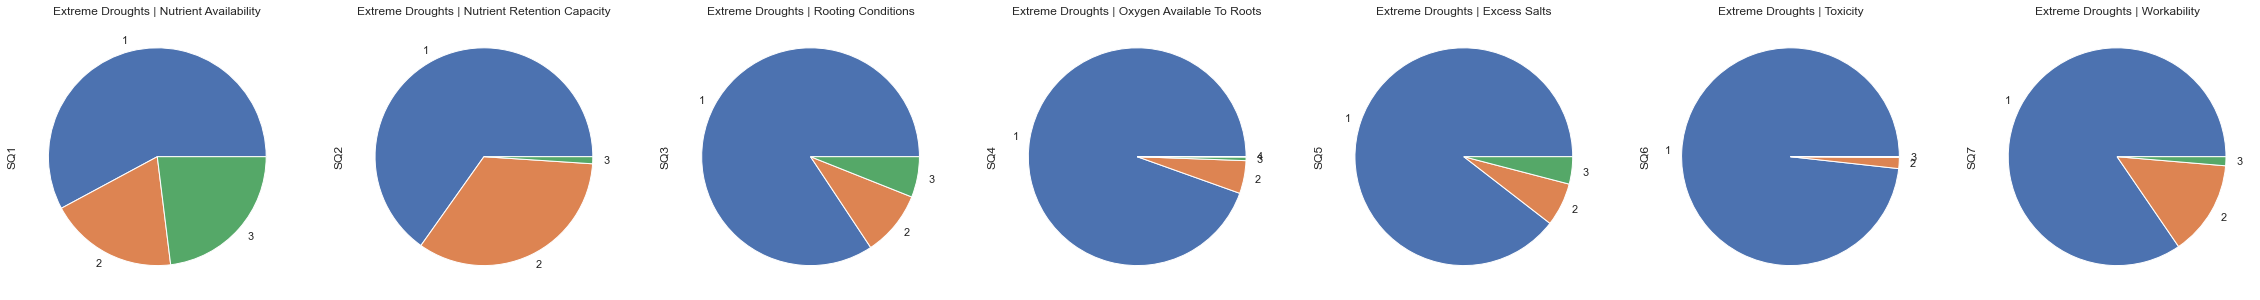

In [57]:
f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7)

Extreme_Droughts['SQ1'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Nutrient Availability",ax= ax1)
Extreme_Droughts['SQ2'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Nutrient Retention Capacity",ax= ax2)
Extreme_Droughts['SQ3'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Rooting Conditions",ax= ax3)
Extreme_Droughts['SQ4'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Oxygen Available To Roots",ax= ax4)
Extreme_Droughts['SQ5'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Excess Salts",ax= ax5)
Extreme_Droughts['SQ6'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Toxicity",ax= ax6)
Extreme_Droughts['SQ7'].value_counts().sort_index().plot(kind='pie',title="Extreme Droughts | Workability",ax= ax7)

plt.show()

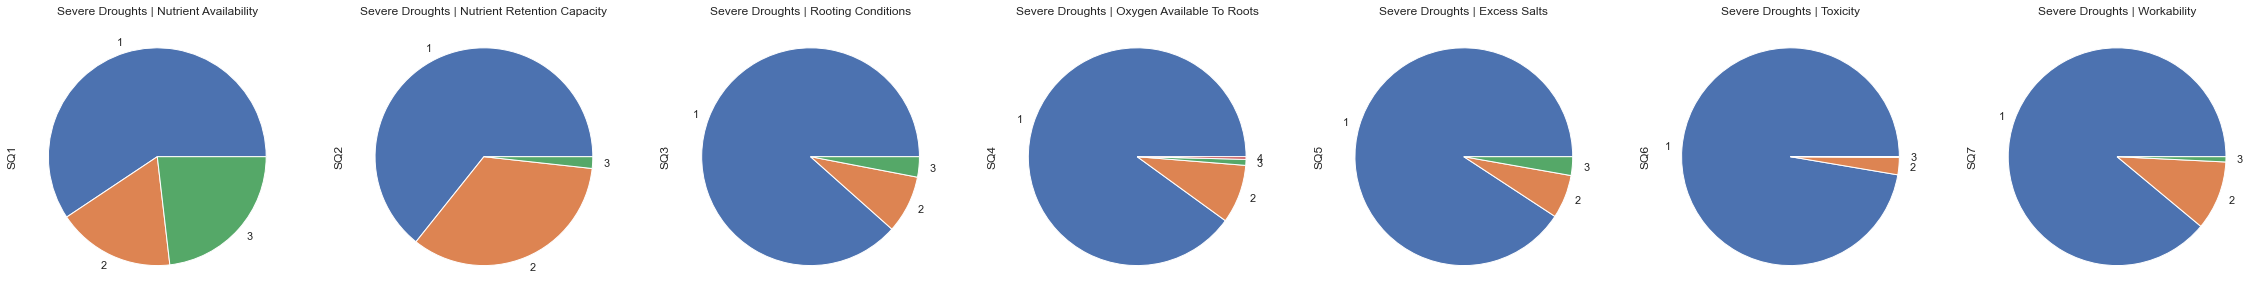

In [58]:
f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7)

Severe_Droughts['SQ1'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Nutrient Availability",ax= ax1)
Severe_Droughts['SQ2'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Nutrient Retention Capacity",ax= ax2)
Severe_Droughts['SQ3'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Rooting Conditions",ax= ax3)
Severe_Droughts['SQ4'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Oxygen Available To Roots",ax= ax4)
Severe_Droughts['SQ5'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Excess Salts",ax= ax5)
Severe_Droughts['SQ6'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Toxicity",ax= ax6)
Severe_Droughts['SQ7'].value_counts().sort_index().plot(kind='pie',title="Severe Droughts | Workability",ax= ax7)

plt.show()

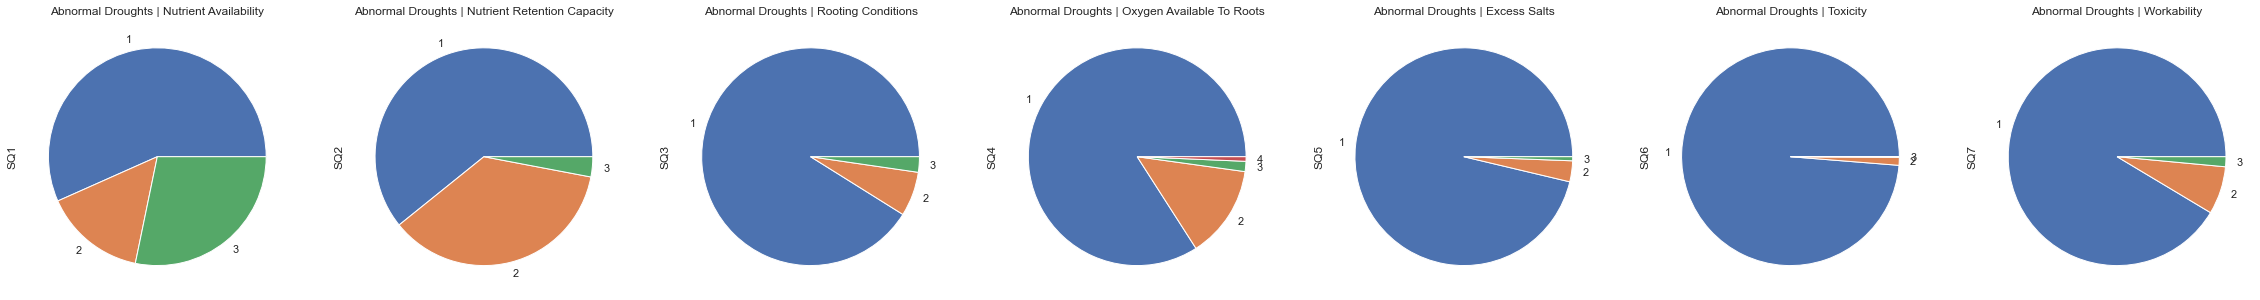

In [59]:
f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7)

Abnormal_Droughts['SQ1'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry | Nutrient Availability",ax= ax1)
Abnormal_Droughts['SQ2'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry  | Nutrient Retention Capacity",ax= ax2)
Abnormal_Droughts['SQ3'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry  | Rooting Conditions",ax= ax3)
Abnormal_Droughts['SQ4'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry  | Oxygen Available To Roots",ax= ax4)
Abnormal_Droughts['SQ5'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry  | Excess Salts",ax= ax5)
Abnormal_Droughts['SQ6'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry  | Toxicity",ax= ax6)
Abnormal_Droughts['SQ7'].value_counts().sort_index().plot(kind='pie',title="Abnormally Dry  | Workability",ax= ax7)

plt.show()

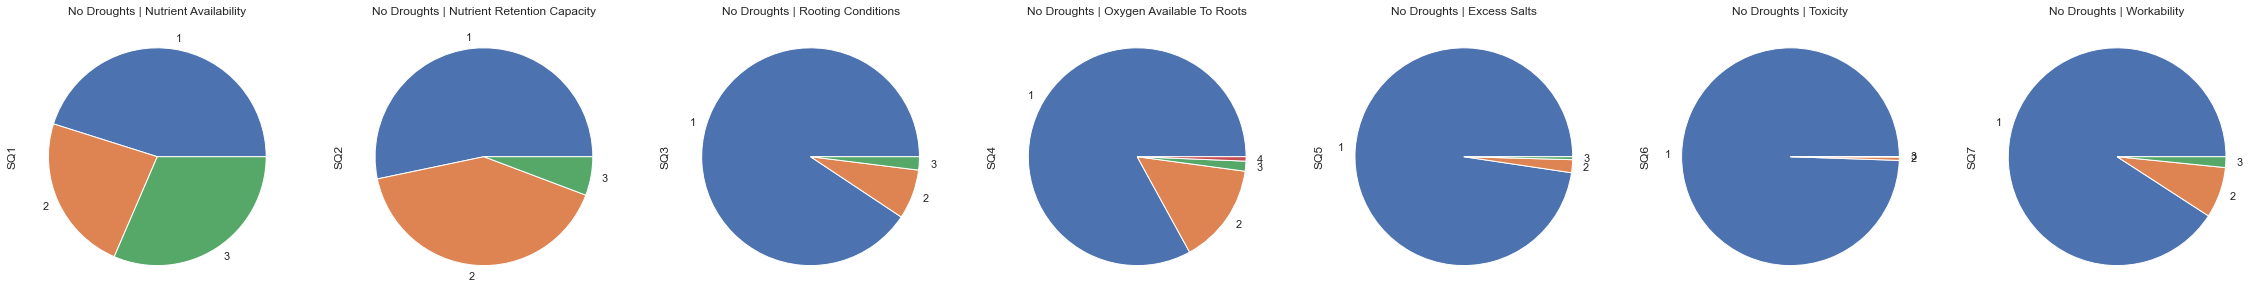

In [60]:
f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7)

No_Droughts['SQ1'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Nutrient Availability",ax= ax1)
No_Droughts['SQ2'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Nutrient Retention Capacity",ax= ax2)
No_Droughts['SQ3'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Rooting Conditions",ax= ax3)
No_Droughts['SQ4'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Oxygen Available To Roots",ax= ax4)
No_Droughts['SQ5'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Excess Salts",ax= ax5)
No_Droughts['SQ6'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Toxicity",ax= ax6)
No_Droughts['SQ7'].value_counts().sort_index().plot(kind='pie',title="No Droughts | Workability",ax= ax7)

plt.show()

<strong>Insights</strong>
<p>The pie charts above show the level of severity of droughts against soil quality. The data above shows constant results across all level of droughts. The only major change was in SQ1 where the limitation level count was higher than all other SQ index.  This means that soil quality did not change or differ during the seasons of drought. From the observations we can also infer that soil quality does not play much of a role in determining the severity of droughts.  </p>

In [61]:
SQ.year

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
262362    2014
262363    2014
262364    2014
262365    2014
262366    2014
Name: year, Length: 248656, dtype: int64

<br>

<strong> 4.5. Soil Quality With Regards To Severity Of Droughts  | Geological Locations </strong> 

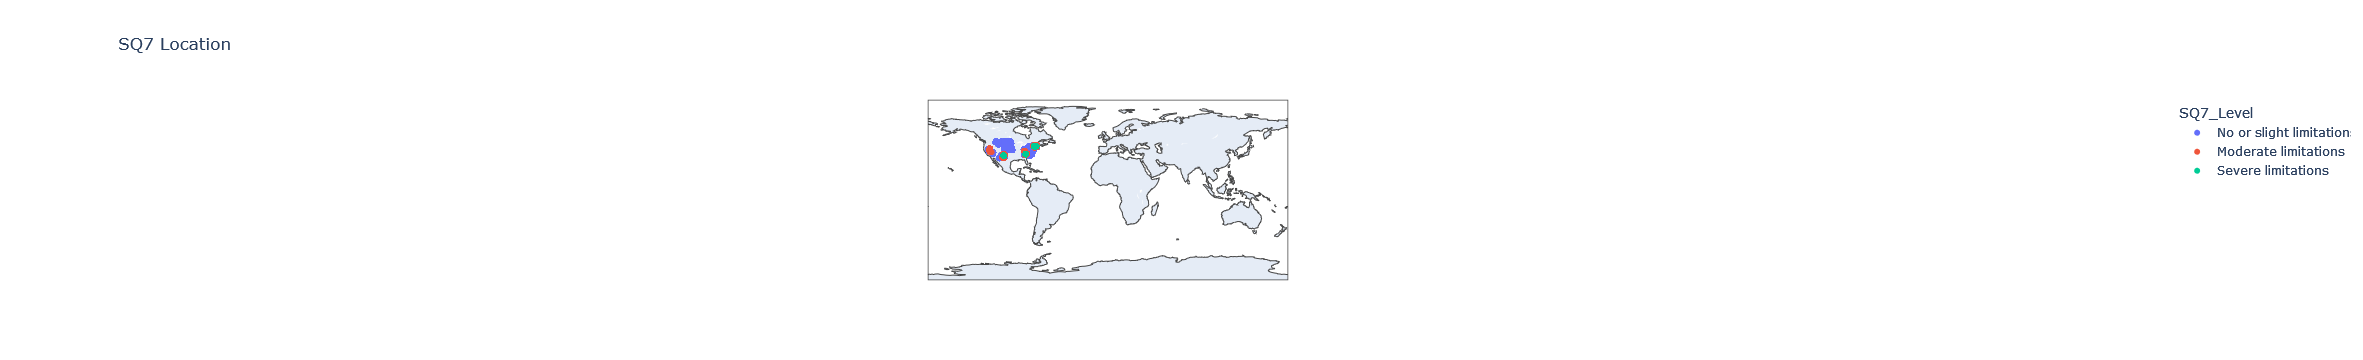

In [35]:
new_df_2012= SQ[SQ['year'] == 2012 ]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ7_Level',title="SQ7 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ6_Level',,title="SQ6 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012 ]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ5_Level',,title="SQ5 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012 ]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ4_Level',,title="SQ4 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012 ]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ3_Level',,title="SQ3 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012 ]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ2_Level',,title="SQ2 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012 ]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='SQ1_Level',,title="SQ1 Location")
fig.show()

In [ ]:
new_df_2012= SQ[SQ['year'] == 2012 ] # ALLOWS THE CHANING OF YEARS 
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='Severity',,title="Drought Severity Location")
fig.show()

<br>

<strong> Note </strong>
<p> Due to the large dataset and limitations in hardware I would only be able to view the results and data for 2012 at a limit of 20000 rows. This limitation would result in insights that may not be the most accurate as it introduces subjectivity.</p> <br>

<strong> Surprising Insights To Take With A Pinch Of Salt </strong>
<p> The graph above shows the severity of drought in relation to soil quality.The orignial hypothesis would be that severe limitations of soil quality in certain areas would cause the worst droughts. This hypothesis was proven false.  As it seems, soil quality plays little part in the severity of droughts. When observing the for areas which are hit with exceptional droughts, we can see that the soil quality for most areas where exceptional droughts are seen are usually not severely limited or very severely limited. </p>

<br>

<strong> 5. Geographic Location of Droughts </strong> 

<p> To find the areas with the worst drought </p>

In [ ]:
# Very compute Intensive, will crash Kernel if we view all years. We are segmenting the years into individual years. If chosen to run the below and the notebook crashes please do a nbstripout command in anaconda prompt. Without doing it might cause a 'Ghost' task which will keep causing crashes if you do not have enough ram 
# 16 Gb is not enough 

# fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='Severity')
# fig.show()


#segmentation 
new_df_2012= df[df['year'] == 2012]
fig = px.scatter_geo(new_df_2012,lat='lat',lon='lon',color='Severity')
fig.show()

<strong> Insights </p> The areas with exceptional droughts could be found near the central of the United States. It extends all the way to the south coast and east coast of America. The areas where there are not droughts could be seen along the north east coast and west coast of america </p>

<br>

------------------------------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Correlation Analysis Between Quantitative Numeric Variables</h3> <br>

<h3> Pearson's Correlation </h3>

In [ ]:
correlation_plot = df[Numeric_columns].corr()
correlation_plot.style.background_gradient(cmap = 'bwr')

<strong> Analysis of High Collinearity </strong>
<p>Using the Pearsons Correlation the graph above shows the strength of the relationship between the different variables. As observed the correlation results above show high correlation between multiple variables. The highest correlation that is not 1 is seen to be 0.999978 between T2MWET and T2MDEW. As a general guideline correlation that are above 0.95 or 0.90 might pose problems in our modeling later on. As such, we might consdier removing certain variables that are highly correlated. such as the Maximum of certain variables to keep multicollinearity and redunduncy if any,low. Apart from the high collinearity, we can deduce from the correlations that variables such as the TS or Earth Skin Temperature has a strong correlation between the other T2 variables. This could be an indication that the T2 variables are highly related and could mean that they are highly dependent on one another.  </p>


<h3> Spearman Correlation </h3>

In [66]:
correlation_plot = df[['SQ1','SQ2','SQ3','SQ5','SQ5','SQ6','SQ7','score']].corr()
correlation_plot

SQ1       SQ2       SQ3       SQ5       SQ5       SQ6       SQ7  \
SQ1    1.000000  0.868027  0.083964 -0.161149 -0.161149 -0.092997  0.104340   
SQ2    0.868027  1.000000  0.076732 -0.158403 -0.158403 -0.083547  0.115063   
SQ3    0.083964  0.076732  1.000000  0.077893  0.077893  0.149110  0.959963   
SQ5   -0.161149 -0.158403  0.077893  1.000000  1.000000 -0.019823  0.093616   
SQ5   -0.161149 -0.158403  0.077893  1.000000  1.000000 -0.019823  0.093616   
SQ6   -0.092997 -0.083547  0.149110 -0.019823 -0.019823  1.000000  0.169399   
SQ7    0.104340  0.115063  0.959963  0.093616  0.093616  0.169399  1.000000   
score -0.082755 -0.092052  0.052036  0.122191  0.122191  0.061032  0.024932   

          score  
SQ1   -0.082755  
SQ2   -0.092052  
SQ3    0.052036  
SQ5    0.122191  
SQ5    0.122191  
SQ6    0.061032  
SQ7    0.024932  
score  1.000000

<p> The graph above shows the correlation of all variables in the dataset. Using Spearman's Correlation we can observe that all varaibles have a low correlation with score. </p>

<br>

----------------------------


<br>

<p style="font-family: Arial Black;">Drought Analysis</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Chi-Square</h3> <br>

<strong>Chi-Square-Test</strong>

<p>Pearson's chi-squared test is used to determine whether there is a  significant difference between the expected and observed frequencies in one or more categories. ( Hayes,2022 ). Pearson's Chi-Square test allows us to test the significance of a variable against the target variable. Thus, while Pearson's correlation and Spearman's rank correlation measure the strength between two variables, the chi-square test measures the significance of association between the two variables. Essentially it tells us whether the relationship we found is likely to exist in the population. ( Juhi Ramzai, 2020 ). In our case, we would test categorical variables in our dataset toward the score variable. If the Null hypothesis cannot be rejected, the variable will be dropped.   </p>
<br>
<strong>Why are we using Chi-Square ? and how we are going to use it ?</strong>
<p>
<p> Whilst correlation analysis is typically used. It is mostly and only used to measure the association between quantitative variables. Our rating column, however, is ordinal categorical variables. Thus, to compare these ordinal variables, the data could be summarised into a contingency table which lists the options for one variable as the columns and one as the rows. This is called a crosstab or contingency table, where two variables could be tabulated simultaneously.<p>
 <br>   
<strong> Formulate The Hypothesis </strong>
<li><i>Null Hypothesis</i>  
    <p> H0: There is no significant association between the variables and score  </p> </li>
<li><i>Alternate Hypothesis</i>   
    <p> Ha: There is a significant association between the variables and their score </p></li>


 <br>
<strong> Decision Rule </strong>
<p> <li> 1. For 1 Degree of freedom reject if x^2 > 3.84 or p lesser than 0.05 </li><li> 2. For 2 Degree of freedom reject if x^2 > 5.99 or p less than 0.05 </li></p> <br>

<strong> When can you reject and when can you not reject the Null Hypothesis ?</strong>
<p>1. If Chi Squared value is less than or equal to the value for 0.05 probability, we cannot reject the null hypothesis</p>
<p>2. If Chi Squared value more than the value for 0.05 probability, we can reject the null hypothesis </p>

<br>

In [67]:
features = ['SQ1', 'SQ2', 'SQ3', 'SQ5', 'SQ6', 'SQ7'] # Gives the values to plot a chi2 graph 
features_SQ4=['SQ4']

for i in features:
    X=pd.crosstab(index=df[i],columns=df['score'])
    (chi2,p,dof,_) = stats.chi2_contingency([X.iloc[0].values,X.iloc[1].values,X.iloc[2].values]) #reject
    print(i)
    print("chi :",chi2)       # Print out the exact chi2 value of each attribute
    print("p-value :",p)
    print("dof :",dof)
    print('-----------------')# degrees of freedom
    
    
    
for i in features_SQ4:
    X=pd.crosstab(index=df[i],columns=df['score'])
    (chi2,p,dof,_) = stats.chi2_contingency([X.iloc[0].values,X.iloc[1].values,X.iloc[2].values,X.iloc[3].values]) #reject
    print(i)
    print("chi :",chi2)       # Print out the exact chi2 value of each attribute
    print("p-value :",p)
    print("dof :",dof)
    print('-----------------')# degrees of freedom   

SQ1
chi : 4333.970126586941
p-value : 0.0
dof : 10
-----------------
SQ2
chi : 3428.4814402812685
p-value : 0.0
dof : 10
-----------------
SQ3
chi : 1063.1932322926934
p-value : 4.528085180005649e-222
dof : 10
-----------------
SQ5
chi : 4729.854704532847
p-value : 0.0
dof : 10
-----------------
SQ6
chi : 1173.166860542561
p-value : 8.833392764821082e-246
dof : 10
-----------------
SQ7
chi : 942.4321738389492
p-value : 4.675383672903617e-196
dof : 10
-----------------
SQ4
chi : 2121.288010653365
p-value : 0.0
dof : 15
-----------------


<strong> Conclusion </strong> 
<p> Reject the Null Hypothesis for all variables as x^2 > 5.84 or x^2 > 3.84 and p lesser than 0.05. There is enough evidence to suggest that all variables has a statistically signficant impact on score. This is concluded by analysing the P-values and the chi-square values. </p>

 <br>

-----------------------------------

<br>

<p style="font-family: Arial Black;">Drought Analysis</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">VIF</h3> <br>

<strong> What is the VIF & Why do we perform it? </strong>
<p> Variance inflation factor (VIF) is a measure of the severity of multicollinearity in a set of multiple regression variables (OLS). VIF provides an index that measure how much the variance of an regression coefficient is increased because of collinearity. A high VIF Value indicate that the indepenedent attribute is highly collinear with other attributes in the model  (Potters, 2021). In other words, we are no longer looking at bivariate relationship but multivariate instead which allows us to create a auxillary regression for each X variable. We will then regress the selected variable for say X1 on the other varibles in the dataset, it effectively figures out how X1 is being explained by the other variables . The equation below describes how VIF works </p><br>
 <div style="text-align:center;"><div> Y = β0 + β1 X1 + β2 X 2 + ... + βk Xk + ε </div> </div><br>
  <div style="text-align:center;"><div> Create Auxillary Regressions for each X variable</div> </div><br>
 <div style="text-align:center;"><div> X1 = β0 + β1 X 2 + ... + βk Xk + ε </div> </div><br>
  <div style="text-align:center;"><div> We would then find the VIFs using the R-squared from each regression...</div> </div><br>
<br>
       

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]#no of rows
    return (vif)

In [69]:
features = df[Numeric_columns]
calculate_vif(features)

features     VIF_Value
0       PRECTOT  1.668717e+00
1            PS  4.446318e+01
2          QV2M  6.027181e+01
3           T2M  1.473026e+03
4        T2MDEW  1.814037e+04
5        T2MWET  1.905304e+04
6       T2M_MAX  1.733272e+07
7       T2M_MIN  5.441374e+06
8     T2M_RANGE  6.353680e+06
9            TS  5.762305e+02
10        WS10M  2.644923e+02
11    WS10M_MAX  1.360974e+06
12    WS10M_MIN  1.894581e+05
13  WS10M_RANGE  6.217301e+05
14        WS50M  3.139854e+02
15    WS50M_MAX  2.802752e+06
16    WS50M_MIN  5.100964e+05
17  WS50M_RANGE  1.166001e+06

<p> Usually VIF of 10 and above are considered to be highly colinear and strategies should be implemeneted to deal with it. As we can see the VIF is exceptionally high for each and every variable. However since all variables have high VIF values , we cannot remove them all or combine them. As such, we will rely on more robust algorithms such as the RFECV  to find out which variable to keep and which to discard (RandomForest will be done later). But first we are going to standardise the data from this point onwards. </p> 

<br>

---------------------------------------------------------

<br>

<p style="font-family: Arial Black;">Drought Analysis</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">📐 Scaling, One-Hot Encoding & Standardising data</h3><br>
<br>
<strong> Standard Scaler </strong>
<p> The standard scaler assumes features have a normal distribution and will scale them to have a mean 0 and standard deviation of 1. Unlike Min-Max or Max-Abs scalers, the Standard scaler doesn’t have a predetermined range to scale to. (Jackson,2019). Since our dataset has mostly normal to slightly skewed distributions standard scaler would be used as it works well with data that is normally distributed. Standard Scaler is also a popular option to use, thus it is chosen. Additionally, deep learning algorithms usually go for zero mean and unit variance. Regression type algorithms is a key example where it benefits from normally distributed data. (Hale, 2019). Moreover it also helps with Feature Selection alter on. Our data is also normally distributed</p><br>

<strong> Perks of Standard Scaler </strong>
<p>
    <li>1. Shifts distribution’s mean to 0 & unit variance </li>
    <li>2. No predetermined range</li>
<li>3. Best to use on data that is approximately normally distributed<li> </p> <br>

In [70]:
df=df.drop('Severity',axis=1) # Because it categorial , and we do not need it as it already is represented by score

In [30]:
def scaling(data):
    # Scaling all quantitative columns using Standard Scaler . Does not make sense to scale a categorial variables. 
    for num_column in Numeric_columns:
        scaler = StandardScaler() # initialising Standard Scaler 
        data[num_column] = scaler.fit_transform(data[[num_column]])
    return data

In [31]:

Best_analysis = df.copy()
Best_analysis=Best_analysis.drop('fips',axis=1) 
Best_analysis = scaling(Best_analysis)# for the last part of performance analysis

processed_data = scaling(df)
processed_data=processed_data[0:20000]
processed_data=processed_data.drop('fips',axis=1)
processed_data.isna().sum()# Scaling the data with standard scaler 



PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
year           0
month          0
day            0
lat            0
lon            0
SQ1            0
SQ2            0
SQ3            0
SQ4            0
SQ5            0
SQ6            0
SQ7            0
dtype: int64

<br>

<strong> One-Hot Encoding </strong>

One Hot Encoding is a process whereby categorial variables are converted into a form that could be provided to machine learning algorithm for easier interpretation (by the model). Since our dataset contains categorial variables (SoilQuality) we can create features for each SQ column. After the application of One Hot Encoding, we now stand at XXXXXX columns. Applying One Hot Encoding would not affect our curse of dimensionality as our dataset has over 2 million rows of usable data if we were to use the original dataset. One Hot Encoding is beneficial as it improves predictions and classification accuracy of a model. (Dey, 2021). However since we do not have the computation prowess the curse of dimensionality would have some effect on the overall modeling later 

In [32]:
processed_data = pd.get_dummies(processed_data,columns=['SQ1', 'SQ2', 'SQ3', 'SQ5', 'SQ6', 'SQ7','SQ4'])

In [33]:
Best_analysis = pd.get_dummies(Best_analysis,columns=['SQ1', 'SQ2', 'SQ3','SQ4', 'SQ5', 'SQ6', 'SQ7'])

In [34]:
processed_data.shape, Best_analysis.shape # run only data cleaning and outlier handling along with scaling if Best Analysis is not 60 columns

((20000, 36), (248656, 46))

<br>

-------------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Feature Selection</h3> <br>

<strong> What is RFECV ? </strong>
<p> Recursive Feature Elimination with Cross Validation RFECV is a feature selection technique that selects the best subset of features using recrusive elimination. The best subset is selected based on the cross-validation score of the model. For this dataset we are going to use RandomForestClassifier a to further validate our best features. </p>
<br>
<strong> How is it applicable and why are we using it? </strong>
<p>
<p>RFECV is a more robust technique of knowing which features are important towards score . By knowing which features are of more significance, we are better able to know which features affect the accuracy of the model, thus giving us the ability to correct our techniques for handling the values within the columns that are important. Such use cases invloves in improving the accuracy of the model where it is an iterative process. By knowing which features are significant we are also better able to understand which are the key areas to focus on improving. Such examples could involve identifying which are the services that contribute most to score etc.</p>

<br>

In [34]:
from sklearn.ensemble import RandomForestClassifier as rf
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

In [35]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

<br>

<br>

<p style="color:#469A97; font-family: Arial Black; font-size:15px; margin:5px; padding:0px">RandomForestClassifie, LGBM & XGBoost With Cross Validation</p>

<strong> Random Forest </strong>

In [36]:
prediction_al = processed_data.copy()
modified=processed_data.copy()
modified.drop('score', axis=1,inplace=True)
X = modified.iloc[:, :-1]
 

Y = modified.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    modified.iloc[:, :-1], modified.iloc[:, -1],
    train_size = 0.80)

 
X, y = X_train, y_train

In [29]:
classf = rf()
rfe_mod = RFECV(classf,cv=2,n_jobs=4) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_ 


selected = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':myvalues.ranking_})
selected.sort_values(by="Ranking")

Feature  Ranking
22          lon        1
32        SQ4_1        2
21          lat        3
33        SQ4_2        4
1            PS        5
5        T2MWET        6
18         year        7
4        T2MDEW        8
2          QV2M        9
8     T2M_RANGE       10
6       T2M_MAX       11
11    WS10M_MAX       12
10        WS10M       13
13  WS10M_RANGE       14
15    WS50M_MAX       15
17  WS50M_RANGE       16
3           T2M       17
16    WS50M_MIN       18
14        WS50M       19
7       T2M_MIN       20
12    WS10M_MIN       21
9            TS       22
0       PRECTOT       23
25        SQ2_1       24
23        SQ1_1       25
26        SQ2_2       26
19        month       27
20          day       28
24        SQ1_2       29
29        SQ5_2       30
28        SQ5_1       31
30        SQ6_1       32
27        SQ3_1       33
31        SQ7_1       34

<br>

<strong> XGBoost </strong>

In [33]:
classf = XGBClassifier()

rfe_mod = RFECV(classf,cv=2,n_jobs=4) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_ 

selected = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':myvalues.ranking_})
selected.sort_values(by="Ranking")

[10:40:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Feature  Ranking
21          lat        1
32        SQ4_1        1
1            PS        2
4        T2MDEW        3
11    WS10M_MAX        4
8     T2M_RANGE        5
18         year        6
0       PRECTOT        7
13  WS10M_RANGE        8
12    WS10M_MIN        9
9            TS       10
31        SQ7_1       11
7       T2M_MIN       12
6       T2M_MAX       13
5        T2MWET       14
3           T2M       15
2          QV2M       16
19        month       17
20          day       18
25        SQ2_1       19
23        SQ1_1       20
22          lon       21
29        SQ5_2       22
30        SQ6_1       23
26        SQ2_2       24
28        SQ5_1       25
24        SQ1_2       26
27        SQ3_1       27
10        WS10M       28
14        WS50M       29
33        SQ4_2       30
15    WS50M_MAX       31
17  WS50M_RANGE       32
16    WS50M_MIN       33

<br>

<strong> LGBM </strong>


In [58]:
classf = lgb.LGBMClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8,random_state=7)
rfe_mod = RFECV(classf,cv=2) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_ 

selected = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':myvalues.ranking_})
selected.sort_values(by="Ranking")

Feature  Ranking
0       PRECTOT        1
32        SQ4_1        1
4        T2MDEW        1
21          lat        1
2          QV2M        1
1            PS        1
3           T2M        1
7       T2M_MIN        2
13  WS10M_RANGE        3
10        WS10M        4
8     T2M_RANGE        5
6       T2M_MAX        6
5        T2MWET        7
17  WS50M_RANGE        8
18         year        9
11    WS10M_MAX       10
14        WS50M       11
22          lon       12
15    WS50M_MAX       13
9            TS       14
16    WS50M_MIN       15
31        SQ7_1       16
19        month       17
20          day       18
23        SQ1_1       19
24        SQ1_2       20
25        SQ2_1       21
12    WS10M_MIN       22
26        SQ2_2       23
27        SQ3_1       24
28        SQ5_1       25
29        SQ5_2       26
30        SQ6_1       27
33        SQ4_2       28

<br>

<strong> KNN </strong>


In [ ]:
# KNN does not provide logic to do feature selection

<br>

<strong> Findings </strong>
<p> Interestingly, <i> latitude </i> & <i> longtitude </i> along with <i> SQ4_1 </i> played a consistently important role in feature importance comapared to other variables. Out of the 3 models SQ4_1 and lat constantly are in the top 5 of feature importance. Now we know the importance of each variable after scanning through each model we can observe that the rankings of all variable in each model are mostly different. For example, XGB showed that the <i> Windspeeds e.g.(WS10M) </i> were the least of importance while LGBM showed that the <i> Soil Quality e.g. SQ4_2</i>  was not important. With regards to these findings all features will be kept as it seems all play a role in each model. <p>

<br>

In [38]:
y = prediction_al["score"].to_numpy() # Splitting and Shuffling the dataset
del prediction_al['score']
X = prediction_al.to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8,random_state=7)

In [18]:
X_train.shape,X_test.shape

((16000, 35), (4000, 35))

In [39]:
y = Best_analysis["score"].to_numpy() # Splitting and Shuffling the dataset
del Best_analysis['score']
X = Best_analysis.to_numpy()
X_train_BA,X_test_BA,y_train_BA,y_test_BA = train_test_split(X,y, train_size=0.8,random_state=7)

In [20]:
X_train_BA.shape,X_test_BA.shape

((198924, 30), (49732, 30))

---------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px"> Upsampling & DownSampling With SMOTE & NCR</h3> <br>

<strong> Imbalance Data  </strong> 
<p> Our dataset consist of imbalance data with regards to score. As observed above in EDA we can conclude that data for No Drought out numbers all other types of droughts. The challenge of working with imbalanced datasets is that most machine learning techniues will "ignore", the minority classes , resulting in lower accuracy in our predictions. (Brownlee,2020)</p>

<br><strong>🚶 Approach </strong>  
<p>
    <p>
As such SMOTE has been chosen to oversmaple the minority classes. SMOTE oversamples by selecting examples that are close in the feature space. Specifically, a random example from the minority class would be first chosen. SMOTE will then use the K Nearest Neighbors to randomly selected a neighbor. A neighbor is then chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. (Brownlee,2020) </p> 


    

<br>

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import GridSearchCV

<br>

<p> Upsampling </p> 

In [41]:
sm = SMOTE(random_state = 42)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train) 
X_train_ures_SMOTE_BA, y_train_ures_SMOTE_BA = sm.fit_resample(X_train_BA, y_train_BA) # for the last section Best Analysis 
# Personal note: we do not need to SMOTE the test split data as it is a testing data. In essence, test data remain static through out the modeling until 
# the testing phase

In [42]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5))) 
print()
print("--------------------------------------------------------------------------------------------------------------------------")
print()
print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE_BA == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE_BA == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE_BA == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE_BA == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE_BA == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE_BA == 5))) 

Before OverSampling, the shape of train_X: (16000, 35)
Before OverSampling, the shape of train_y: (16000,) 

After OverSampling, the shape of train_X: (42588, 35)
After OverSampling, the shape of train_y: (42588,) 

Counts of label '0' - Before Oversampling:7098, After OverSampling: 7098
Counts of label '1' - Before Oversampling:3155, After OverSampling: 7098
Counts of label '2' - Before Oversampling:2212, After OverSampling: 7098
Counts of label '3' - Before Oversampling:1804, After OverSampling: 7098
Counts of label '4' - Before Oversampling:1395, After OverSampling: 7098
Counts of label '5' - Before Oversampling:336, After OverSampling: 7098

--------------------------------------------------------------------------------------------------------------------------

Counts of label '0' - Before Oversampling:7098, After OverSampling: 112440
Counts of label '1' - Before Oversampling:3155, After OverSampling: 112440
Counts of label '2' - Before Oversampling:2212, After OverSampling: 1124

<br>

<p>Downsampling</p>

In [65]:
undersample = NeighbourhoodCleaningRule(threshold_cleaning=0.5)
X_train_NCR, y_train_NCR = undersample.fit_resample(X_train, y_train)

In [66]:
print('Before Undersampling, the shape of train_X: {}'.format(X_train.shape))
print('Before Undersampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After Undersampling, the shape of train_X: {}'.format(X_train_NCR.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_NCR.shape))

print("Counts of label '0' - Before Undersampling:{}, After Undersampling: {}".format(sum(y_train == 0),sum(y_train_NCR == 0)))
print("Counts of label '1' - Before Undersampling:{}, After Undersampling: {}".format(sum(y_train == 1),sum(y_train_NCR == 1)))
print("Counts of label '2' - Before Undersampling:{}, After Undersampling: {}".format(sum(y_train == 2),sum(y_train_NCR == 2)))
print("Counts of label '3' - Before Undersampling:{}, After Undersampling: {}".format(sum(y_train == 3),sum(y_train_NCR == 3)))
print("Counts of label '4' - Before Undersampling:{}, After Undersampling: {}".format(sum(y_train == 4),sum(y_train_NCR == 4)))
print("Counts of label '5' - Before Undersampling:{}, After Undersampling: {}".format(sum(y_train == 5),sum(y_train_NCR == 5)))

Before Undersampling, the shape of train_X: (16000, 35)
Before Undersampling, the shape of train_y: (16000,) 

After Undersampling, the shape of train_X: (10492, 35)
After Undersampling, the shape of train_y: (10492,) 

Counts of label '0' - Before Undersampling:7098, After Undersampling: 6247
Counts of label '1' - Before Undersampling:3155, After Undersampling: 1508
Counts of label '2' - Before Undersampling:2212, After Undersampling: 836
Counts of label '3' - Before Undersampling:1804, After Undersampling: 730
Counts of label '4' - Before Undersampling:1395, After Undersampling: 835
Counts of label '5' - Before Undersampling:336, After Undersampling: 336


<br>

-----------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px"> Model Development</h3> <br>

<strong>Decision tree & Ensemble learning methods </strong>
<p>Decision Tree Algorithms would be mainly used for this dataset Decision Trees are supervised learning methods used for classification and regression. Other complimentary algorithms such as KNN (Supervised) and Ensemble Learning Methods are chosen to ensure better representation. Our main goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the given data. Decision trees and KNN consist of a few hyperparameters. The models will first use the default settings for the hyperparameters.
</p> <br>

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error

<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">Extreme Gradient Boosting</p>

In [21]:
# Using XGB (Extreme Gradient Boosting)
xgb = XGBClassifier() #n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions
xgb.fit(X_train,y_train)
y_pred_XGB = xgb.predict(X_test)

[18:00:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
print('Performance of XGB Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))
print('Accuracy:',accuracy_score(y_test, y_pred_XGB))
print('Precision:',precision_score(y_test, y_pred_XGB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_XGB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_XGB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_XGB))

Performance of XGB Algorithm without resampling:

[[1651   87    9    2    0    0]
 [ 271  415   56   25    3    0]
 [  59  139  331   68    4    0]
 [  17   26   65  267   43    0]
 [   1    7   10   36  309    3]
 [   0    0    2    0   15   79]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1749
           1       0.62      0.54      0.57       770
           2       0.70      0.55      0.62       601
           3       0.67      0.64      0.65       418
           4       0.83      0.84      0.84       366
           5       0.96      0.82      0.89        96

    accuracy                           0.76      4000
   macro avg       0.77      0.72      0.74      4000
weighted avg       0.75      0.76      0.75      4000

Accuracy: 0.763
Precision: 0.7536249391228149
Recall: 0.763
F1 Score: 0.754582619327916
Cohen Kappa Score: 0.6670581426058811


<br>

In [32]:
mse= mean_squared_error(y_test,xgb.predict(X_test))
mse

0.4025

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">RandomForestClassifier</p>

In [33]:
RF_classifier = rf()
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [34]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling:

[[1650   72   14   10    3    0]
 [ 360  335   56   17    2    0]
 [ 140  122  264   63   12    0]
 [  69   29   75  201   44    0]
 [  37   11   13   50  252    3]
 [  17    2    1    1   13   62]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1749
           1       0.59      0.44      0.50       770
           2       0.62      0.44      0.52       601
           3       0.59      0.48      0.53       418
           4       0.77      0.69      0.73       366
           5       0.95      0.65      0.77        96

    accuracy                           0.69      4000
   macro avg       0.71      0.61      0.64      4000
weighted avg       0.68      0.69      0.67      4000

Accuracy: 0.691
Precision: 0.6791553250759741
Recall: 0.691
F1 Score: 0.672810052558807
Cohen Kappa Score: 0.5530693127663256


In [35]:
mse= mean_squared_error(y_test,RF_classifier.predict(X_test))
mse

0.924

<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">CatBoostClassifier</p>

In [37]:
CatBoost = CatBoostClassifier(logging_level='Silent')
CatBoost.fit(X_train, y_train)
y_pred_CB = CatBoost.predict(X_test)

In [38]:
print('Performance of Catboost Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_CB))
print(classification_report(y_test, y_pred_CB))
print('Accuracy:',accuracy_score(y_test, y_pred_CB))
print('Precision:',precision_score(y_test, y_pred_CB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_CB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_CB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_CB))

Performance of Catboost Algorithm without resampling:

[[1626  108   15    0    0    0]
 [ 277  403   77   11    2    0]
 [  83  123  335   51    9    0]
 [  18   29   83  237   48    3]
 [   1    6    8   44  300    7]
 [   0    0    1    1   15   79]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1749
           1       0.60      0.52      0.56       770
           2       0.65      0.56      0.60       601
           3       0.69      0.57      0.62       418
           4       0.80      0.82      0.81       366
           5       0.89      0.82      0.85        96

    accuracy                           0.74      4000
   macro avg       0.74      0.70      0.72      4000
weighted avg       0.73      0.74      0.74      4000

Accuracy: 0.745
Precision: 0.734235053761237
Recall: 0.745
F1 Score: 0.736172692562059
Cohen Kappa Score: 0.6413812937802683


In [39]:
mse= mean_squared_error(y_test,CatBoost.predict(X_test))
mse

0.432

<br>


<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">KNN</p>

In [41]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [42]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[1553  143   30   15    5    3]
 [ 304  346   91   20    7    2]
 [ 144  160  203   81   12    1]
 [  55   55   91  168   47    2]
 [  30   19   34   57  215   11]
 [   7    4    6    5   21   53]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1749
           1       0.48      0.45      0.46       770
           2       0.45      0.34      0.38       601
           3       0.49      0.40      0.44       418
           4       0.70      0.59      0.64       366
           5       0.74      0.55      0.63        96

    accuracy                           0.63      4000
   macro avg       0.60      0.54      0.56      4000
weighted avg       0.62      0.63      0.62      4000

Accuracy: 0.6345
Precision: 0.6155754486273362
Recall: 0.6345
F1 Score: 0.619801666556243
Cohen Kappa Score: 0.47981693256370905


In [43]:
mse= mean_squared_error(y_test,knn_classifier.predict(X_test))
mse

1.01175

<br>


<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">LightGBM</p>

In [44]:
GBM= lgb.LGBMClassifier() # As recommended in LGBM Documentation
GBM.fit(X_train, y_train)
y_pred_GBM = GBM.predict(X_test)

In [45]:
print('Performance of LGBM Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_GBM))
print(classification_report(y_test, y_pred_GBM))
print('Accuracy:',accuracy_score(y_test, y_pred_GBM))
print('Precision:',precision_score(y_test, y_pred_GBM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_GBM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_GBM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_GBM))

Performance of LGBM Algorithm without resampling:

[[1668   71    9    1    0    0]
 [ 290  408   57   13    2    0]
 [  60  139  326   65   10    1]
 [   6   28   60  287   36    1]
 [   0    3    3   25  333    2]
 [   0    0    0    1   15   80]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1749
           1       0.63      0.53      0.58       770
           2       0.72      0.54      0.62       601
           3       0.73      0.69      0.71       418
           4       0.84      0.91      0.87       366
           5       0.95      0.83      0.89        96

    accuracy                           0.78      4000
   macro avg       0.78      0.74      0.76      4000
weighted avg       0.77      0.78      0.77      4000

Accuracy: 0.7755
Precision: 0.7653202420552918
Recall: 0.7755
F1 Score: 0.7654309415349844
Cohen Kappa Score: 0.6840804423366332


<br>

In [46]:
mse= mean_squared_error(y_test,GBM.predict(X_test))
mse

0.34425

-----------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px"> GridSearch</h3> <br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">Extreme Gradient Boosting With Gridsearch</p>

In [105]:
model = XGBClassifier() # accuracy might be lower due to measurement using f1 but high accuracy with false positives and negatives is a worse outcome than having lower accuracy but low or no false positives or negatives. 
 
params = {'learning_rate': [0.01,0.05,0.3],
        'max_depth': [25,35],
         'eval_metric':['logloss','mae']}


In [106]:
grid_search_XGB = GridSearchCV(estimator=XGBClassifier(), 
                           param_grid=params, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "f1")
grid_search_XGB.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [107]:
grid_search_XGB.best_params_

{'eval_metric': 'logloss', 'learning_rate': 0.01, 'max_depth': 25}

In [108]:
# Using XGB (Extreme Gradient Boosting)  # I've been playing with the_ n_estimator values and it seems as if the higher the better... It not included in GridSearch as it will take too long
xgb = XGBClassifier(n_estimators = 1555, max_depth = 25, learning_rate = 0.01,eval_metric='logloss') #n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions
xgb.fit(X_train,y_train)
y_pred_XGB = xgb.predict(X_test)

In [109]:
print('Performance of XGB Algorithm without resampling:\n')
print(classification_report(y_test, y_pred_XGB))
print('Accuracy:',accuracy_score(y_test, y_pred_XGB))
print('Precision:',precision_score(y_test, y_pred_XGB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_XGB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_XGB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_XGB))

Performance of XGB Algorithm without resampling:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1749
           1       0.73      0.66      0.69       770
           2       0.75      0.67      0.71       601
           3       0.72      0.71      0.71       418
           4       0.84      0.88      0.86       366
           5       0.93      0.85      0.89        96

    accuracy                           0.82      4000
   macro avg       0.81      0.79      0.80      4000
weighted avg       0.81      0.82      0.81      4000

Accuracy: 0.8185
Precision: 0.8133729310984894
Recall: 0.8185
F1 Score: 0.8144818361760479
Cohen Kappa Score: 0.7477674728784891


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">RandomForestClassifier With Gridsearch</p>

In [110]:
model = rf() # Running full_data = / hours , 1/7 of data = / hours 
 

params_rf= {"n_estimators": [500, 800],
   "max_depth": [45,85],
    "min_samples_leaf": [9,13]
}

In [111]:
random_forest_grid = GridSearchCV(rf(random_state = 42), param_grid = params_rf, cv = 2, scoring='f1')
random_forest_grid.fit(X_train, y_train)# Because we have not implemented SMOTE our dataset is still imbalance, thus F1_Score would be the better metric to choose our hyperparameters from as F1_score is a better choice when we have an imblanaced dataset.

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [45, 85], 'min_samples_leaf': [9, 13],
                         'n_estimators': [500, 800]},
             scoring='f1')

In [112]:
random_forest_grid.best_params_

{'max_depth': 45, 'min_samples_leaf': 9, 'n_estimators': 500}

In [113]:
RF_classifier = rf(n_estimators = 500, max_depth=45,min_samples_leaf=9, random_state=42) 
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [114]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF)) 
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF)) # not a good score 

Performance of RF Algorithm without resampling:

[[1667   66    9    6    1    0]
 [ 424  266   53   22    5    0]
 [ 200  102  220   58   21    0]
 [  93   34   68  156   67    0]
 [  53   14   20   52  226    1]
 [  52    2    2    0   11   29]]
              precision    recall  f1-score   support

           0       0.67      0.95      0.79      1749
           1       0.55      0.35      0.42       770
           2       0.59      0.37      0.45       601
           3       0.53      0.37      0.44       418
           4       0.68      0.62      0.65       366
           5       0.97      0.30      0.46        96

    accuracy                           0.64      4000
   macro avg       0.67      0.49      0.54      4000
weighted avg       0.63      0.64      0.61      4000

Accuracy: 0.641
Precision: 0.6286231072952557
Recall: 0.641
F1 Score: 0.6097690865324435
Cohen Kappa Score: 0.468323847424865


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">CatBoost With Gridsearch</p>

In [ ]:
model = CatBoostClassifier() # Running full_data = / hours , 1/7 of data = / hours 
 
grid = {'learning_rate': [0.03, 0.1,0.4],
        'depth': [10,16],
        'l2_leaf_reg': [ 5, 7, 9],
       'iterations':[5200,6200,7500]}



In [ ]:
grid_search_CB = GridSearchCV(estimator=CatBoost, 
                           param_grid=grid, 
                           cv=4, n_jobs=4, verbose=1, scoring = "f1")
grid_search_CB.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


In [ ]:
grid_search_CB.best_params_

In [ ]:
CatBoost = CatBoostClassifier(iterations=7500,random_state=42,learning_rate=0.1,logging_level='Silent')
CatBoost.fit(X_train, y_train)
y_pred_CB = CatBoost.predict(X_test)

In [ ]:
print('Performance of Catboost Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_CB))
print(classification_report(y_test, y_pred_CB))
print('Accuracy:',accuracy_score(y_test, y_pred_CB))
print('Precision:',precision_score(y_test, y_pred_CB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_CB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_CB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_CB))

<br>


<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">KNN With Gridsearch</p>

In [43]:
grid = KNeighborsClassifier() # Running full_data = / hours , 1/7 of data = / hours 

params = {'n_neighbors':[5,11],'weights':['uniform','distance'],'metric':['manhattan','minkowski']} # Choosing an odd number for neighbours as there would not be an event of a tie . If 2 label say 2, 3 label say 4... decision is 4


In [44]:
grid_searchKNN = GridSearchCV(KNeighborsClassifier(), params, cv=3, scoring='f1',verbose=1)
grid_searchKNN.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [5, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [45]:
grid_searchKNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan',weights="uniform")
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [47]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[1558  143   30   11    6    1]
 [ 325  325   84   23   10    3]
 [ 141  159  204   76   21    0]
 [  59   52   93  156   55    3]
 [  29   24   28   58  218    9]
 [   8    1    3    3   24   57]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.81      1749
           1       0.46      0.42      0.44       770
           2       0.46      0.34      0.39       601
           3       0.48      0.37      0.42       418
           4       0.65      0.60      0.62       366
           5       0.78      0.59      0.67        96

    accuracy                           0.63      4000
   macro avg       0.59      0.54      0.56      4000
weighted avg       0.61      0.63      0.61      4000

Accuracy: 0.6295
Precision: 0.607865335268953
Recall: 0.6295
F1 Score: 0.6127579691049653
Cohen Kappa Score: 0.4715852264927628


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">LightGBM With Gridsearch</p>

In [48]:
model = lgb.LGBMClassifier() # Running full_data = 14 hours , 1/7 of data = 4 hours 
 
grid = {'num_leaves':[70,75,80],"min_data_in_leaf":[1500,3000,7000],'num_iterations':[800,1100,3000],'learning_rate':[0.01,0.05,0.1,0.2]} 
Gs_cv=GridSearchCV(model, grid, n_jobs=4, verbose=100,cv=2, scoring = "f1")
Gs_cv.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1500


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'min_data_in_leaf': [1500, 3000, 7000],
                         'num_iterations': [800, 1100, 3000],
                         'num_leaves': [70, 75, 80]},
             scoring='f1', verbose=100)

In [49]:
Gs_cv.best_params_

{'learning_rate': 0.01,
 'min_data_in_leaf': 1500,
 'num_iterations': 800,
 'num_leaves': 70}

In [52]:
GBM= lgb.LGBMClassifier(learning_rate= 0.01, min_data_in_leaf= 1500,
 num_iterations= 800,
 num_leaves= 70) # As recommended in LGBM Documentation
GBM.fit(X_train, y_train)
y_pred_GBM = GBM.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1500


In [53]:
print('Performance of LGBM Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_GBM))
print(classification_report(y_test, y_pred_GBM))
print('Accuracy:',accuracy_score(y_test, y_pred_GBM))
print('Precision:',precision_score(y_test, y_pred_GBM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_GBM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_GBM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_GBM))

Performance of LGBM Algorithm without resampling:

[[1552  130   34   21    6    6]
 [ 420  234   70   31   12    3]
 [ 190  114  184   78   33    2]
 [  75   50   77  151   61    4]
 [  17   23   26   52  239    9]
 [   0    1    2    0   12   81]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1749
           1       0.42      0.30      0.35       770
           2       0.47      0.31      0.37       601
           3       0.45      0.36      0.40       418
           4       0.66      0.65      0.66       366
           5       0.77      0.84      0.81        96

    accuracy                           0.61      4000
   macro avg       0.58      0.56      0.56      4000
weighted avg       0.58      0.61      0.58      4000

Accuracy: 0.61025
Precision: 0.5791633877065324
Recall: 0.61025
F1 Score: 0.5841860179366861
Cohen Kappa Score: 0.4389255225815831


<br>


<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">Best Models From GridSearch 🎉</p>

<p> Note that the data above only takes about 20000 rows from the 267000 rows of data. The 267000 rows is also a subset of the original data set which is close to 10x that of the subset data and about a 100x that of the training and test data combined. With more rows we are bound to have more accurate results. However due to the lesser rows and the likely curse of dimensionality the accuracy will be lower at around 60%. Highest accuracy achieve on subset data was around 91% for XGB, LGBM and CatBoost. Average score for subset model is around 80%. 
    
Nevertheless, the model that has the best accuracy(including the results from no yper params turning) would be XGB, Catboost and LGBM. These two models would move on to the final round where we fix the class imbalance. The class imbalance in the dataset has allowed the model to score a low Cohen Kappa Score and a low F1 Score. Both scores which measure the false positives and false negatives of a predictive model are important in the accuracy of our dataset. Thus, to fix the imbalance dataset SMOTE and KneighbourhoodCleaner would be chosen to deal with the imbalance dataset. We will Upsample the Target Variable the variables to improve our Cohen Kappa and F1 Score. Cohen Kappa in essence is, quote from KNIME Analytics "Cohen’s kappa is a metric often used to assess the agreement between two rates. It can also be used to assess the performance of a classification model." (Widmann, 2020), whilst F1 score is a combination of precision and recall that measures the false positives and false negatives. The higher the F1 score the better the model. (LT,2021) </p>

<p> In the next section we would be upsampling our models and evaluating the performance improvement or reduction in our model. All models will be hyperparameters. From the task below we would like to know if fixing the class imbalance does any good or bad to our predictions. </p>


--------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px"> Model Development | SMOTE</h3> <br>

<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">Extreme Gradient Boosting</p>

In [54]:
# Using XGB (Extreme Gradient Boosting)
xgb = XGBClassifier()
xgb.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_XGB = xgb.predict(X_test)

[05:29:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
print('Performance of RandForest Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))
print('Accuracy:',accuracy_score(y_test, y_pred_XGB))
print('Precision:',precision_score(y_test, y_pred_XGB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_XGB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_XGB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_XGB))

Performance of RandForest Algorithm with resampling:

[[1609  112   21    6    1    0]
 [ 233  430   80   25    2    0]
 [  50  117  341   83    9    1]
 [  16   16   73  266   46    1]
 [   2    3    6   25  325    5]
 [   1    0    0    0   14   81]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1749
           1       0.63      0.56      0.59       770
           2       0.65      0.57      0.61       601
           3       0.66      0.64      0.65       418
           4       0.82      0.89      0.85       366
           5       0.92      0.84      0.88        96

    accuracy                           0.76      4000
   macro avg       0.75      0.74      0.74      4000
weighted avg       0.75      0.76      0.76      4000

Accuracy: 0.763
Precision: 0.7542085643070041
Recall: 0.763
F1 Score: 0.756733779705473
Cohen Kappa Score: 0.6702448119212762


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">RandomForestClassifier</p>

In [56]:
forest = rf()
forest.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_forest = forest.predict(X_test)

In [57]:
print('Performance of RandForest Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print('Accuracy:',accuracy_score(y_test, y_pred_forest))
print('Precision:',precision_score(y_test, y_pred_forest, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_forest, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_forest, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_forest))

Performance of RandForest Algorithm with resampling:

[[1556  142   30   17    4    0]
 [ 251  396   87   22   10    4]
 [  88  105  319   65   21    3]
 [  28   28   86  214   58    4]
 [   6   12    7   50  286    5]
 [   2    0    1    0   15   78]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1749
           1       0.58      0.51      0.55       770
           2       0.60      0.53      0.56       601
           3       0.58      0.51      0.54       418
           4       0.73      0.78      0.75       366
           5       0.83      0.81      0.82        96

    accuracy                           0.71      4000
   macro avg       0.69      0.67      0.68      4000
weighted avg       0.70      0.71      0.70      4000

Accuracy: 0.71225
Precision: 0.7014828246631657
Recall: 0.71225
F1 Score: 0.7049199195387098
Cohen Kappa Score: 0.5986466616494593


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">CatBoostClassifier</p>

In [58]:
CatBoost = CatBoostClassifier(logging_level="Silent") # allowing the model to not log data
CatBoost.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_CB = CatBoost.predict(X_test)

In [59]:
print('Performance of CatBoost Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_CB))
print(classification_report(y_test, y_pred_CB))
print('Accuracy:',accuracy_score(y_test, y_pred_CB))
print('Precision:',precision_score(y_test, y_pred_CB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_CB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_CB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_CB))

Performance of CatBoost Algorithm with resampling:

[[1564  164   18    3    0    0]
 [ 215  445   92   14    4    0]
 [  47  110  370   63   11    0]
 [   7   19   68  263   59    2]
 [   1    3    5   39  310    8]
 [   0    0    0    0   14   82]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1749
           1       0.60      0.58      0.59       770
           2       0.67      0.62      0.64       601
           3       0.69      0.63      0.66       418
           4       0.78      0.85      0.81       366
           5       0.89      0.85      0.87        96

    accuracy                           0.76      4000
   macro avg       0.75      0.74      0.74      4000
weighted avg       0.75      0.76      0.76      4000

Accuracy: 0.7585
Precision: 0.7536177382216097
Recall: 0.7585
F1 Score: 0.7553557627155351
Cohen Kappa Score: 0.6661838830917903


<br>


<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">KNN</p>

In [60]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn = knn_classifier.predict(X_test)

In [61]:
print('Performance of KNN Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm with resampling:

[[1212  308  104   72   38   15]
 [ 119  434  157   41   15    4]
 [  33  135  302  111   20    0]
 [  10   25   91  216   76    0]
 [   1    6   10   44  289   16]
 [   0    0    1    3   10   82]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      1749
           1       0.48      0.56      0.52       770
           2       0.45      0.50      0.48       601
           3       0.44      0.52      0.48       418
           4       0.65      0.79      0.71       366
           5       0.70      0.85      0.77        96

    accuracy                           0.63      4000
   macro avg       0.60      0.65      0.62      4000
weighted avg       0.67      0.63      0.64      4000

Accuracy: 0.63375
Precision: 0.6678550049194686
Recall: 0.63375
F1 Score: 0.6438682701058771
Cohen Kappa Score: 0.5164032549857092


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">LightGBM</p>

In [62]:
GBM= lgb.LGBMClassifier() # As recommended in LGBM Documentation
GBM.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_GBM = GBM.predict(X_test)

In [63]:
print('Performance of LGBM Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_GBM))
print(classification_report(y_test, y_pred_GBM))
print('Accuracy:',accuracy_score(y_test, y_pred_GBM))
print('Precision:',precision_score(y_test, y_pred_GBM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_GBM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_GBM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_GBM))

Performance of LGBM Algorithm with resampling:

[[1609  115   18    6    1    0]
 [ 231  421   92   25    1    0]
 [  46  124  353   70    8    0]
 [   5   15   74  279   45    0]
 [   0    1    4   28  329    4]
 [   0    0    0    0   12   84]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1749
           1       0.62      0.55      0.58       770
           2       0.65      0.59      0.62       601
           3       0.68      0.67      0.68       418
           4       0.83      0.90      0.86       366
           5       0.95      0.88      0.91        96

    accuracy                           0.77      4000
   macro avg       0.77      0.75      0.76      4000
weighted avg       0.76      0.77      0.76      4000

Accuracy: 0.76875
Precision: 0.7603543991658177
Recall: 0.76875
F1 Score: 0.7630556954867738
Cohen Kappa Score: 0.6789045124503473


--------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px"> Model Development | KNeighbourhoodCleaner </h3>


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">Extreme Gradient Boosting</p>

In [67]:
# Using XGB (Extreme Gradient Boosting)
xgb = XGBClassifier()
xgb.fit(X_train_NCR,y_train_NCR)
y_pred_XGB = xgb.predict(X_test)

[05:31:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
print('Performance of RandForest Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))
print('Accuracy:',accuracy_score(y_test, y_pred_XGB))
print('Precision:',precision_score(y_test, y_pred_XGB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_XGB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_XGB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_XGB))

Performance of RandForest Algorithm with resampling:

[[1666   73    8    1    1    0]
 [ 408  297   53    6    4    2]
 [ 127  180  231   50   12    1]
 [  56   60   78  177   43    4]
 [  16   29   19   33  258   11]
 [   1    3    0    0    8   84]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1749
           1       0.46      0.39      0.42       770
           2       0.59      0.38      0.47       601
           3       0.66      0.42      0.52       418
           4       0.79      0.70      0.75       366
           5       0.82      0.88      0.85        96

    accuracy                           0.68      4000
   macro avg       0.68      0.62      0.64      4000
weighted avg       0.66      0.68      0.66      4000

Accuracy: 0.67825
Precision: 0.6600731915254768
Recall: 0.67825
F1 Score: 0.655840789773294
Cohen Kappa Score: 0.5342833241857581


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">RandomForestClassifier</p>

In [69]:
forest = rf()
forest.fit(X_train_NCR, y_train_NCR)
y_pred_forest = forest.predict(X_test)

In [70]:
print('Performance of RandForest Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print('Accuracy:',accuracy_score(y_test, y_pred_forest))
print('Precision:',precision_score(y_test, y_pred_forest, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_forest, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_forest, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_forest))

Performance of RandForest Algorithm with resampling:

[[1692   48    4    2    2    1]
 [ 503  212   35   11    9    0]
 [ 313  102  115   44   26    1]
 [ 140   38   43  126   71    0]
 [  67   25   14   36  216    8]
 [  19    0    2    0    9   66]]
              precision    recall  f1-score   support

           0       0.62      0.97      0.75      1749
           1       0.50      0.28      0.35       770
           2       0.54      0.19      0.28       601
           3       0.58      0.30      0.40       418
           4       0.65      0.59      0.62       366
           5       0.87      0.69      0.77        96

    accuracy                           0.61      4000
   macro avg       0.63      0.50      0.53      4000
weighted avg       0.59      0.61      0.56      4000

Accuracy: 0.60675
Precision: 0.5880635797616409
Recall: 0.60675
F1 Score: 0.5571226957857937
Cohen Kappa Score: 0.40316374437916735


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">CatBoostClassifier</p>

In [71]:
CatBoost = CatBoostClassifier(logging_level="Silent")
CatBoost.fit(X_train_NCR, y_train_NCR)
y_pred_CB = CatBoost.predict(X_test)

In [72]:
print('Performance of CatBoost Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_CB))
print(classification_report(y_test, y_pred_CB))
print('Accuracy:',accuracy_score(y_test, y_pred_CB))
print('Precision:',precision_score(y_test, y_pred_CB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_CB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_CB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_CB))

Performance of CatBoost Algorithm with resampling:

[[1650   87   11    1    0    0]
 [ 405  294   61    8    2    0]
 [ 154  152  232   48   15    0]
 [  53   47   89  160   62    7]
 [  16   17   21   34  265   13]
 [   0    0    1    2    9   84]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1749
           1       0.49      0.38      0.43       770
           2       0.56      0.39      0.46       601
           3       0.63      0.38      0.48       418
           4       0.75      0.72      0.74       366
           5       0.81      0.88      0.84        96

    accuracy                           0.67      4000
   macro avg       0.66      0.62      0.63      4000
weighted avg       0.65      0.67      0.65      4000

Accuracy: 0.67125
Precision: 0.6496642850369363
Recall: 0.67125
F1 Score: 0.6471764153895799
Cohen Kappa Score: 0.5244869770452869


<br>


<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">KNN</p>

In [73]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_NCR, y_train_NCR)
y_pred_knn = knn_classifier.predict(X_test)

In [74]:
print('Performance of KNN Algorithm with resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm with resampling:

[[1544  142   33   14   10    6]
 [ 387  253   85   20   20    5]
 [ 237  116  133   62   47    6]
 [  88   67   74  124   58    7]
 [  58   38   24   48  175   23]
 [  14    3    1    1   12   65]]
              precision    recall  f1-score   support

           0       0.66      0.88      0.76      1749
           1       0.41      0.33      0.36       770
           2       0.38      0.22      0.28       601
           3       0.46      0.30      0.36       418
           4       0.54      0.48      0.51       366
           5       0.58      0.68      0.62        96

    accuracy                           0.57      4000
   macro avg       0.51      0.48      0.48      4000
weighted avg       0.54      0.57      0.54      4000

Accuracy: 0.5735
Precision: 0.5375995801822893
Recall: 0.5735
F1 Score: 0.5426049039058308
Cohen Kappa Score: 0.37965339497042894


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">LightGBM</p>

In [75]:
GBM= lgb.LGBMClassifier() # As recommended in LGBM Documentation
GBM.fit(X_train_NCR, y_train_NCR)
y_pred_GBM = GBM.predict(X_test)

In [76]:
print('Performance of LGBM Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_GBM))
print(classification_report(y_test, y_pred_GBM))
print('Accuracy:',accuracy_score(y_test, y_pred_GBM))
print('Precision:',precision_score(y_test, y_pred_GBM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_GBM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_GBM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_GBM))

Performance of LGBM Algorithm without resampling:

[[1663   74    8    4    0    0]
 [ 388  310   59    8    2    3]
 [ 116  180  242   53    9    1]
 [  53   57   74  181   51    2]
 [  12   23   18   32  273    8]
 [   0    3    0    0   10   83]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1749
           1       0.48      0.40      0.44       770
           2       0.60      0.40      0.48       601
           3       0.65      0.43      0.52       418
           4       0.79      0.75      0.77       366
           5       0.86      0.86      0.86        96

    accuracy                           0.69      4000
   macro avg       0.69      0.63      0.65      4000
weighted avg       0.67      0.69      0.67      4000

Accuracy: 0.688
Precision: 0.6696687426146987
Recall: 0.688
F1 Score: 0.6673720010846774
Cohen Kappa Score: 0.5504830821084252


<br>

--------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">Best Model for Upsamping / Downsampling + GridSearch </h3><br>

<p> Models with no hyperparameters tuning but have the highest accuracy is XGB,Catboost and LGBM. Models with Hyperparameters tuned which show the highest accuracy would once again be XGB, Catboost and LGBM. The Sampling method which provided the best results was upsampling with SMOTE. Thus, these model would be the model which would go through GridSearch and SMOTE. </p> 

<br>

----------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">XGB, CatBoost & LGBM 267K  </h3><br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">CatBoostClassifier</p>

In [83]:
CatBoost = CatBoostClassifier(iterations=7500,random_state=42,learning_rate=0.01,logging_level='Silent')
CatBoost.fit(X_train_ures_SMOTE_BA, y_train_ures_SMOTE_BA)
y_pred_CB = CatBoost.predict(X_test_BA)

In [84]:
print('Performance of CatBoost Algorithm with resampling & GridSearch:\n')
print(confusion_matrix(y_test_BA, y_pred_CB))
print(classification_report(y_test_BA, y_pred_CB))
print('Accuracy:',accuracy_score(y_test_BA, y_pred_CB))
print('Precision:',precision_score(y_test_BA, y_pred_CB, average='weighted'))
print('Recall:',recall_score(y_test_BA, y_pred_CB, average='weighted'))
print('F1 Score:',f1_score(y_test_BA, y_pred_CB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test_BA, y_pred_CB))

Performance of CatBoost Algorithm with resampling & GridSearch:

[[24100  3119   695   194    63    20]
 [ 2311  5236  1469   249    70    10]
 [  365   893  3173   885   145     4]
 [   62    57   456  2532   602    27]
 [    1     0    25   257  1696   177]
 [    0     0     0     5    53   781]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     28191
           1       0.56      0.56      0.56      9345
           2       0.55      0.58      0.56      5465
           3       0.61      0.68      0.64      3736
           4       0.65      0.79      0.71      2156
           5       0.77      0.93      0.84       839

    accuracy                           0.75     49732
   macro avg       0.67      0.73      0.70     49732
weighted avg       0.76      0.75      0.76     49732

Accuracy: 0.7544036033137618
Precision: 0.7617190481639522
Recall: 0.7544036033137618
F1 Score: 0.7571456833326382
Cohen Kappa Score: 0.6145721388644697


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">LightGBM</p>

In [77]:
GBM= lgb.LGBMClassifier(learning_rate= 0.1,num_iterations= 3000, num_leaves= 70)
GBM.fit(X_train_ures_SMOTE_BA, y_train_ures_SMOTE_BA)

LGBMClassifier(num_iterations=3000, num_leaves=70)

In [78]:
y_pred_GBM = GBM.predict(X_test_BA)

In [79]:
print('Performance of LGBM Algorithm with resampling & GridSearch:\n')
print(confusion_matrix(y_test_BA, y_pred_GBM))
print(classification_report(y_test_BA, y_pred_GBM))
print('Accuracy:',accuracy_score(y_test_BA, y_pred_GBM))
print('Precision:',precision_score(y_test_BA, y_pred_GBM, average='weighted'))
print('Recall:',recall_score(y_test_BA, y_pred_GBM, average='weighted'))
print('F1 Score:',f1_score(y_test_BA, y_pred_GBM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test_BA, y_pred_GBM))

Performance of LGBM Algorithm with resampling & GridSearch:

[[27321   843    26     1     0     0]
 [ 1292  7398   631    23     1     0]
 [   89   706  4310   352     8     0]
 [    9    23   377  3147   179     1]
 [    0     2    14   220  1877    43]
 [    0     0     0     5    73   761]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     28191
           1       0.82      0.79      0.81      9345
           2       0.80      0.79      0.80      5465
           3       0.84      0.84      0.84      3736
           4       0.88      0.87      0.87      2156
           5       0.95      0.91      0.93       839

    accuracy                           0.90     49732
   macro avg       0.87      0.86      0.87     49732
weighted avg       0.90      0.90      0.90     49732

Accuracy: 0.9011099493284003
Precision: 0.8998366773497113
Recall: 0.9011099493284003
F1 Score: 0.9003488149014205
Cohen Kappa Score: 0.8402957071191682


In [ ]:
import joblib
joblib.dump(GBM,'models/GBM.pkl')
print("done")

<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">Extreme Gradient Boosting</p>

In [89]:
# Using XGB (Extreme Gradient Boosting)
xgb = XGBClassifier(n_estimators = 1555, max_depth = 25, learning_rate = 0.01,eval_metric='logloss') 
xgb.fit(X_train_ures_SMOTE_BA,y_train_ures_SMOTE_BA)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=25, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1555, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
y_pred_XGB = xgb.predict(X_test_BA)
print('Performance of XGB Algorithm with resampling & GridSearch:\n')
print(confusion_matrix(y_test_BA, y_pred_XGB))
print(classification_report(y_test_BA, y_pred_XGB))
print('Accuracy:',accuracy_score(y_test_BA, y_pred_XGB))
print('Precision:',precision_score(y_test_BA, y_pred_XGB, average='weighted'))
print('Recall:',recall_score(y_test_BA, y_pred_XGB, average='weighted'))
print('F1 Score:',f1_score(y_test_BA, y_pred_XGB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test_BA, y_pred_XGB))

Performance of XGB Algorithm with resampling & GridSearch:

[[27404   761    24     2     0     0]
 [ 1078  7668   568    28     3     0]
 [   60   658  4399   333    14     1]
 [    6    25   339  3193   169     4]
 [    0     1    12   226  1861    56]
 [    0     0     0     2    73   764]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28191
           1       0.84      0.82      0.83      9345
           2       0.82      0.80      0.81      5465
           3       0.84      0.85      0.85      3736
           4       0.88      0.86      0.87      2156
           5       0.93      0.91      0.92       839

    accuracy                           0.91     49732
   macro avg       0.88      0.87      0.87     49732
weighted avg       0.91      0.91      0.91     49732

Accuracy: 0.9106611437303949
Precision: 0.9098140013060155
Recall: 0.9106611437303949
F1 Score: 0.9101732644383499
Cohen Kappa Score: 0.8560263474524024


In [92]:
import joblib
joblib.dump(xgb,'models/xgb_large.pkl')
print("done")

done


<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px">XGB, CatBoost & LGBM 20K  </h3><br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">CatBoostClassifier</p>

In [58]:
CatBoost = CatBoostClassifier(iterations=7500,random_state=42,learning_rate=0.01,logging_level='Silent')
CatBoost.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)

In [59]:
y_pred_CB = CatBoost.predict(X_test)

In [60]:
print('Performance of CatBoost Algorithm with resampling & GridSearch:\n')
print(confusion_matrix(y_test, y_pred_CB))
print(classification_report(y_test, y_pred_CB))
print('Accuracy:',accuracy_score(y_test, y_pred_CB))
print('Precision:',precision_score(y_test, y_pred_CB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_CB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_CB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_CB))

Performance of CatBoost Algorithm with resampling & GridSearch:

[[1543  182   19    5    0    0]
 [ 195  465   96    9    5    0]
 [  49  115  368   59   10    0]
 [   7   17   79  259   54    2]
 [   1    3    7   35  312    8]
 [   0    0    1    0   12   83]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1749
           1       0.59      0.60      0.60       770
           2       0.65      0.61      0.63       601
           3       0.71      0.62      0.66       418
           4       0.79      0.85      0.82       366
           5       0.89      0.86      0.88        96

    accuracy                           0.76      4000
   macro avg       0.75      0.74      0.74      4000
weighted avg       0.76      0.76      0.76      4000

Accuracy: 0.7575
Precision: 0.7551426385995901
Recall: 0.7575
F1 Score: 0.7557911213135491
Cohen Kappa Score: 0.6657956393738561


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">LightGBM</p>

In [61]:
GBM= lgb.LGBMClassifier(learning_rate= 0.1,num_iterations= 3000, num_leaves= 70)
GBM.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)

LGBMClassifier(num_iterations=3000, num_leaves=70)

In [62]:
y_pred_GBM = GBM.predict(X_test)

In [64]:
print('Performance of LGBM Algorithm with resampling & GridSearch:\n')
print(confusion_matrix(y_test, y_pred_GBM))
print(classification_report(y_test, y_pred_GBM))
print('Accuracy:',accuracy_score(y_test, y_pred_GBM))
print('Precision:',precision_score(y_test, y_pred_GBM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_GBM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_GBM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_GBM))

Performance of LGBM Algorithm with resampling & GridSearch:

[[1638   98    7    6    0    0]
 [ 191  497   71   10    1    0]
 [  30  105  396   66    4    0]
 [   2   12   58  306   38    2]
 [   1    2    4   27  329    3]
 [   0    0    0    0   12   84]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1749
           1       0.70      0.65      0.67       770
           2       0.74      0.66      0.70       601
           3       0.74      0.73      0.73       418
           4       0.86      0.90      0.88       366
           5       0.94      0.88      0.91        96

    accuracy                           0.81      4000
   macro avg       0.81      0.79      0.80      4000
weighted avg       0.81      0.81      0.81      4000

Accuracy: 0.8125
Precision: 0.8077484199861936
Recall: 0.8125
F1 Score: 0.8091298203556103
Cohen Kappa Score: 0.7402347308243009


<br>

<p style="color:#3D6DCB; font-family: Arial Black; font-size:20px; ">XGB</p>

In [65]:
# Using XGB (Extreme Gradient Boosting)
xgb = XGBClassifier(n_estimators = 1555, max_depth = 25, learning_rate = 0.01,eval_metric='logloss') 
xgb.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=25, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1555, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [66]:
y_pred_XGB = xgb.predict(X_test)

In [67]:
print('Performance of XGB Algorithm with resampling & GridSearch:\n')
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))
print('Accuracy:',accuracy_score(y_test, y_pred_XGB))
print('Precision:',precision_score(y_test, y_pred_XGB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_XGB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_XGB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_XGB))

Performance of XGB Algorithm with resampling & GridSearch:

[[1646   93    7    2    1    0]
 [ 154  542   65    7    1    1]
 [  16  112  402   63    8    0]
 [   2   11   62  300   41    2]
 [   0    3    2   28  330    3]
 [   0    0    0    0   10   86]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1749
           1       0.71      0.70      0.71       770
           2       0.75      0.67      0.71       601
           3       0.75      0.72      0.73       418
           4       0.84      0.90      0.87       366
           5       0.93      0.90      0.91        96

    accuracy                           0.83      4000
   macro avg       0.82      0.80      0.81      4000
weighted avg       0.82      0.83      0.82      4000

Accuracy: 0.8265
Precision: 0.8232879438240784
Recall: 0.8265
F1 Score: 0.8242785541601231
Cohen Kappa Score: 0.7605218553137923


In [ ]:
joblib.dump(xgb,'models/xgb.pkl')

<br>

-------------------------------

<br>

<p style="font-family: Arial Black;">Droughts</p>
<h3 style="color:#7366FF; font-family: Arial Black; font-size:30px; margin:0px; padding:0px"> Performance Analysis & Conclusion</h3> <br>


<strong> Dataset with over 200k </strong>
<p> The dataset with over 200K performed remarkably well with 2 out of 3 models hitting over 90% accuracy. The models runned also produced a good Cohen Kappa and F1 Score signaling that our model has lesser chance of false positives or negatives, hence increasing reliability and accuracy results. The model here however will not be chosen as it is unable to be loaded to the models section on our app.ipynb file we are using later on. Hence, we would be using the smaller dataset of 20K to create our model. Since XGB produced the best result here it is chosen as our main algorithm for our smaller dataset.</p> <br>
    


<strong> Dataset with 20K</strong>
<p> The performance of XGB with SMOTE and GridSearchCV produced pretty good results with over 80% accuracy. This accuracy was lower as it has lesser rows but still produces a good accuracy and a good Cohen Kappa Score and F1 Score. Although, this model has a lower accuacy it has the potential to reach even higher accuracy, if the machine used was more capable. However, due to time constriants we have to accept the model with 80% acccuracy.  Thus, the model ran would be chosen as the model for deployment.</p> <br>
    
    
    
<strong> Conclusion </strong> 
<p> In this notebook, we have uncovered the characteristics of our data and used them to plot various insights which allowed us to further understand and find patterns within the data. These patterns allowed us to not only uncover the key factors that affect the severity of droughts, they also allow us to better clean our data for improved model accuracy and reliability. In this notebook, we have also gone through various methods in which we could further improve our models. Through upsampling and downsampling , and with the use of gridsearch, we combined the two method to produce a even better model.  Although this project is completed, there are still many areas to improve on. One example would be the use of larger datasets and also more gridsearch hyperparameters could be tested for even more accuracy and reliability... .</p>

<div style="text-align:center; font-weight:bold;" > END <div> 